# Infrared Thermography Temperature

# 1. Introduction and Methodology

## 1.1 Background Work

Machine Learning (ML) has become integral in utilizing sensor-collected data to make predictions in various fields. One of the significant applications is predicting body temperature using infrared thermography, which is critical in identifying fever, a key symptom of many infectious diseases. This project aims to design a Machine Learning application to predict oral temperature and fever status using data from infrared thermography, enhancing fever screening and monitoring.

### 1.1.1 Importance of Fever Detection:

Fever is a common symptom of infectious diseases like SARS, H1N1, EVD, and COVID-19. Effective fever detection can aid in managing disease outbreaks, although it should be part of a broader risk management approach. Infrared thermography is a non-invasive method for measuring skin temperature, which can be used to predict core body temperatures such as oral temperature.

### 1.1.2 Infrared Thermography vs. NCITs:

Infrared thermographs (IRTs) and non-contact infrared thermometers (NCITs) are commonly used for fever screening. IRTs, which use thermal imaging to capture temperature data from multiple facial regions, have shown potential for higher accuracy compared to NCITs. However, the accuracy depends on proper calibration and the choice of measurement sites.

### 1.1.3 Calibration and Accuracy: 

Accurate temperature prediction from IRTs involves calibration methods that convert skin temperature readings to core body temperatures like oral temperature. Various regression methods, including linear, polynomial, and segmented regressions, are used for calibration. The clinical accuracy of IRTs is evaluated using metrics like clinical bias, root-mean-square difference, and sensitivity/specificity.

## 1.2. Methodology

The project follows a structured approach, detailed below, encompassing data cleaning, preprocessing, exploratory data analysis (EDA), and machine learning model development for both regression and classification tasks.

#### Data Cleaning

* Missing Value Check:
The dataset was examined for missing values, revealing only two missing values in the 'Distance' feature. These were imputed with the median value of the 'Distance' feature.
Outliers Checking:

* Outliers
Using the describe() function, the features were analyzed for outliers. One outlier was found in the 'Distance' feature (value of 79.000) and was replaced with the median value of the 'Distance' feature.

* Duplicated Value Checking:
The dataset was checked for duplicated values, and no duplicates were found.

#### Preprocessing and Exploratory Data Analysis (EDA)

* Histogram Charts:

Histogram charts for all variables were generated and inspected, revealing that continuous variables displayed a pattern close to a normal distribution.

* Categorical Values Count:

During the analysis of categorical values, an overlap was found in the 'Age' feature. The intervals 21-25 and 26-30 were combined into a single 21-30 interval due to the critical importance of the 21-25 interval with a count of 355.

* Mapping Operations:

Categorical features were mapped to numerical values to ensure accurate analysis during the machine learning modeling phase.

* Features Correlation with Dependent Variables:

A correlation heatmap was created to observe the significance of all variables in relation to the target values.

* Scatterplots:

Scatterplots were generated for all continuous dependent variables against both target variables. This helped in deeper outlier detection and analysis of relationships not evident from correlation alone, assessing the linearity of data.

* Binary Target Feature Creation for Classification Model:

Binary target features were created for the classification model, and their distribution was examined using pie charts, revealing an imbalance in the dataset.

* Ordinary Least Squares Regression Analysis:

Variables were analyzed using an Ordinary Least Squares Regression model, confirming that the healthiest approach was to build the machine learning model without any feature extraction.

* Data Set Copies for Targets:

Four separate copies of the dataset were created for the four different target features. This ensured that each machine learning model's predictions were evaluated more accurately and objectively, preventing prior training bias.

#### Machine Learning Models

##### * Regression Tasks (Targets: 'aveOralF' and 'aveOralM')

* Linear Regression Model:

Using backward selection, features with the strongest relationship to the target variable were identified.
Features were standardized after removing target and categorical values.
Stratified splitting was used to create train and test sets due to dataset imbalance.
RMSE was used to evaluate model performance.
Cross-validation was applied to control overfitting.

* Polynomial Regression Model:

Features selected via backward selection were assessed for linearity.
Polynomial features were used in the model.
Cross-validation was applied to control overfitting.

* K-Nearest Neighbors (KNN) Model:

Initial model indicated overfitting with error zero.
An algorithm was created to find the optimal k value between 1 and 100, determining '16' as optimal.

* Decision Tree Model:

Hyperparameter tuning was performed to address overfitting.
Cross-validation was used to check for overfitting.

* Random Forest Model:

Model was developed and evaluated for performance.

* XGBoost Model:

Overfitting was managed with cross-validation.

* Multi-Layer Perceptron (MLP) Model:

Early stopping and Keras tuner were used to prevent overfitting.

* Best Models Selection:

XGBoost and Random Forest models achieved the lowest RMSE scores.
Both models underwent grid search and randomized search for hyperparameter tuning.
Randomized search-tuned Random Forest was selected as the best model for 'aveOralF' with an RMSE of 0.234.
For 'aveOralM', the best model was the randomized search-tuned XGBoost with an RMSE of 0.2505.


#### Classification Tasks (Binary Target Features for Fever Prediction)

* Models Developed:

Logistic Regression, Support Vector Machine, Decision Tree, Random Forest, XGBoost, and SGD models were developed.
Standardization and stratified sampling were applied.
Cross-validation was used for all models.
Confusion matrices were generated for cross-validation.
'predict_proba' method was used for forest models, and 'decision function' for others.

* Threshold and F1 Score Optimization:

Algorithms were written to find the best threshold and F1 score.
ROC-AUC scores were analyzed.

* Distance Index Optimization:

A manual algorithm was written to optimize the distance index, determining true positive, false positive, threshold, and distance scores.

* Best Model Evaluation:

True positive, recall, and ROC-AUC scores were critical for model selection.
The best model was tested and evaluated on the test set.
Confusion matrices displayed the best model scores.
The first 50 actual and predicted target values were compared in a table for clarity.
By following these detailed steps, the project effectively leveraged the Infrared Thermography Temperature Dataset to develop robust regression and classification models for predicting oral temperature and fever status.

# 2. Data Exploration, Preprocessing and Preparation

The Infrared Thermography Temperature Dataset contains temperature readings from various facial locations along with demographic information (gender, age, ethnicity) and environmental conditions (ambient temperature, humidity). The dataset includes oral temperatures measured in two modes: fast mode (aveOralF) and monitor mode (aveOralM).

Dataset's link: https://archive.ics.uci.edu/dataset/925/infrared+thermography+temperature+dataset

## 2.1 Modules

In [48]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [49]:
%pip install -q -U keras_tuner

Note: you may need to restart the kernel to use updated packages.


In [50]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import xgboost as xgb
import tensorflow as tf
import keras_tuner as kt
from seaborn import regplot
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from tensorflow import keras
from tensorflow.keras import regularizers
from scipy.stats import randint, uniform

## 2.2 Dataset Acquisition

In [51]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [52]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
infrared_thermography_temperature = fetch_ucirepo(id=925) 
  
# data (as pandas dataframes) 
X = infrared_thermography_temperature.data.features 
y = infrared_thermography_temperature.data.targets 
  
# metadata 
print(infrared_thermography_temperature.metadata) 
  
# variable information 
print(infrared_thermography_temperature.variables) 


{'uci_id': 925, 'name': 'Infrared Thermography Temperature', 'repository_url': 'https://archive.ics.uci.edu/dataset/925/infrared+thermography+temperature+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/925/data.csv', 'abstract': 'The Infrared Thermography Temperature Dataset contains temperatures read from various locations of inferred images about patients, with the addition of oral temperatures measured for each individual. The 33 features consist of gender, age, ethnicity, ambiant temperature, humidity, distance, and other temperature readings from the thermal images. The dataset is intended to be used in a regression task to predict the oral temperature using the environment information as well as the thermal image readings. ', 'area': 'Health and Medicine', 'tasks': ['Regression'], 'characteristics': ['Tabular'], 'num_instances': 1020, 'num_features': 33, 'feature_types': ['Real', 'Categorical'], 'demographics': ['Gender', 'Age', 'Ethnicity'], 'target_col': ['aveO

In [53]:
df=infrared_thermography_temperature
print(df)

{'data': {'ids':       SubjectID
0      161117-1
1      161117-2
2      161117-3
3      161117-4
4      161117-5
...         ...
1015  180425-05
1016  180425-06
1017  180502-01
1018  180507-01
1019  180514-01

[1020 rows x 1 columns], 'features':       Gender    Age                  Ethnicity  T_atm  Humidity  Distance  \
0       Male  41-50                      White   24.0      28.0       0.8   
1     Female  31-40  Black or African-American   24.0      26.0       0.8   
2     Female  21-30                      White   24.0      26.0       0.8   
3     Female  21-30  Black or African-American   24.0      27.0       0.8   
4       Male  18-20                      White   24.0      27.0       0.8   
...      ...    ...                        ...    ...       ...       ...   
1015  Female  21-25                      Asian   25.7      50.8       0.6   
1016  Female  21-25                      White   25.7      50.8       0.6   
1017  Female  18-20  Black or African-American   28.0      2

In [54]:
# I combined target columns and features columns to more clarification.
if isinstance(y, pd.Series):
    y = y.to_frame(name='Target')

data = pd.concat([X, y], axis=1)

print(data.head())

   Gender    Age                  Ethnicity  T_atm  Humidity  Distance  \
0    Male  41-50                      White   24.0      28.0       0.8   
1  Female  31-40  Black or African-American   24.0      26.0       0.8   
2  Female  21-30                      White   24.0      26.0       0.8   
3  Female  21-30  Black or African-American   24.0      27.0       0.8   
4    Male  18-20                      White   24.0      27.0       0.8   

   T_offset1  Max1R13_1  Max1L13_1  aveAllR13_1  ...  T_FHLC1  T_FHBC1  \
0     0.7025    35.0300    35.3775      34.4000  ...  33.3725  33.4925   
1     0.7800    34.5500    34.5200      33.9300  ...  33.6775  33.9700   
2     0.8625    35.6525    35.5175      34.2775  ...  34.6475  34.8200   
3     0.9300    35.2225    35.6125      34.3850  ...  34.6550  34.3025   
4     0.8950    35.5450    35.6650      34.9100  ...  34.3975  34.6700   

   T_FHTC1  T_FH_Max1  T_FHC_Max1   T_Max1    T_OR1  T_OR_Max1  aveOralF  \
0  33.0025    34.5300     34.0075 

In [55]:
data

Gender    Age                  Ethnicity  T_atm  Humidity  Distance  \
0       Male  41-50                      White   24.0      28.0       0.8   
1     Female  31-40  Black or African-American   24.0      26.0       0.8   
2     Female  21-30                      White   24.0      26.0       0.8   
3     Female  21-30  Black or African-American   24.0      27.0       0.8   
4       Male  18-20                      White   24.0      27.0       0.8   
...      ...    ...                        ...    ...       ...       ...   
1015  Female  21-25                      Asian   25.7      50.8       0.6   
1016  Female  21-25                      White   25.7      50.8       0.6   
1017  Female  18-20  Black or African-American   28.0      24.3       0.6   
1018    Male  26-30            Hispanic/Latino   25.0      39.8       0.6   
1019  Female  18-20                      White   23.8      45.6       0.6   

      T_offset1  Max1R13_1  Max1L13_1  aveAllR13_1  ...  T_FHLC1  T_FHBC1  \
0        0.7025    35.0300    35.3775      34.4000  ...  33.3725  33.4925   
1        0.7800    34.5500    34.5200      33.9300  ...  33.6775  33.9700   
2        0.8625    35.6525    35.5175      34.2775  ...  34.6475  34.8200   
3        0.9300    35.2225    35.6125      34.3850  ...  34.6550  34.3025   
4        0.8950    35.5450    35.6650      34.9100  ...  34.3975  34.6700   
...         ...        ...        ...          ...  ...      ...      ...   
1015     1.2225    35.6425    35.6525      34.8575  ...  35.4000  35.1375   
1016     1.4675    35.9825    35.7575      35.4275  ...  35.2200  35.2075   
1017     0.1300    36.4075    36.3400      35.8700  ...  35.2275  35.3675   
1018     1.2450    35.8150    35.5250      34.2950  ...  34.9250  34.7150   
1019     0.8675    35.7075    35.5825      34.8875  ...  34.6700  34.2150   

      T_FHTC1  T_FH_Max1  T_FHC_Max1   T_Max1    T_OR1  T_OR_Max1  aveOralF  \
0     33.0025    34.5300     34.0075  35.6925  35.6350    35.6525     36.85   
1     34.0025    34.6825     34.6600  35.1750  35.0925    35.1075     37.00   
2     34.6700    35.3450     35.2225  35.9125  35.8600    35.8850     37.20   
3     34.9175    35.6025     35.3150  35.7200  34.9650    34.9825     36.85   
4     33.8275    35.4175     35.3725  35.8950  35.5875    35.6175     36.80   
...       ...        ...         ...      ...      ...        ...       ...   
1015  35.2750    35.8525     35.7475  36.0675  35.6775    35.7100     36.95   
1016  35.0700    35.7650     35.5525  36.5000  36.4525    36.4900     37.25   
1017  35.3425    36.3750     35.7100  36.5350  35.9650    35.9975     37.35   
1018  34.5950    35.4150     35.3100  35.8600  35.4150    35.4350     37.15   
1019  34.7100    35.1525     35.1175  35.9725  35.8900    35.9175     37.05   

      aveOralM  
0        36.59  
1        37.19  
2        37.34  
3        37.09  
4        37.04  
...        ...  
1015     36.99  
1016     37.19  
1017     37.59  
1018     37.29  
1019     37.19  

[1020 rows x 35 columns]

## 2.3 Data Cleaning

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       1020 non-null   object 
 1   Age          1020 non-null   object 
 2   Ethnicity    1020 non-null   object 
 3   T_atm        1020 non-null   float64
 4   Humidity     1020 non-null   float64
 5   Distance     1018 non-null   float64
 6   T_offset1    1020 non-null   float64
 7   Max1R13_1    1020 non-null   float64
 8   Max1L13_1    1020 non-null   float64
 9   aveAllR13_1  1020 non-null   float64
 10  aveAllL13_1  1020 non-null   float64
 11  T_RC1        1020 non-null   float64
 12  T_RC_Dry1    1020 non-null   float64
 13  T_RC_Wet1    1020 non-null   float64
 14  T_RC_Max1    1020 non-null   float64
 15  T_LC1        1020 non-null   float64
 16  T_LC_Dry1    1020 non-null   float64
 17  T_LC_Wet1    1020 non-null   float64
 18  T_LC_Max1    1020 non-null   float64
 19  RCC1  

### 2.3.1 Missing Values

In [57]:
print(data.isnull().sum())

Gender         0
Age            0
Ethnicity      0
T_atm          0
Humidity       0
Distance       2
T_offset1      0
Max1R13_1      0
Max1L13_1      0
aveAllR13_1    0
aveAllL13_1    0
T_RC1          0
T_RC_Dry1      0
T_RC_Wet1      0
T_RC_Max1      0
T_LC1          0
T_LC_Dry1      0
T_LC_Wet1      0
T_LC_Max1      0
RCC1           0
LCC1           0
canthiMax1     0
canthi4Max1    0
T_FHCC1        0
T_FHRC1        0
T_FHLC1        0
T_FHBC1        0
T_FHTC1        0
T_FH_Max1      0
T_FHC_Max1     0
T_Max1         0
T_OR1          0
T_OR_Max1      0
aveOralF       0
aveOralM       0
dtype: int64


We have two missing values. All of them are in the 'Distance' column.

In [58]:
null_values = data['Distance'].isnull()
null_rows = data[data['Distance'].isnull()]
null_count = data['Distance'].isnull().sum()

print(null_values)
print(null_rows)
print(f"Number of null values in 'Distance' column: {null_count}")

0       False
1       False
2       False
3       False
4       False
        ...  
1015    False
1016    False
1017    False
1018    False
1019    False
Name: Distance, Length: 1020, dtype: bool
     Gender    Age Ethnicity  T_atm  Humidity  Distance  T_offset1  Max1R13_1  \
902  Female  18-20     White   23.9      15.3       NaN     0.8100     35.735   
903    Male  18-20     White   23.9      15.3       NaN     0.7775     35.620   

     Max1L13_1  aveAllR13_1  ...  T_FHLC1  T_FHBC1  T_FHTC1  T_FH_Max1  \
902    35.4150      35.0525  ...   34.675  34.7075    34.77    35.3900   
903    35.6275      34.3650  ...   33.840  33.1125    33.35    34.8675   

     T_FHC_Max1   T_Max1    T_OR1  T_OR_Max1  aveOralF  aveOralM  
902     35.1925  36.0075  35.8675     35.895     36.95     36.79  
903     34.4825  36.3350  36.0425     36.080     37.40     37.49  

[2 rows x 35 columns]
Number of null values in 'Distance' column: 2


In [59]:
median_distance = data['Distance'].median()
data['Distance'].fillna(median_distance, inplace=True)

data.isnull().sum()

Gender         0
Age            0
Ethnicity      0
T_atm          0
Humidity       0
Distance       0
T_offset1      0
Max1R13_1      0
Max1L13_1      0
aveAllR13_1    0
aveAllL13_1    0
T_RC1          0
T_RC_Dry1      0
T_RC_Wet1      0
T_RC_Max1      0
T_LC1          0
T_LC_Dry1      0
T_LC_Wet1      0
T_LC_Max1      0
RCC1           0
LCC1           0
canthiMax1     0
canthi4Max1    0
T_FHCC1        0
T_FHRC1        0
T_FHLC1        0
T_FHBC1        0
T_FHTC1        0
T_FH_Max1      0
T_FHC_Max1     0
T_Max1         0
T_OR1          0
T_OR_Max1      0
aveOralF       0
aveOralM       0
dtype: int64

We determined where the missing values are and imputed them with the median value of the 'Distance' column.

### 2.3.2 Outliers

In [60]:
data.describe().T

count       mean        std      min        25%        50%  \
T_atm        1020.0  24.115392   1.336338  20.2000  23.400000  24.000000   
Humidity     1020.0  28.723039  13.071627   9.9000  17.600000  26.300000   
Distance     1020.0   0.729569   2.454079   0.5400   0.600000   0.620000   
T_offset1    1020.0   0.968648   0.362587  -0.5900   0.772500   0.940000   
Max1R13_1    1020.0  35.596533   0.574888  33.8975  35.247500  35.548750   
Max1L13_1    1020.0  35.611474   0.549760  34.1225  35.271875  35.575000   
aveAllR13_1  1020.0  34.888475   0.718613  31.7700  34.456250  34.915000   
aveAllL13_1  1020.0  35.011345   0.633836  32.9025  34.651250  34.997500   
T_RC1        1020.0  35.659921   0.553897  33.9850  35.332500  35.602500   
T_RC_Dry1    1020.0  35.587143   0.569278  33.8250  35.249375  35.533750   
T_RC_Wet1    1020.0  35.547315   0.568828  33.9325  35.210000  35.482500   
T_RC_Max1    1020.0  35.689762   0.553594  34.0025  35.360000  35.631250   
T_LC1        1020.0  35.640851   0.541169  34.1050  35.309375  35.597500   
T_LC_Dry1    1020.0  35.610869   0.545645  34.1050  35.278750  35.572500   
T_LC_Wet1    1020.0  35.468624   0.566434  33.7300  35.127500  35.425000   
T_LC_Max1    1020.0  35.670962   0.540748  34.1225  35.331875  35.626250   
RCC1         1020.0  35.253563   0.605968  33.6175  34.886250  35.203750   
LCC1         1020.0  35.208961   0.584393  33.3850  34.863750  35.167500   
canthiMax1   1020.0  35.787509   0.533453  34.3750  35.455000  35.713750   
canthi4Max1  1020.0  35.758025   0.533313  34.3525  35.426875  35.686250   
T_FHCC1      1020.0  34.573865   0.672461  31.0500  34.213125  34.605000   
T_FHRC1      1020.0  34.567782   0.669410  31.4525  34.180000  34.597500   
T_FHLC1      1020.0  34.565340   0.678663  31.6575  34.177500  34.602500   
T_FHBC1      1020.0  34.487701   0.668065  31.2800  34.096875  34.512917   
T_FHTC1      1020.0  34.577293   0.728678  31.1500  34.225000  34.622500   
T_FH_Max1    1020.0  35.421555   0.523477  33.4075  35.116875  35.391250   
T_FHC_Max1   1020.0  35.094144   0.576045  32.4400  34.756458  35.100000   
T_Max1       1020.0  36.084785   0.491821  34.8925  35.775000  36.027500   
T_OR1        1020.0  35.805519   0.559258  33.8025  35.474375  35.790000   
T_OR_Max1    1020.0  35.838277   0.559316  33.8350  35.500000  35.825000   
aveOralF     1020.0  36.979216   0.386403  35.7500  36.800000  36.900000   
aveOralM     1020.0  37.028382   0.509502  35.5400  36.777500  36.940000   

                   75%      max  
T_atm        24.700000  29.1000  
Humidity     36.200000  61.2000  
Distance      0.700000  79.0000  
T_offset1     1.140000   2.8750  
Max1R13_1    35.872500  38.4050  
Max1L13_1    35.883125  38.0425  
aveAllR13_1  35.300000  37.5750  
aveAllL13_1  35.363125  37.6800  
T_RC1        35.910625  38.3850  
T_RC_Dry1    35.855625  38.3800  
T_RC_Wet1    35.808125  38.3300  
T_RC_Max1    35.940625  38.4075  
T_LC1        35.895000  38.0425  
T_LC_Dry1    35.863125  38.0375  
T_LC_Wet1    35.755000  37.9600  
T_LC_Max1    35.922500  38.0750  
RCC1         35.562500  38.1550  
LCC1         35.498125  37.8275  
canthiMax1   36.030625  38.4075  
canthi4Max1  36.002500  38.3825  
T_FHCC1      34.965625  37.1250  
T_FHRC1      34.968125  37.0750  
T_FHLC1      34.965000  37.1650  
T_FHBC1      34.878125  37.2125  
T_FHTC1      35.012500  37.3675  
T_FH_Max1    35.675000  38.0025  
T_FHC_Max1   35.415000  37.6325  
T_Max1       36.280000  38.8075  
T_OR1        36.087500  38.4175  
T_OR_Max1    36.120625  38.4550  
aveOralF     37.100000  39.6000  
aveOralM     37.140000  40.3400

It seems we have an outlier in the 'Distance' column which is 79.

In [61]:
counts = data['Distance'].value_counts()
print(counts)


Distance
0.60     450
0.70     121
0.65      57
0.80      52
0.62      26
0.75      25
0.66      24
0.64      23
0.63      22
0.78      21
0.68      21
0.73      21
0.76      19
0.67      18
0.72      17
0.74      16
0.69      13
0.61      13
0.56      11
0.71       9
0.58       8
0.54       8
0.77       6
0.57       4
0.79       3
0.85       3
0.55       3
0.84       1
0.92       1
79.00      1
0.82       1
0.90       1
0.59       1
Name: count, dtype: int64


In [62]:
# Calculating the median of 'Distance' excluding the outlier
median_without_outlier = data['Distance'].loc[data['Distance'] != 79].median()

# Replacing the outlier value with the median
data['Distance'] = np.where(data['Distance'] == 79, median_without_outlier, data['Distance'])

In [63]:
data.describe().T

count       mean        std      min        25%        50%  \
T_atm        1020.0  24.115392   1.336338  20.2000  23.400000  24.000000   
Humidity     1020.0  28.723039  13.071627   9.9000  17.600000  26.300000   
Distance     1020.0   0.652725   0.067623   0.5400   0.600000   0.620000   
T_offset1    1020.0   0.968648   0.362587  -0.5900   0.772500   0.940000   
Max1R13_1    1020.0  35.596533   0.574888  33.8975  35.247500  35.548750   
Max1L13_1    1020.0  35.611474   0.549760  34.1225  35.271875  35.575000   
aveAllR13_1  1020.0  34.888475   0.718613  31.7700  34.456250  34.915000   
aveAllL13_1  1020.0  35.011345   0.633836  32.9025  34.651250  34.997500   
T_RC1        1020.0  35.659921   0.553897  33.9850  35.332500  35.602500   
T_RC_Dry1    1020.0  35.587143   0.569278  33.8250  35.249375  35.533750   
T_RC_Wet1    1020.0  35.547315   0.568828  33.9325  35.210000  35.482500   
T_RC_Max1    1020.0  35.689762   0.553594  34.0025  35.360000  35.631250   
T_LC1        1020.0  35.640851   0.541169  34.1050  35.309375  35.597500   
T_LC_Dry1    1020.0  35.610869   0.545645  34.1050  35.278750  35.572500   
T_LC_Wet1    1020.0  35.468624   0.566434  33.7300  35.127500  35.425000   
T_LC_Max1    1020.0  35.670962   0.540748  34.1225  35.331875  35.626250   
RCC1         1020.0  35.253563   0.605968  33.6175  34.886250  35.203750   
LCC1         1020.0  35.208961   0.584393  33.3850  34.863750  35.167500   
canthiMax1   1020.0  35.787509   0.533453  34.3750  35.455000  35.713750   
canthi4Max1  1020.0  35.758025   0.533313  34.3525  35.426875  35.686250   
T_FHCC1      1020.0  34.573865   0.672461  31.0500  34.213125  34.605000   
T_FHRC1      1020.0  34.567782   0.669410  31.4525  34.180000  34.597500   
T_FHLC1      1020.0  34.565340   0.678663  31.6575  34.177500  34.602500   
T_FHBC1      1020.0  34.487701   0.668065  31.2800  34.096875  34.512917   
T_FHTC1      1020.0  34.577293   0.728678  31.1500  34.225000  34.622500   
T_FH_Max1    1020.0  35.421555   0.523477  33.4075  35.116875  35.391250   
T_FHC_Max1   1020.0  35.094144   0.576045  32.4400  34.756458  35.100000   
T_Max1       1020.0  36.084785   0.491821  34.8925  35.775000  36.027500   
T_OR1        1020.0  35.805519   0.559258  33.8025  35.474375  35.790000   
T_OR_Max1    1020.0  35.838277   0.559316  33.8350  35.500000  35.825000   
aveOralF     1020.0  36.979216   0.386403  35.7500  36.800000  36.900000   
aveOralM     1020.0  37.028382   0.509502  35.5400  36.777500  36.940000   

                   75%      max  
T_atm        24.700000  29.1000  
Humidity     36.200000  61.2000  
Distance      0.700000   0.9200  
T_offset1     1.140000   2.8750  
Max1R13_1    35.872500  38.4050  
Max1L13_1    35.883125  38.0425  
aveAllR13_1  35.300000  37.5750  
aveAllL13_1  35.363125  37.6800  
T_RC1        35.910625  38.3850  
T_RC_Dry1    35.855625  38.3800  
T_RC_Wet1    35.808125  38.3300  
T_RC_Max1    35.940625  38.4075  
T_LC1        35.895000  38.0425  
T_LC_Dry1    35.863125  38.0375  
T_LC_Wet1    35.755000  37.9600  
T_LC_Max1    35.922500  38.0750  
RCC1         35.562500  38.1550  
LCC1         35.498125  37.8275  
canthiMax1   36.030625  38.4075  
canthi4Max1  36.002500  38.3825  
T_FHCC1      34.965625  37.1250  
T_FHRC1      34.968125  37.0750  
T_FHLC1      34.965000  37.1650  
T_FHBC1      34.878125  37.2125  
T_FHTC1      35.012500  37.3675  
T_FH_Max1    35.675000  38.0025  
T_FHC_Max1   35.415000  37.6325  
T_Max1       36.280000  38.8075  
T_OR1        36.087500  38.4175  
T_OR_Max1    36.120625  38.4550  
aveOralF     37.100000  39.6000  
aveOralM     37.140000  40.3400

We imputed the median value to the outlier value.

### 2.3.3 Duplicated Variables

In [64]:
data.duplicated().sum()

0

Dataset hasn't got any duplicated value.

## 2.4 Preprocessing and EDA

### 2.4.1 Getting to Know the Dataset better

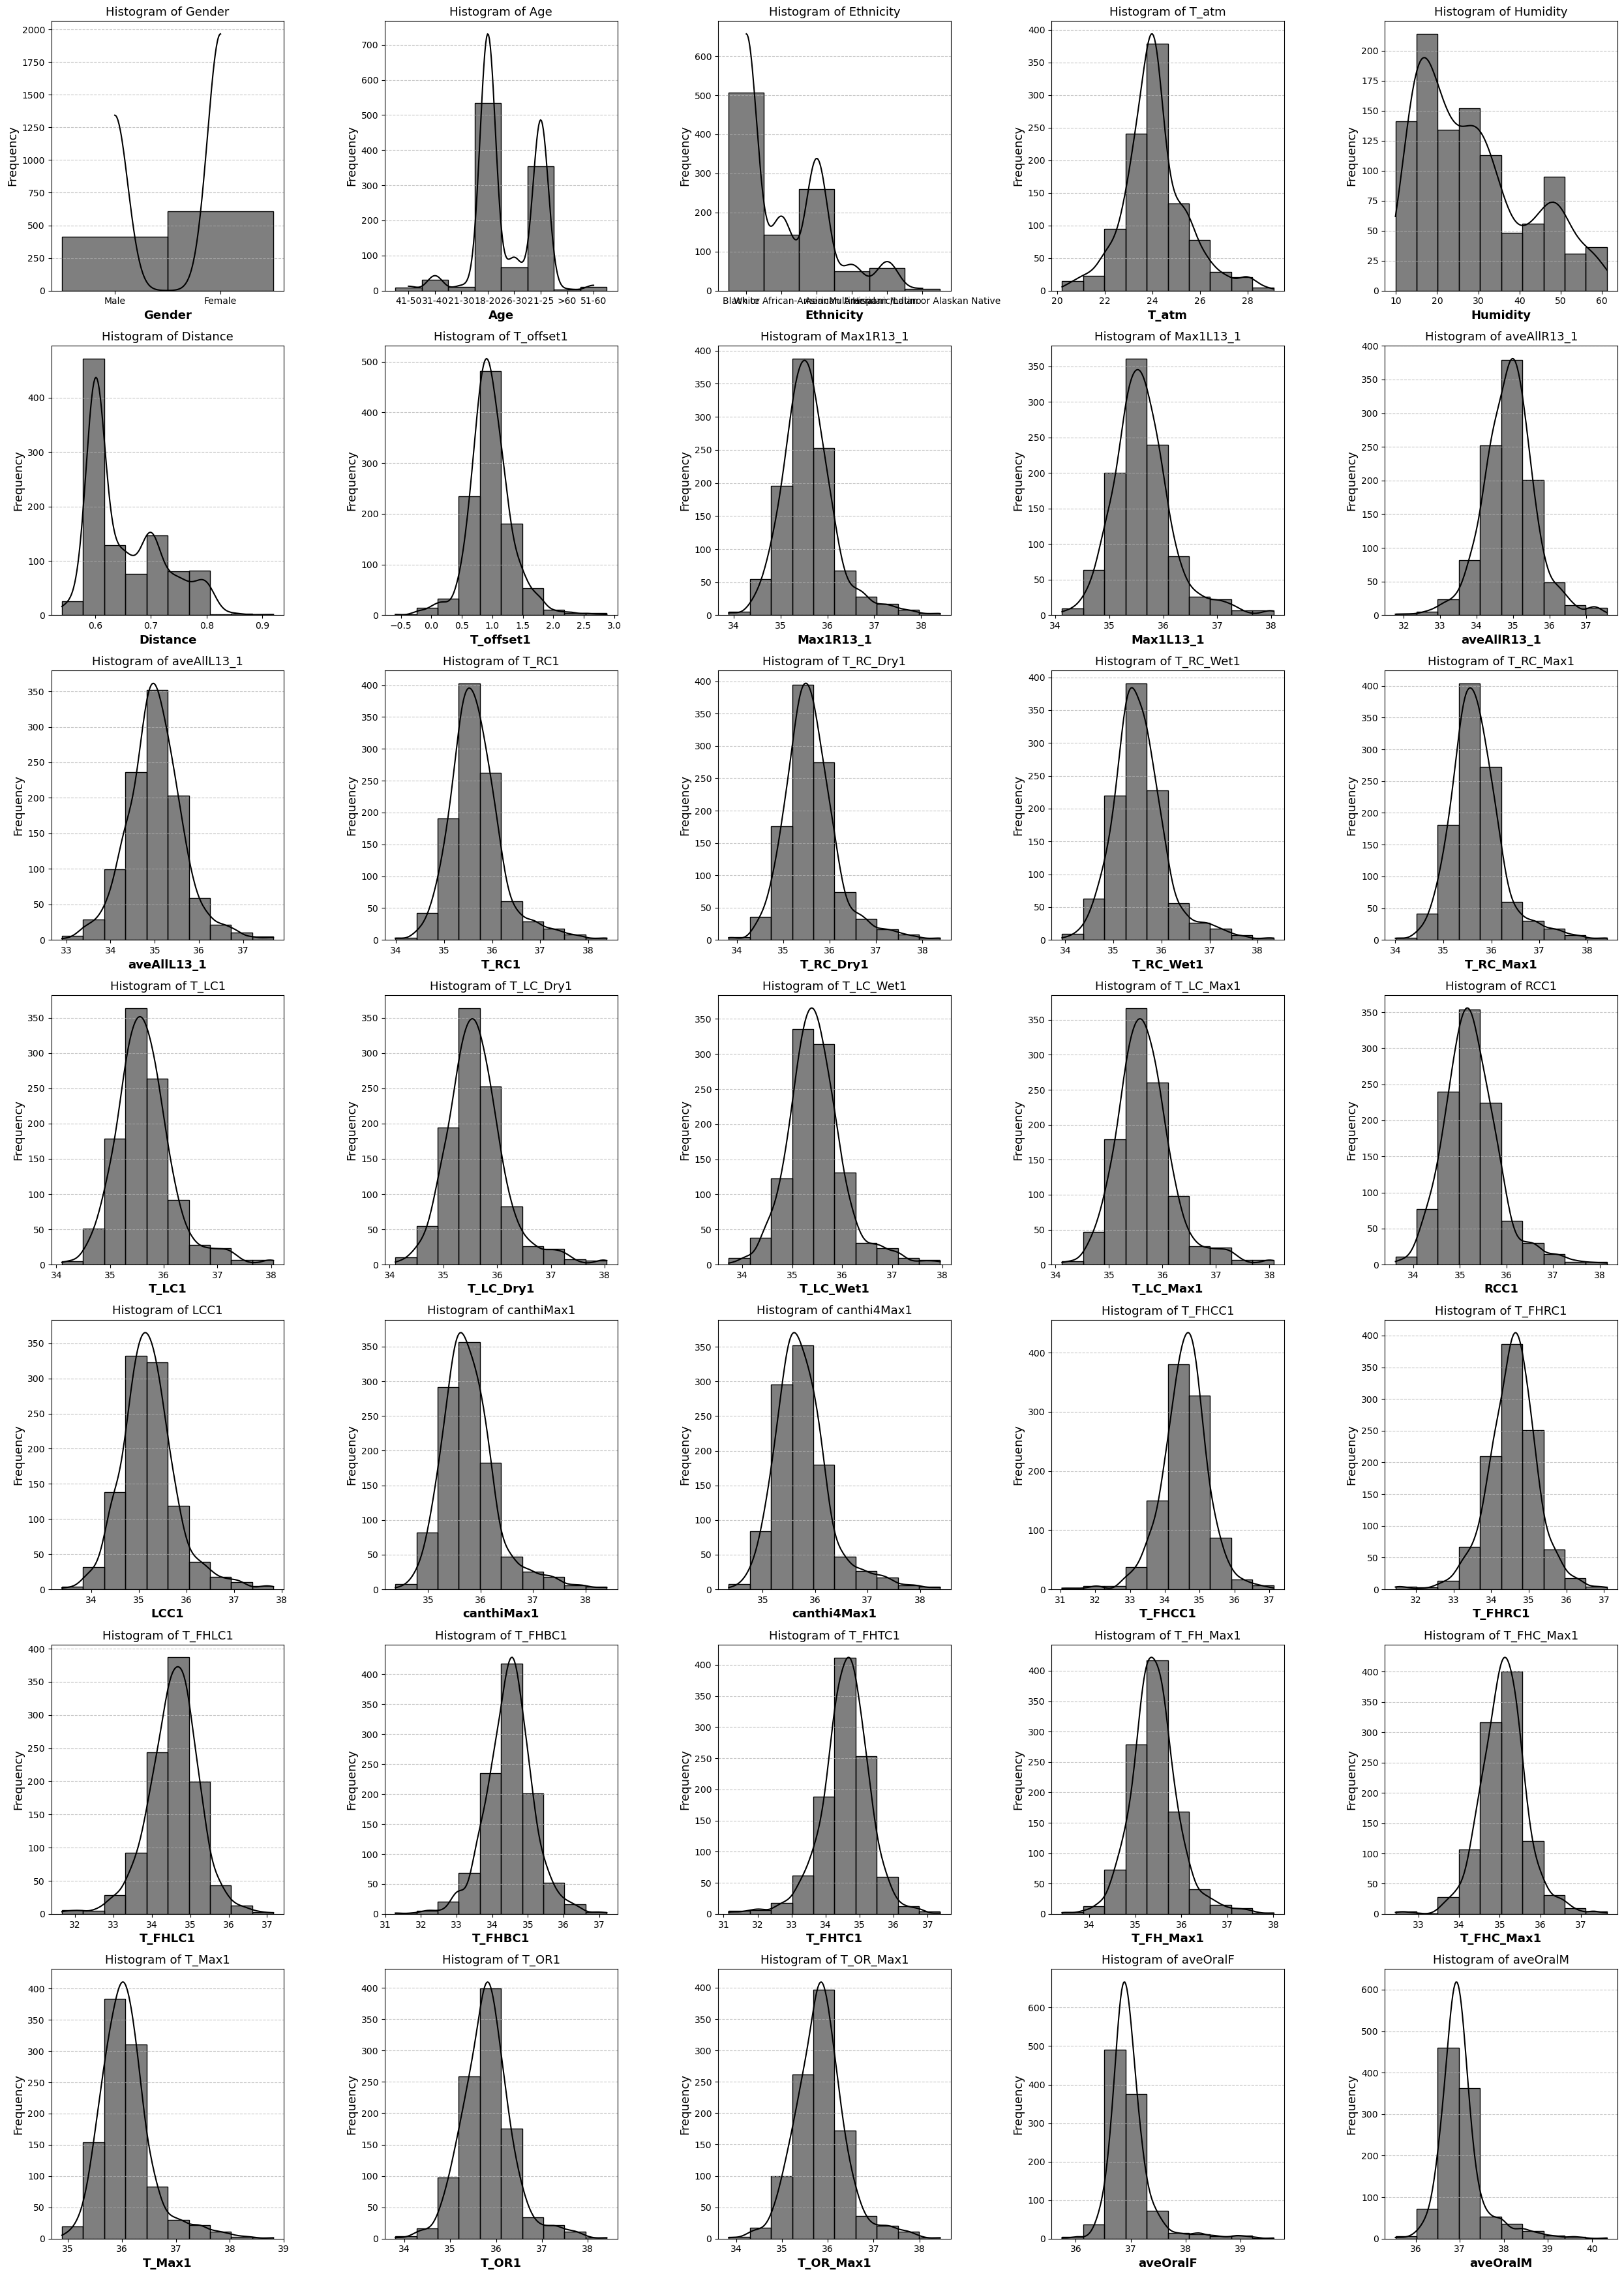

In [65]:
columns = data.columns
num_bins = 10

num_cols = 5
num_rows = (len(columns) - 1) // num_cols + 1

subplot_size = 5

fig, axs = plt.subplots(num_rows, num_cols, figsize=(subplot_size * num_cols, subplot_size * num_rows))
axs = axs.ravel()

for i, col in enumerate(columns):
    sns.histplot(data[col], bins=num_bins, kde=True, ax=axs[i], color='black', edgecolor='black')
    axs[i].set_title(f'Histogram of {col}', fontsize=13)
    axs[i].set_xlabel(col, fontsize=13, weight='bold')
    axs[i].set_ylabel('Frequency', fontsize=13)
    axs[i].grid(axis='y', linestyle='--', alpha=0.7)


for i in range(len(columns), num_rows * num_cols):
    axs[i].axis('off')

plt.tight_layout()
plt.show()


The variables include categorical data like 'Gender' and 'Ethnicity', as well as continuous data such as 'Age', 'Distance',  'atm', 'Humidity', 'effect1', 'Max1.1.3'. The continuous data histograms are overlaid with a normal distribution curve, indicating an analysis of how closely the data follows a normal distribution.

In [66]:
data['Ethnicity'].value_counts()

Ethnicity
White                                506
Asian                                260
Black or African-American            143
Hispanic/Latino                       57
Multiracial                           50
American Indian or Alaskan Native      4
Name: count, dtype: int64

In [67]:
data['Gender'].value_counts()

Gender
Female    606
Male      414
Name: count, dtype: int64

In [68]:
data['Age'].value_counts()

Age
18-20    534
21-25    355
26-30     67
31-40     31
51-60     11
21-30     10
41-50      9
>60        3
Name: count, dtype: int64

There is an overlap here. 21-30 interval has already identified by the 2 seperately labels in the dataset which are 21-25 and 26-30. Interval of 21-25 is critically important for our project and its count is 355. For this reason I will embed 21-30 label into the 26-30.

### 2.4.2 Mapping Operations

In [69]:
data['Age'] = data['Age'].replace('21-30', '26-30')

updated_age_mapping = {
    '18-20': 1,
    '21-25': 2,
    '26-30': 3,  # Now includes '21-30'
    '31-40': 4,
    '41-50': 5,
    '51-60': 6,
    '>60': 7
}

data['Age'] = data['Age'].map(updated_age_mapping)


In [70]:
data['Age'].value_counts()

Age
1    534
2    355
3     77
4     31
6     11
5      9
7      3
Name: count, dtype: int64

In [71]:
data['Gender'] = data['Gender'].map({
    'Female':1,
    'Male':2
})

In [72]:
data['Ethnicity'] = data['Ethnicity'].map({
    'White':1,
    'Asian':2,
    'Black or African-American':3,
    'Hispanic/Latino':4,
    'Multiracial':5,
    'American Indian or Alaskan Native':6
})

### 2.4.3 Features Correlation with Dependant Variables

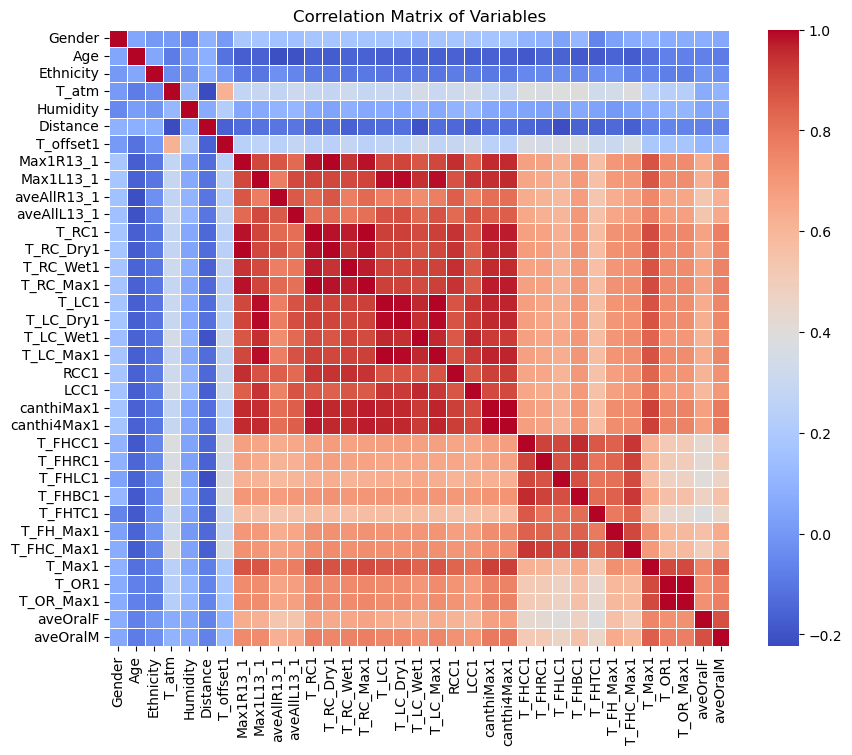

In [73]:
corr_matrix = data.corr()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Variables')
plt.show()

According to what can be seen in the heatmap, when looking at the correlation of the two target values fast and monitor with other values, it is seen that the 'aveOralM' target value has a stronger relationship than the 'aveOralF' target value. On the other hand, we can also see that the correlation strength of these two target values with other variables is at the same rate. To explain this with a few examples, we see that the correlation between the variables 'T_OR_MAX1', 'T_OR1', and 'T_Max1' and our target values is stronger than the other variables. However, we can also see that the correlation of the same variables with 'avaOralM' is stronger than their correlation with 'aveOralF'. In general, the relationship of all variables with oral temperature in monitor mode is stronger than the relationship with fast mode. When our dataset is read based on the heat map, it is observed that the monitor mode is more accurate than the fast mode.

### 2.4.4 More Deeper Observations

/var/folders/wl/n7pq_5rj1bz43l8jft3ps3q40000gp/T/ipykernel_1140/2550915755.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


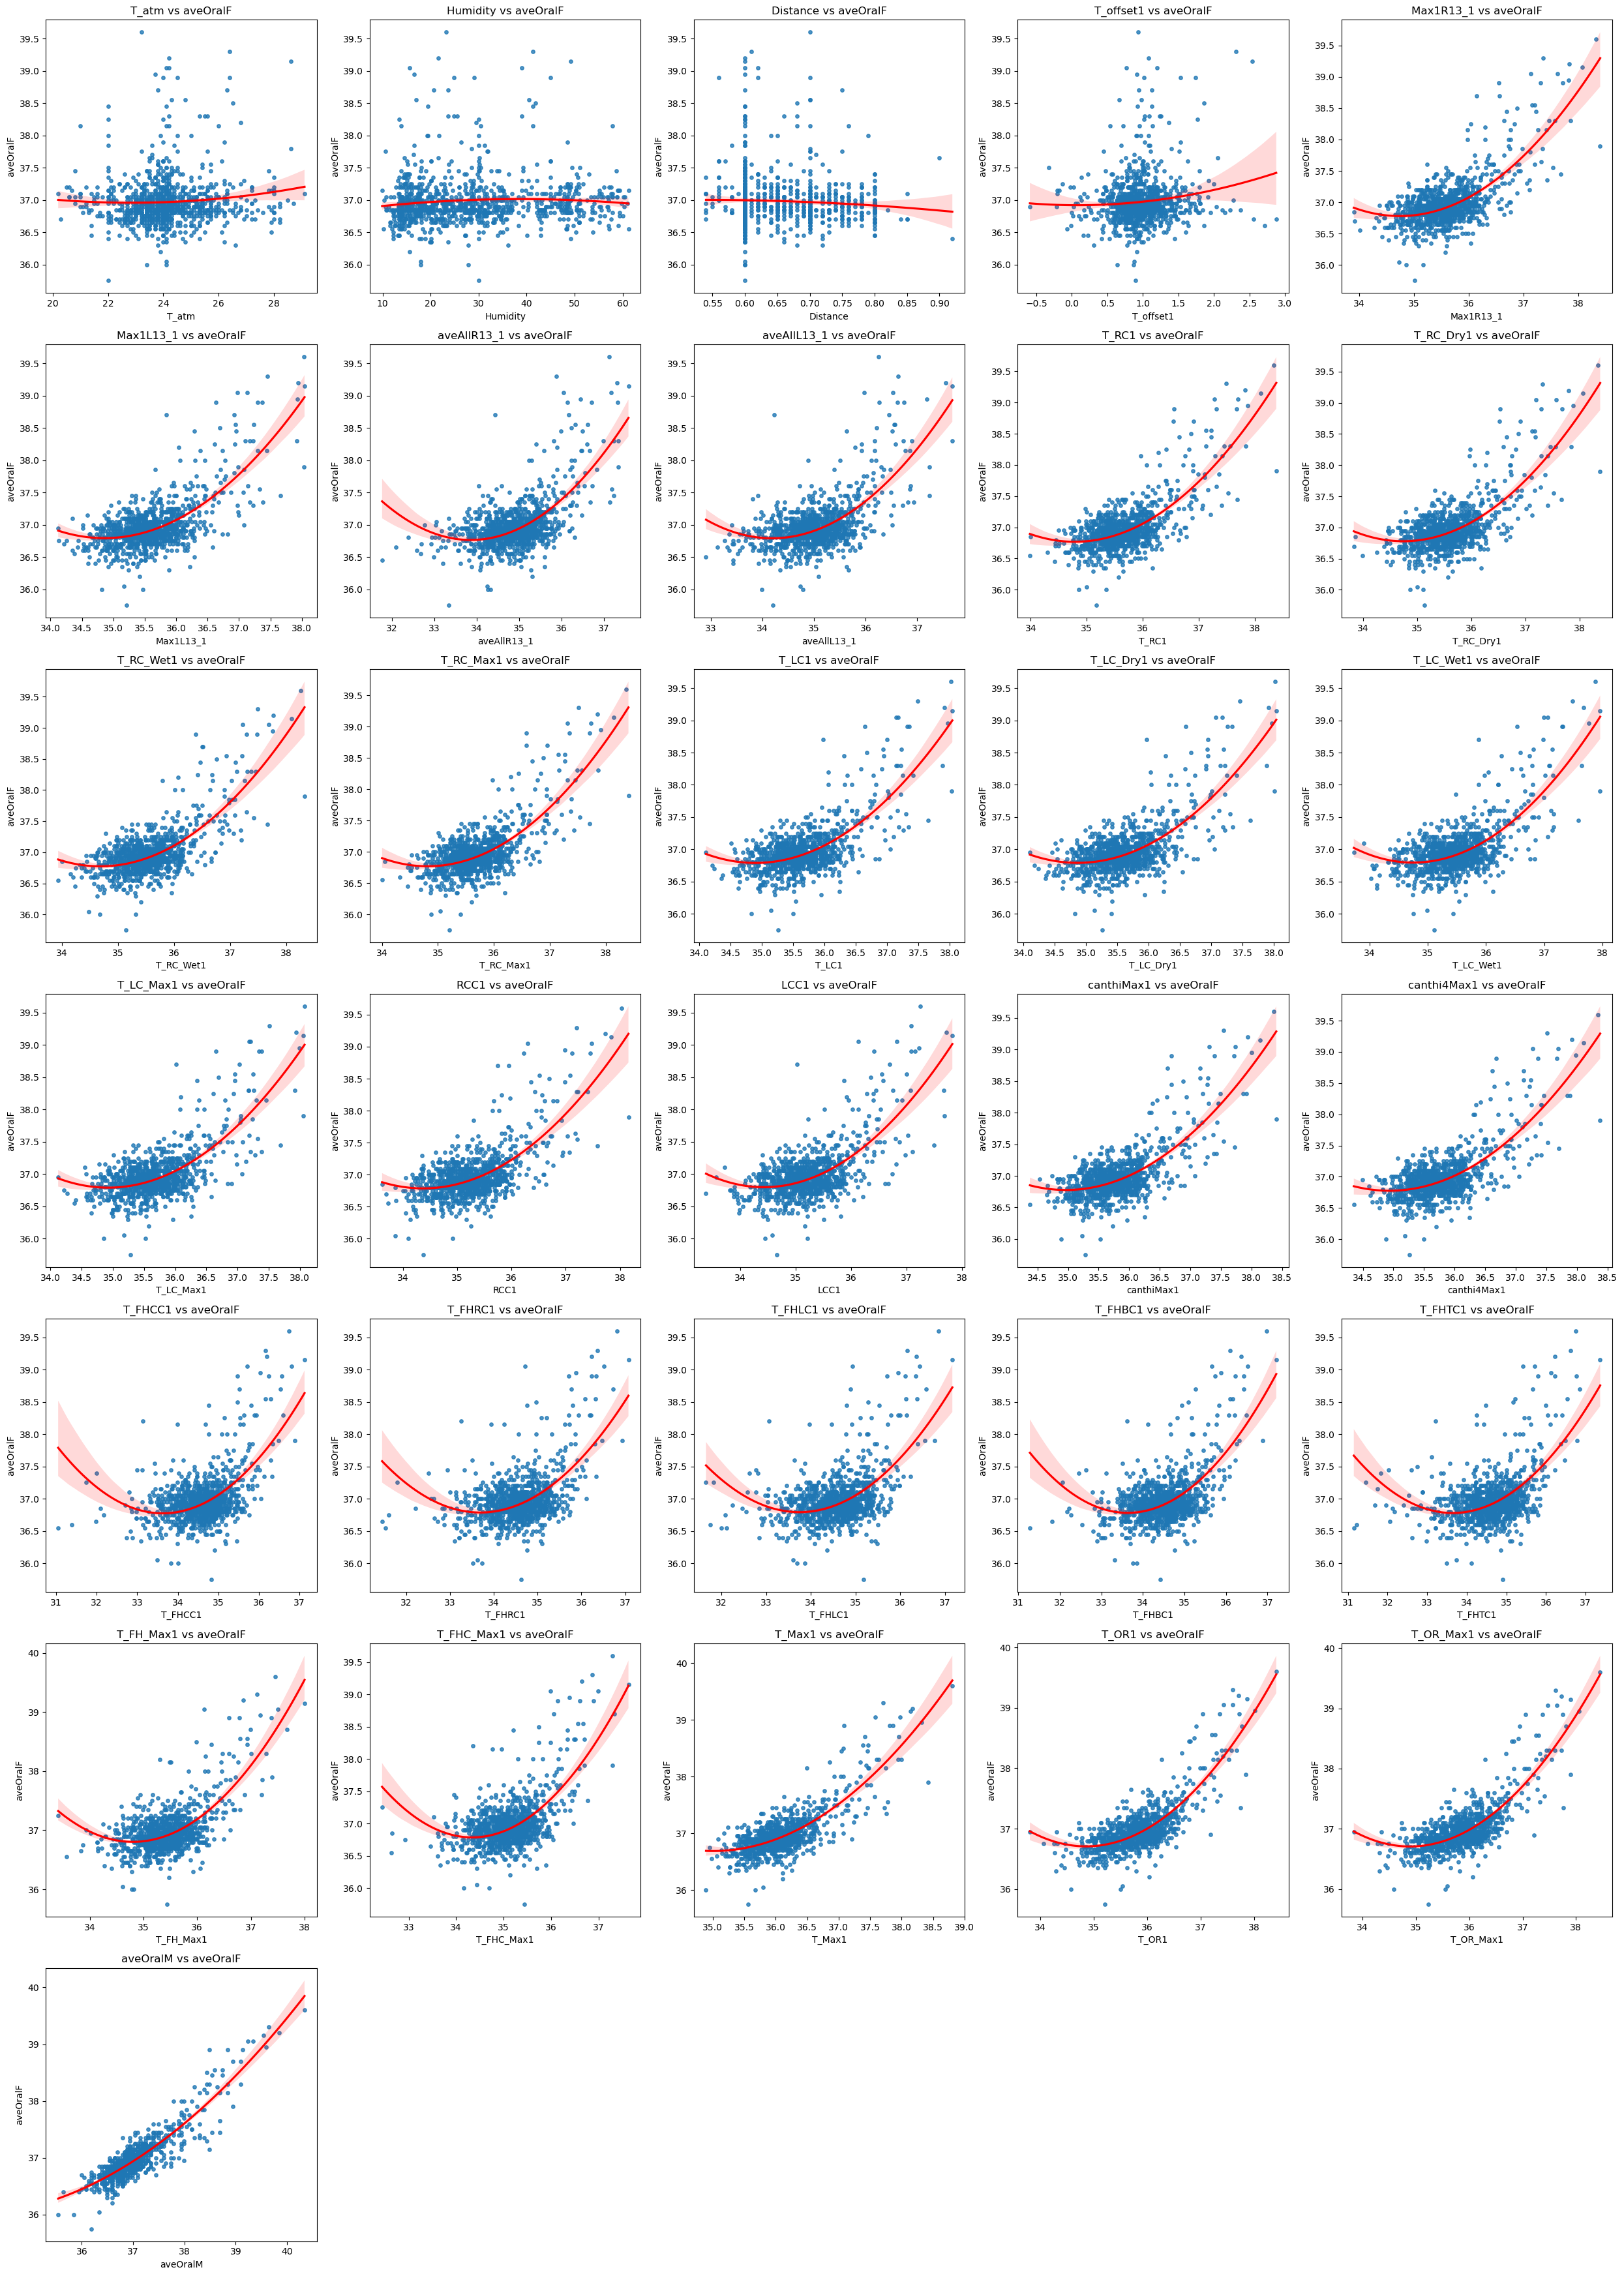

In [74]:
features = [col for col in data.columns if col not in ['aveOralF', 'Age', 'Gender', 'Ethnicity']]

# Determining the number of rows/columns for the subplot grid
n = len(features)
cols = 5  
rows = n // cols + (n % cols > 0)  

plt.figure(figsize=(5*cols, 5*rows))

# Plotting each feature against 'aveOralF'
for i, feature in enumerate(features):
    plt.subplot(rows, cols, i+1)
    sns.regplot(x=data[feature], y=data['aveOralF'], order=2, line_kws={"color": "red"}, scatter_kws={"s": 15})
    plt.title(f'{feature} vs aveOralF')
    plt.xlabel(feature)
    plt.tight_layout()
plt.savefig('fscatter.png', dpi=300)
plt.show()


/var/folders/wl/n7pq_5rj1bz43l8jft3ps3q40000gp/T/ipykernel_1140/3948846608.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


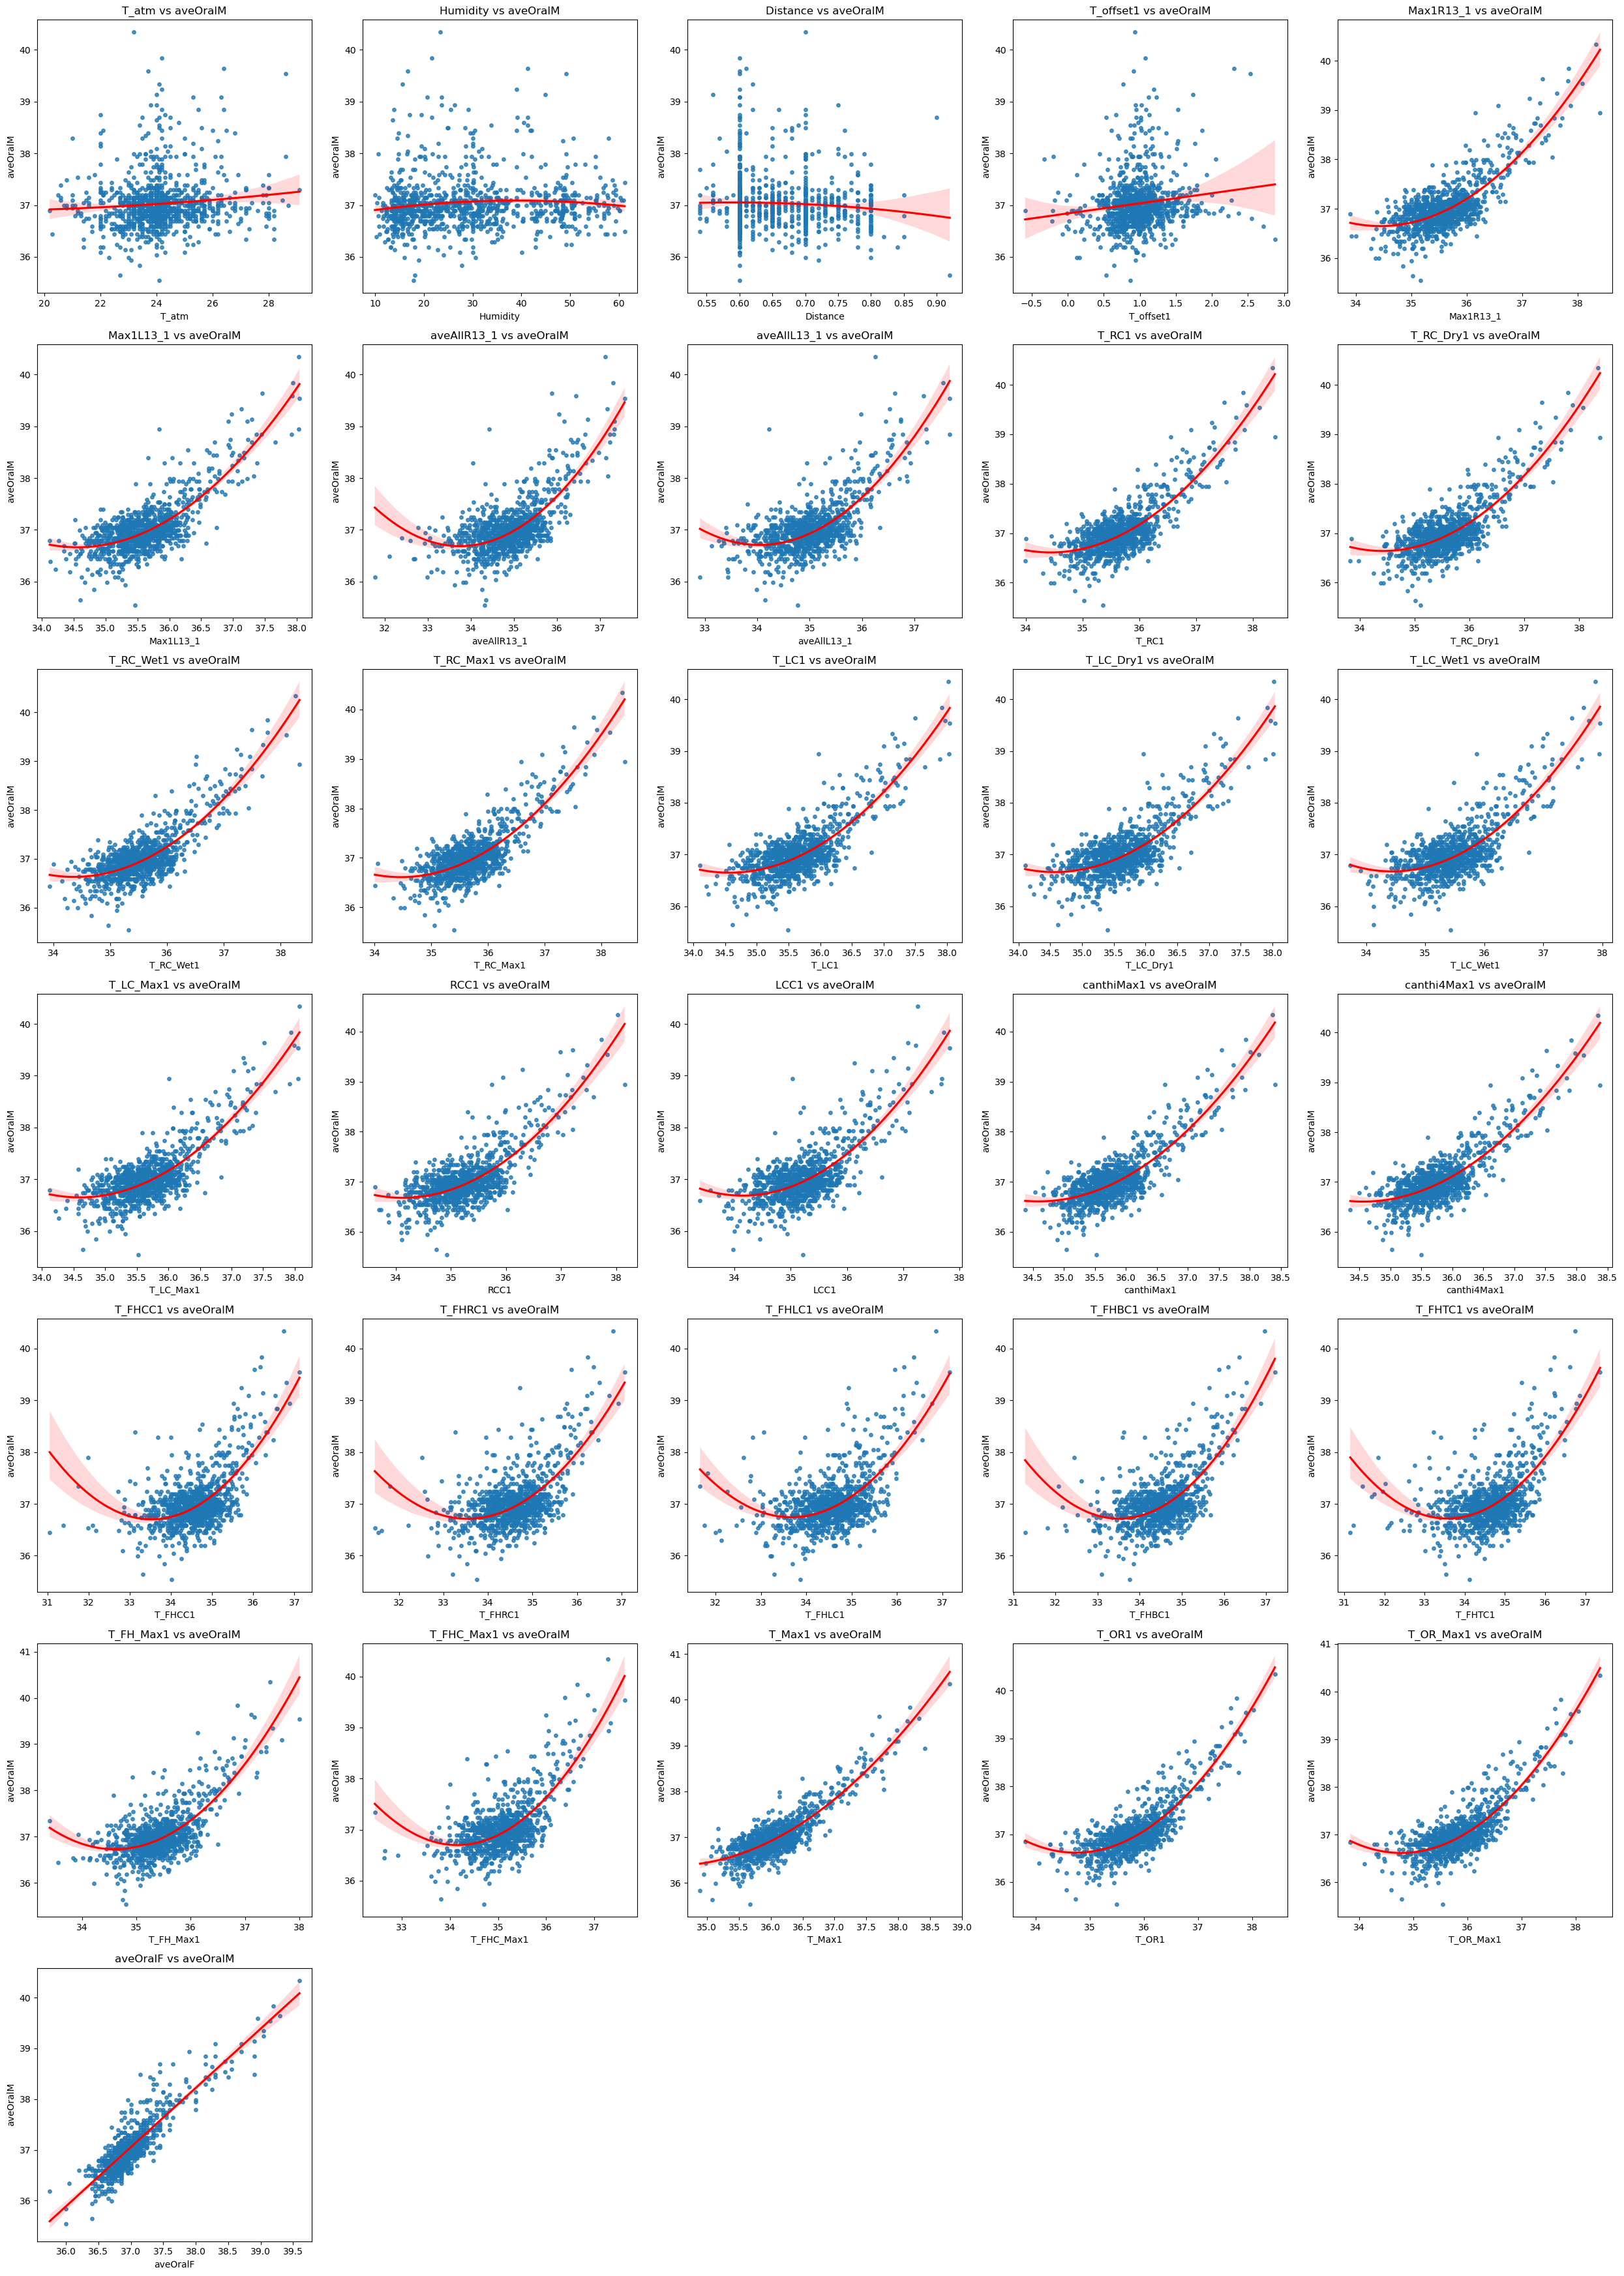

In [75]:
# Filtering the features to exclude specific column.
features = [col for col in data.columns if col not in ['aveOralM', 'Age', 'Gender', 'Ethnicity']]

# Determining the number of rows/columns for the subplot grid
n = len(features)
cols = 5  
rows = n // cols + (n % cols > 0)  


plt.figure(figsize=(5*cols, 5*rows))

# Plotting each feature against 'aveOralM'
for i, feature in enumerate(features):
    plt.subplot(rows, cols, i+1)
    sns.regplot(x=data[feature], y=data['aveOralM'], order=2, line_kws={"color": "red"}, scatter_kws={"s": 15})
    plt.title(f'{feature} vs aveOralM')
    plt.xlabel(feature)
    plt.tight_layout()
plt.savefig('mscatter.png', dpi=300)
plt.show()

When we look at the scatterplots of the features in the dataset for two different variables, it is seen that the variables are distributed almost the same for two different targets. An obvious polynomiality is seen in most of the variables. It appears that there are some outliers in the variables 'T_atm', 'Humidity', 'Distance' and 'T_offset1'.

## 2.5 Feature Engineering

In [76]:
correlation_matrix = data.corr()
correlations_aveOralF = correlation_matrix['aveOralF'].sort_values(ascending=False)

print("Correlations with aveOralF:")
print(correlations_aveOralF)

Correlations with aveOralF:
aveOralF       1.000000
aveOralM       0.884728
T_Max1         0.752546
T_OR1          0.718840
T_OR_Max1      0.718513
canthiMax1     0.673136
canthi4Max1    0.672514
T_RC_Max1      0.664864
T_RC1          0.664154
T_RC_Wet1      0.654099
T_RC_Dry1      0.643588
Max1R13_1      0.637134
T_LC_Max1      0.633186
T_LC1          0.633009
T_LC_Dry1      0.627341
Max1L13_1      0.621410
RCC1           0.611695
T_LC_Wet1      0.611027
LCC1           0.586546
T_FH_Max1      0.560117
aveAllL13_1    0.540581
aveAllR13_1    0.534192
T_FHC_Max1     0.502194
T_FHBC1        0.472456
T_FHCC1        0.433403
T_FHRC1        0.425942
T_FHLC1        0.399649
T_FHTC1        0.382936
T_offset1      0.117794
Gender         0.077565
T_atm          0.070825
Humidity       0.047200
Ethnicity     -0.005502
Distance      -0.065207
Age           -0.070738
Name: aveOralF, dtype: float64


In [77]:
correlation_matrix = data.corr()
correlations_aveOralM = correlation_matrix['aveOralM'].sort_values(ascending=False)

print("Correlations with aveOralM:")
print(correlations_aveOralM)

Correlations with aveOralM:
aveOralM       1.000000
aveOralF       0.884728
T_Max1         0.849657
canthiMax1     0.784096
canthi4Max1    0.783763
T_RC_Max1      0.769463
T_RC1          0.768730
T_OR1          0.767345
T_OR_Max1      0.766911
T_RC_Wet1      0.760134
T_LC_Max1      0.750527
T_LC1          0.750390
T_RC_Dry1      0.748566
T_LC_Dry1      0.743656
Max1R13_1      0.741902
Max1L13_1      0.735644
T_LC_Wet1      0.720383
RCC1           0.714193
LCC1           0.696752
aveAllL13_1    0.645084
T_FH_Max1      0.641727
aveAllR13_1    0.620874
T_FHC_Max1     0.595470
T_FHBC1        0.552362
T_FHRC1        0.514298
T_FHCC1        0.513335
T_FHLC1        0.463579
T_FHTC1        0.454889
T_offset1      0.139041
T_atm          0.098663
Humidity       0.063595
Gender         0.058844
Ethnicity     -0.027787
Distance      -0.067567
Age           -0.085213
Name: aveOralM, dtype: float64


When the correlation coefficients of two separate target variables and other independent values are examined, it is understood that the weakest correlation is in categorical values. Apart from these, there are a few more values with very weak correlations. However, due to the purpose of our project, we can say that removing features from our dataset just by looking at the correlation is not a very correct approach.

### 2.5.1 Generating Binary Target Features

In [78]:
# For the classification tasks, two categorized targets are created.
data['Fever_aveOralF'] = (data['aveOralF'] > 37.5).astype(int)
data['Fever_aveOralM'] = (data['aveOralM'] > 37.5).astype(int)

In [79]:
data

Gender  Age  Ethnicity  T_atm  Humidity  Distance  T_offset1  Max1R13_1  \
0          2    5          1   24.0      28.0       0.8     0.7025    35.0300   
1          1    4          3   24.0      26.0       0.8     0.7800    34.5500   
2          1    3          1   24.0      26.0       0.8     0.8625    35.6525   
3          1    3          3   24.0      27.0       0.8     0.9300    35.2225   
4          2    1          1   24.0      27.0       0.8     0.8950    35.5450   
...      ...  ...        ...    ...       ...       ...        ...        ...   
1015       1    2          2   25.7      50.8       0.6     1.2225    35.6425   
1016       1    2          1   25.7      50.8       0.6     1.4675    35.9825   
1017       1    1          3   28.0      24.3       0.6     0.1300    36.4075   
1018       2    3          4   25.0      39.8       0.6     1.2450    35.8150   
1019       1    1          1   23.8      45.6       0.6     0.8675    35.7075   

      Max1L13_1  aveAllR13_1  ...  T_FHTC1  T_FH_Max1  T_FHC_Max1   T_Max1  \
0       35.3775      34.4000  ...  33.0025    34.5300     34.0075  35.6925   
1       34.5200      33.9300  ...  34.0025    34.6825     34.6600  35.1750   
2       35.5175      34.2775  ...  34.6700    35.3450     35.2225  35.9125   
3       35.6125      34.3850  ...  34.9175    35.6025     35.3150  35.7200   
4       35.6650      34.9100  ...  33.8275    35.4175     35.3725  35.8950   
...         ...          ...  ...      ...        ...         ...      ...   
1015    35.6525      34.8575  ...  35.2750    35.8525     35.7475  36.0675   
1016    35.7575      35.4275  ...  35.0700    35.7650     35.5525  36.5000   
1017    36.3400      35.8700  ...  35.3425    36.3750     35.7100  36.5350   
1018    35.5250      34.2950  ...  34.5950    35.4150     35.3100  35.8600   
1019    35.5825      34.8875  ...  34.7100    35.1525     35.1175  35.9725   

        T_OR1  T_OR_Max1  aveOralF  aveOralM  Fever_aveOralF  Fever_aveOralM  
0     35.6350    35.6525     36.85     36.59               0               0  
1     35.0925    35.1075     37.00     37.19               0               0  
2     35.8600    35.8850     37.20     37.34               0               0  
3     34.9650    34.9825     36.85     37.09               0               0  
4     35.5875    35.6175     36.80     37.04               0               0  
...       ...        ...       ...       ...             ...             ...  
1015  35.6775    35.7100     36.95     36.99               0               0  
1016  36.4525    36.4900     37.25     37.19               0               0  
1017  35.9650    35.9975     37.35     37.59               0               1  
1018  35.4150    35.4350     37.15     37.29               0               0  
1019  35.8900    35.9175     37.05     37.19               0               0  

[1020 rows x 37 columns]

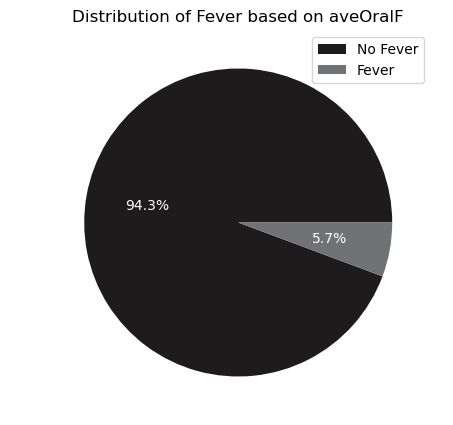

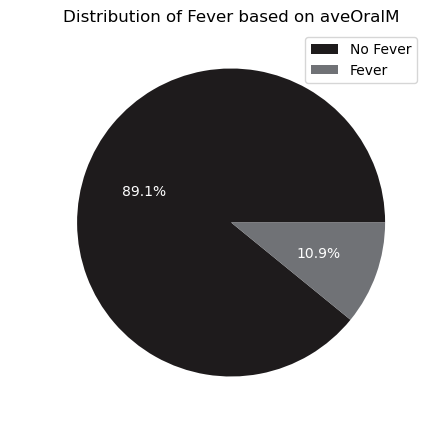

In [80]:
colors = ['#1E1B1C', '#707276']
label_mapping = {0: 'No Fever', 1: 'Fever'}

fever_counts_aveOralF= data['Fever_aveOralF'].value_counts()
fever_counts_aveOralM= data['Fever_aveOralM'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(fever_counts_aveOralF, labels=[label_mapping[label] for label in fever_counts_aveOralF.index], colors=colors, autopct='%1.1f%%', explode=(0.0, 0.0),
        textprops={'color': 'white'})
plt.title('Distribution of Fever based on aveOralF')
plt.legend(loc="best", labels=label_mapping.values(), fontsize="medium")
plt.show()

plt.figure(figsize=(5, 5))
plt.pie(fever_counts_aveOralM, labels=[label_mapping[label] for label in fever_counts_aveOralM.index], colors=colors, autopct='%1.1f%%', explode=(0.0, 0.0),
       textprops={'color': 'white'})
plt.title('Distribution of Fever based on aveOralM')
plt.legend(loc="best", labels=label_mapping.values(), fontsize="medium")
plt.show()

Based on these pie charts above, we can see the imbalanced ratio between people have fever and don't have fever.

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          1020 non-null   int64  
 1   Age             1020 non-null   int64  
 2   Ethnicity       1020 non-null   int64  
 3   T_atm           1020 non-null   float64
 4   Humidity        1020 non-null   float64
 5   Distance        1020 non-null   float64
 6   T_offset1       1020 non-null   float64
 7   Max1R13_1       1020 non-null   float64
 8   Max1L13_1       1020 non-null   float64
 9   aveAllR13_1     1020 non-null   float64
 10  aveAllL13_1     1020 non-null   float64
 11  T_RC1           1020 non-null   float64
 12  T_RC_Dry1       1020 non-null   float64
 13  T_RC_Wet1       1020 non-null   float64
 14  T_RC_Max1       1020 non-null   float64
 15  T_LC1           1020 non-null   float64
 16  T_LC_Dry1       1020 non-null   float64
 17  T_LC_Wet1       1020 non-null   f

### 2.5.2 Continuous Target Variables' Distribution

<Axes: >

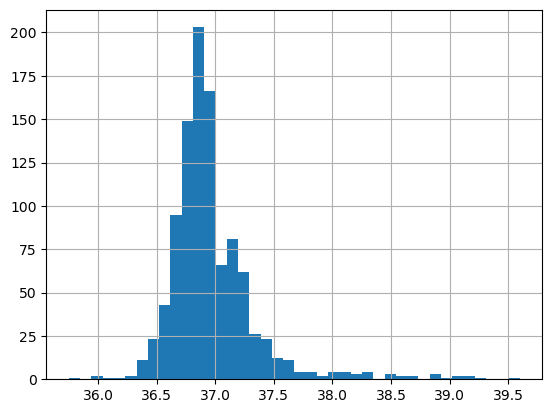

In [82]:
data['aveOralF'].hist(bins = 40)

<Axes: >

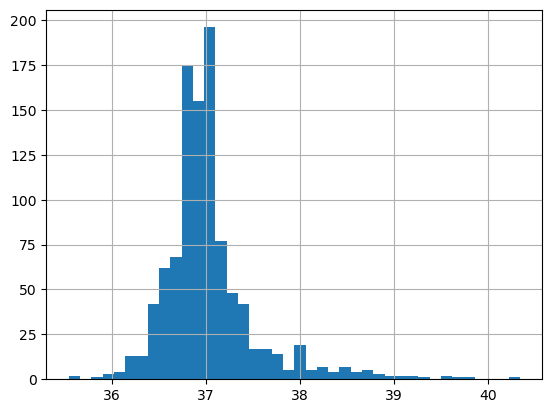

In [83]:
data['aveOralM'].hist(bins=40)

When the histogram graphics of our two target values are examined, we see that the distribution of the data is mostly between 36.5-37.0. The range of minimum and maximum data is approximately between 35.5-40.0. For this reason, we can predict that our error range will be approximately between 0 and 1 in future analyses.

### 2.5.3 Checking Statistical Significance 

In [84]:
# Separating the independent variables and the target variable from the 'data' DataFrame.
X = data.drop(['aveOralF', 'aveOralM'], axis=1)  # Excluding the target variable 'aveOralF'.
y = data['aveOralF']  # 'aveOralF' is the target variable.

# Adding a constant column to the independent variables (for the intercept term).
X = sm.add_constant(X)

# Setting up and fitting the OLS model.
model = sm.OLS(y, X).fit()

model_summary = model.summary()
print(model_summary)


                            OLS Regression Results                            
Dep. Variable:               aveOralF   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     76.65
Date:                Mon, 25 Mar 2024   Prob (F-statistic):          2.00e-253
Time:                        10:28:55   Log-Likelihood:                 193.95
No. Observations:                1020   AIC:                            -315.9
Df Residuals:                     984   BIC:                            -138.5
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             24.3907      0.754     32.


The output represents the results of an OLS (Ordinary Least Squares) regression analysis. The dependent variable aveOralF is explained with an R-squared value of 0.732, which means approximately 73.2% of the variability in aveOralF is accounted for by the model. The model's F-statistic is significant, indicating that the explanatory variables collectively have a statistically significant effect on the dependent variable.

However, many individual predictors have high p-values, suggesting that they are not significantly contributing to the model individually. The variable Fever_aveOralF is one of the most significant predictors, with a coefficient of 0.6964, indicating a strong positive relationship with aveOralF. The model also might suffer from multicollinearity, as suggested by the large condition number, which can affect the reliability of the regression coefficients.

In light of this information, if we are going to do feature extraction, we need to eliminate most features in the dataset. However, this application is not suitable for our project. For this reason, it is convenient to build ML models with all variables without any data extraction. Since our number of variables is not very large, this method will not create any negative effects on our models.

### 2.5.5 Dataset Copying For Each Task 

In [85]:
data_F_reg = data.copy()
data_M_reg= data.copy()
data_F_clf= data.copy()
data_M_clf= data.copy()

When the model was to be evaluated, we copied the data set and created a dataset with different names for each task in order to avoid name assignment problems.

# 3 Machine Learning Algorithms

## 3.1 Regression Task-1 ('aveOralF')

### Preparation for ML Algorithms

#### • Backward Selection

In [86]:

X = data_F_reg.drop(['aveOralF', 'aveOralM'], axis=1) 
y = data_F_reg['aveOralF']

X = sm.add_constant(X)

# Fitting the full model with all features
model = sm.OLS(y, X).fit()

# Backward elimination process
p_value_threshold = 0.05
variables = X.columns.tolist()
while len(variables) > 0:
    # Fitting the model and getting the p-values
    model = sm.OLS(y, X[variables]).fit()
    p_values = model.pvalues
    
    # Getting the max p-value and its corresponding variable
    max_p_value_var = p_values.idxmax()
    max_p_value = p_values.max()
    
   
    if max_p_value > p_value_threshold:
        # Removing the variable with the highest p-value
        variables.remove(max_p_value_var)
    else:
    
        break

final_features = variables
print('Selected features:', final_features)


Selected features: ['const', 'T_atm', 'Max1R13_1', 'T_RC_Max1', 'canthi4Max1', 'T_FH_Max1', 'T_Max1', 'T_OR_Max1', 'Fever_aveOralF', 'Fever_aveOralM']


We used the backward selection application to see the independent values that had the strongest relationship with our target value. We will not do any feature extraction.

#### • Standartisation

In [87]:


# List of columns to exclude from standardization
columns_to_exclude = ['aveOralF', 'aveOralM','Fever_aveOralM', 'Fever_aveOralF','Age', 'Gender', 'Ethnicity']

# Selecting the columns that need to be standardized
columns_to_scale = [col for col in data_F_reg.columns if col not in columns_to_exclude]

# Instantiating the StandardScaler
scaler = StandardScaler()
data_F_reg[columns_to_scale] = scaler.fit_transform(data_F_reg[columns_to_scale])

data_F_reg.head() 


Gender  Age  Ethnicity     T_atm  Humidity  Distance  T_offset1  Max1R13_1  \
0       2    5          1 -0.086392 -0.055341  2.178928  -0.734385  -0.985950   
1       1    4          3 -0.086392 -0.208419  2.178928  -0.520538  -1.821305   
2       1    3          1 -0.086392 -0.208419  2.178928  -0.292895   0.097401   
3       1    3          3 -0.086392 -0.131880  2.178928  -0.106642  -0.650938   
4       2    1          1 -0.086392 -0.131880  2.178928  -0.203217  -0.089684   

   Max1L13_1  aveAllR13_1  ...   T_FHTC1  T_FH_Max1  T_FHC_Max1    T_Max1  \
0  -0.425802    -0.680080  ... -2.162224  -1.703974   -1.887314 -0.798009   
1  -1.986339    -1.334438  ... -0.789203  -1.412510   -0.754033 -1.850738   
2  -0.171020    -0.850631  ...  0.127288  -0.146314    0.222933 -0.350472   
3   0.001867    -0.700964  ...  0.467111   0.345830    0.383589 -0.742067   
4   0.097411     0.029969  ... -1.029482  -0.007750    0.483457 -0.386072   

      T_OR1  T_OR_Max1  aveOralF  aveOralM  Fever_aveOralF  Fever_aveOralM  
0 -0.305051  -0.332313     36.85     36.59               0               0  
1 -1.275562  -1.307195     37.00     37.19               0               0  
2  0.097465   0.083577     37.20     37.34               0               0  
3 -1.503654  -1.530792     36.85     37.09               0               0  
4 -0.390027  -0.394920     36.80     37.04               0               0  

[5 rows x 37 columns]

#### • Checking Standartized Features

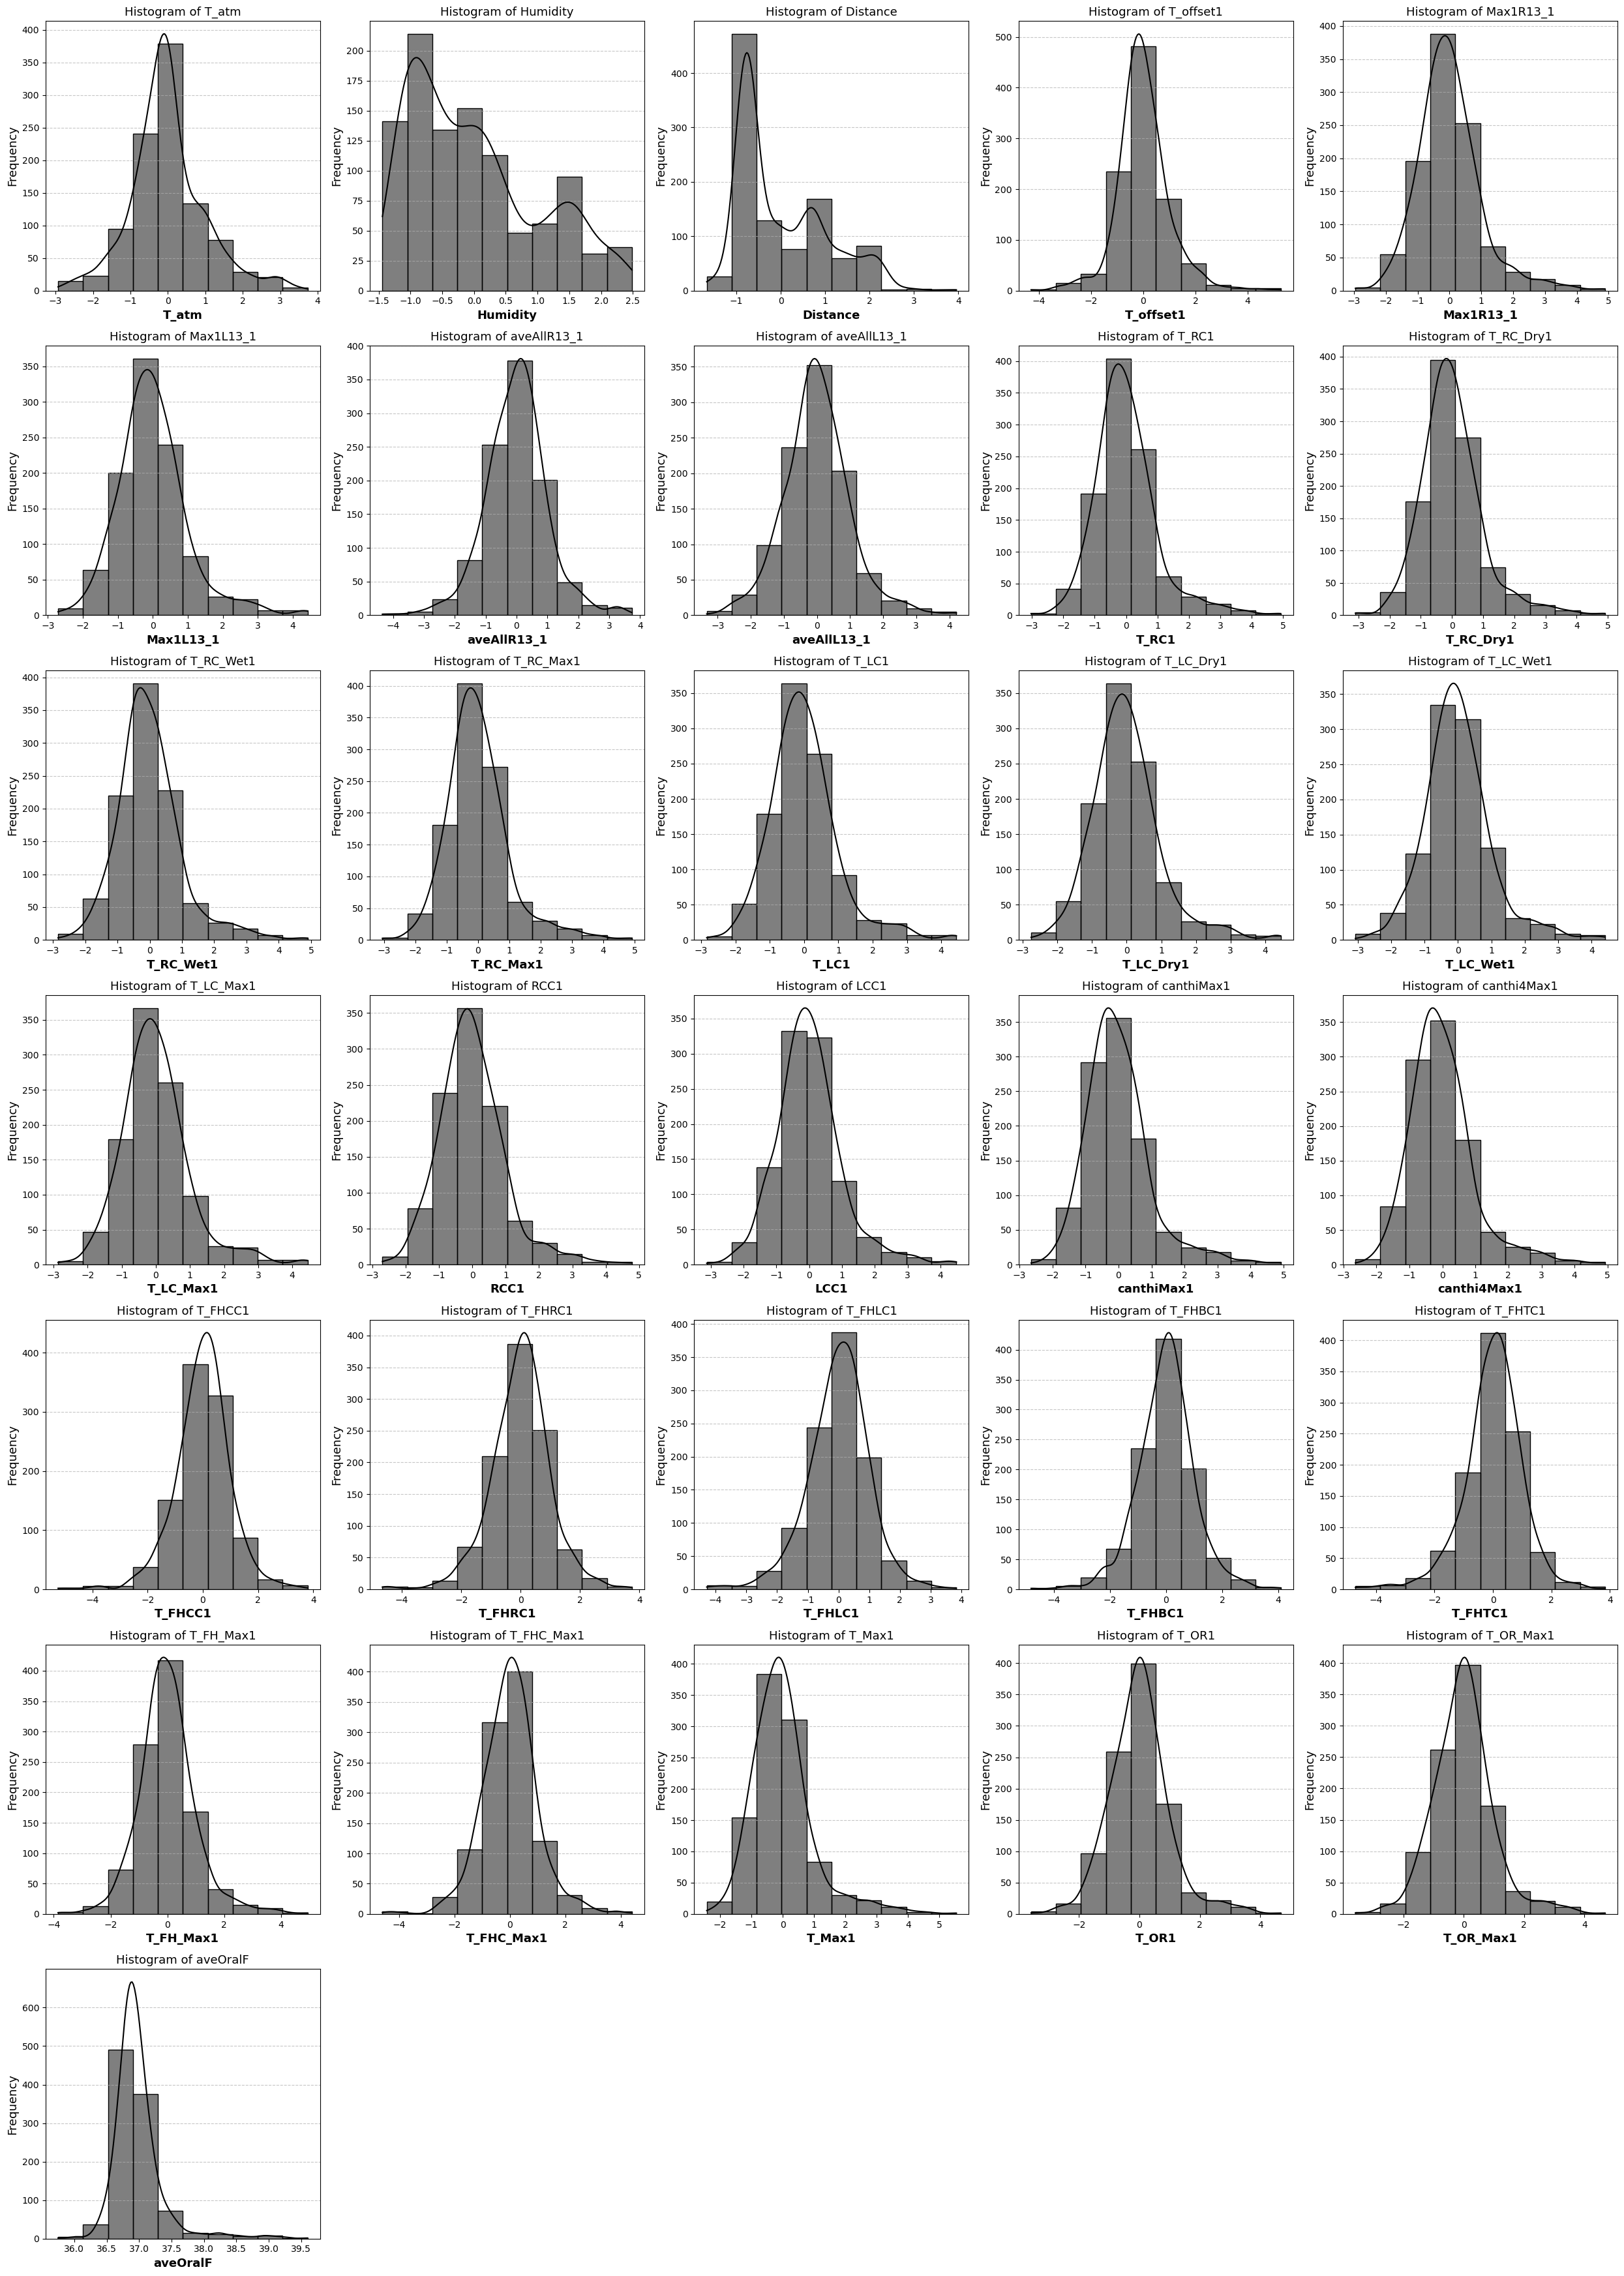

In [88]:


# Columns to exclude from the histogram plot
excluded_columns = ['aveORalF', 'aveOralM','Fever_aveOralM', 'Fever_aveOralF', 'Age', 'Gender', 'Ethnicity']

columns = [col for col in data_F_reg.columns if col not in excluded_columns]
num_bins = 10

num_cols = 5
num_rows = len(columns) // num_cols + (len(columns) % num_cols > 0)

subplot_size = 5

fig, axs = plt.subplots(num_rows, num_cols, figsize=(subplot_size * num_cols, subplot_size * num_rows))
axs = axs.ravel()

# Plotting histograms for each column
for i, col in enumerate(columns):
    sns.histplot(data_F_reg[col], bins=num_bins, kde=True, ax=axs[i], color='black', edgecolor='black')
    axs[i].set_title(f'Histogram of {col}', fontsize=13)
    axs[i].set_xlabel(col, fontsize=13, weight='bold')
    axs[i].set_ylabel('Frequency', fontsize=13)
    axs[i].grid(axis='y', linestyle='--', alpha=0.7)

# Turning off the axes for any subplots that aren't used
for i in range(len(columns), num_rows * num_cols):
    axs[i].axis('off')

plt.tight_layout()
plt.show()


After the standardization process, when we look at the histogram graphics, we can clearly see that all our variables except the target variable have a more normal distribution, their mean is 0 and their standard deviation is 1.

#### • Splitting

In [89]:
X = data_F_reg.drop(['aveOralF','Fever_aveOralM', 'aveOralM'], axis=1)
y = data_F_reg['aveOralF']  # Target column

# Settings for the number of splits, test size, and random state are established for stratified splitting
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# The stratified splitting process is applied
for train_index, test_index in strat_split.split(X, data_F_reg['Fever_aveOralF']):
    X_train_strat_f = X.loc[train_index]
    y_train_strat_f = y[train_index]
    X_test_strat_f = X.loc[test_index]
    y_test_strat_f = y[test_index]


In [90]:
X_train_strat_f

Gender  Age  Ethnicity     T_atm  Humidity  Distance  T_offset1  \
287       2    1          3  0.362817  0.480433  1.587128  -0.382573   
889       1    1          3 -0.086392 -0.836040 -0.780074  -0.327386   
354       1    2          1 -2.182699  1.169285 -0.188274  -4.300795   
541       2    2          2 -0.385864 -0.660000 -0.780074   0.107205   
390       1    2          1 -2.631907  2.179601  0.107626  -0.479149   
..      ...  ...        ...       ...       ...       ...        ...   
244       2    3          1  0.437685  2.233178  1.143277   0.252069   
164       1    1          1 -0.760205 -0.828386  0.699427   0.355543   
286       1    1          1  0.138212  0.518702  0.551477  -0.348081   
696       1    6          3 -0.086392 -0.660000 -0.780074   0.107205   
163       2    1          1 -0.760205 -0.851347  1.291228   0.045121   

     Max1R13_1  Max1L13_1  aveAllR13_1  ...   T_FHRC1   T_FHLC1   T_FHBC1  \
287   0.406309   0.679769     0.579908  ...  0.339597  0.696062 -0.247404   
889   0.049542   0.616073     0.291016  ...  0.104200  0.478616 -0.153805   
354  -1.534152  -1.285690    -0.951569  ... -1.737878 -1.489450 -1.550312   
541  -0.650938  -0.434901    -0.046605  ...  0.724453  0.404906  0.302962   
390   0.606446   0.324894     1.001064  ... -0.090096  0.032669 -0.101389   
..         ...        ...          ...  ...       ...       ...       ...   
244   0.201821   0.502331     0.778304  ...  0.283550 -0.048413  0.456466   
164   0.367151  -0.089126     0.726095  ... -0.291866 -0.173720  0.014675   
286  -0.433397  -0.489497    -0.258924  ... -1.831289 -1.371514 -1.007434   
696  -0.968547  -0.867120    -1.414493  ... -2.178781 -1.622129 -2.377734   
163  -0.037474   0.142907     0.169194  ... -1.308184  0.040040 -0.385932   

      T_FHTC1  T_FH_Max1  T_FHC_Max1    T_Max1     T_OR1  T_OR_Max1  \
287  0.175344  -0.074643    0.257669  0.239462 -0.206658  -0.202627   
889 -0.006581   0.852308    0.136091 -0.030077  0.249526   0.280342   
354 -1.434523  -2.177006   -1.561659 -1.332002 -1.020635  -1.025463   
541  0.703957   0.212043    0.674508 -0.950579 -1.342648  -1.347443   
390 -0.281185  -0.270545   -0.028907  0.671742  1.027724   1.031628   
..        ...        ...         ...       ...       ...        ...   
244  0.676496  -0.227542    0.279380  0.076722  0.303195   0.302702   
164  0.055205   0.379276   -0.376273  0.086893  0.343447   0.329534   
286 -1.764048  -1.106712   -0.758375  1.058251  1.372098   1.371495   
696 -2.196549  -1.942879   -2.473494 -1.372687 -2.424968  -2.460955   
163  0.147884  -0.533340   -0.146143 -0.238588  0.209275   0.199847   

     Fever_aveOralF  
287               0  
889               0  
354               0  
541               0  
390               0  
..              ...  
244               0  
164               0  
286               0  
696               0  
163               0  

[816 rows x 34 columns]

In [91]:
for set_ in (X_train_strat_f, X_test_strat_f):
    set_.drop("Fever_aveOralF", axis=1, inplace=True)

The reason I use stratify splitting for regression models is to ensure that my train and test set are more stable in all tasks. In order to better comply with the purpose of the project, I divided my regression task according to the fever rate. In this way, I think I am getting closer to real world data. Since I will not use the 'Fever_aveOralF' variable, which I used as a reference in Stratify splitting, in regression tasks, I removed it from both my train and test sets after performing the splitting process.

In [93]:
X_train_strat_f

Gender  Age  Ethnicity     T_atm  Humidity  Distance  T_offset1  \
287       2    1          3  0.362817  0.480433  1.587128  -0.382573   
889       1    1          3 -0.086392 -0.836040 -0.780074  -0.327386   
354       1    2          1 -2.182699  1.169285 -0.188274  -4.300795   
541       2    2          2 -0.385864 -0.660000 -0.780074   0.107205   
390       1    2          1 -2.631907  2.179601  0.107626  -0.479149   
..      ...  ...        ...       ...       ...       ...        ...   
244       2    3          1  0.437685  2.233178  1.143277   0.252069   
164       1    1          1 -0.760205 -0.828386  0.699427   0.355543   
286       1    1          1  0.138212  0.518702  0.551477  -0.348081   
696       1    6          3 -0.086392 -0.660000 -0.780074   0.107205   
163       2    1          1 -0.760205 -0.851347  1.291228   0.045121   

     Max1R13_1  Max1L13_1  aveAllR13_1  ...   T_FHCC1   T_FHRC1   T_FHLC1  \
287   0.406309   0.679769     0.579908  ... -0.039226  0.339597  0.696062   
889   0.049542   0.616073     0.291016  ...  0.012847  0.104200  0.478616   
354  -1.534152  -1.285690    -0.951569  ... -1.567945 -1.737878 -1.489450   
541  -0.650938  -0.434901    -0.046605  ...  0.488944  0.724453  0.404906   
390   0.606446   0.324894     1.001064  ... -0.247519 -0.090096  0.032669   
..         ...        ...          ...  ...       ...       ...       ...   
244   0.201821   0.502331     0.778304  ...  0.607969  0.283550 -0.048413   
164   0.367151  -0.089126     0.726095  ... -0.106177 -0.291866 -0.173720   
286  -0.433397  -0.489497    -0.258924  ... -1.571665 -1.831289 -1.371514   
696  -0.968547  -0.867120    -1.414493  ... -2.200262 -2.178781 -1.622129   
163  -0.037474   0.142907     0.169194  ... -0.258677 -1.308184  0.040040   

      T_FHBC1   T_FHTC1  T_FH_Max1  T_FHC_Max1    T_Max1     T_OR1  T_OR_Max1  
287 -0.247404  0.175344  -0.074643    0.257669  0.239462 -0.206658  -0.202627  
889 -0.153805 -0.006581   0.852308    0.136091 -0.030077  0.249526   0.280342  
354 -1.550312 -1.434523  -2.177006   -1.561659 -1.332002 -1.020635  -1.025463  
541  0.302962  0.703957   0.212043    0.674508 -0.950579 -1.342648  -1.347443  
390 -0.101389 -0.281185  -0.270545   -0.028907  0.671742  1.027724   1.031628  
..        ...       ...        ...         ...       ...       ...        ...  
244  0.456466  0.676496  -0.227542    0.279380  0.076722  0.303195   0.302702  
164  0.014675  0.055205   0.379276   -0.376273  0.086893  0.343447   0.329534  
286 -1.007434 -1.764048  -1.106712   -0.758375  1.058251  1.372098   1.371495  
696 -2.377734 -2.196549  -1.942879   -2.473494 -1.372687 -2.424968  -2.460955  
163 -0.385932  0.147884  -0.533340   -0.146143 -0.238588  0.209275   0.199847  

[816 rows x 33 columns]

In [94]:
X_test_strat_f

Gender  Age  Ethnicity     T_atm  Humidity  Distance  T_offset1  \
52        1    1          1 -0.310996  0.380932 -0.780074  -1.527687   
253       1    2          1 -0.385864  0.143661  1.439178  -0.444657   
252       1    2          4 -0.310996  0.197238  1.439178  -0.115839   
13        1    1          1 -0.835073 -1.126888  2.178928  -1.479399   
891       1    1          4  0.063344 -0.851347 -0.780074   0.148595   
..      ...  ...        ...       ...       ...       ...        ...   
872       1    1          1 -0.086392 -0.116572 -0.780074  -0.141133   
817       2    3          1  0.287949 -0.307920  0.699427   0.396933   
915       1    1          1 -0.086392 -1.088619 -0.780074  -0.527437   
776       1    1          1 -0.086392 -0.070649  0.699427   0.514204   
493       1    1          1  0.961761  0.579934 -0.780074   0.900507   

     Max1R13_1  Max1L13_1  aveAllR13_1  ...   T_FHCC1   T_FHRC1   T_FHLC1  \
52    0.075647   0.329444     0.374551  ...  0.046323  0.089254  0.235372   
253   0.245329   0.097411     0.520737  ...  0.076079  0.616096  0.183775   
252  -0.620482  -0.645702    -0.164947  ...  0.088477 -0.843617 -0.435392   
13   -0.381188   0.129258    -0.502568  ... -0.355385 -0.019104 -0.048413   
891  -1.394926  -0.757928    -2.183712  ... -0.463251 -0.699140 -0.571756   
..         ...        ...          ...  ...       ...       ...       ...   
872  -0.281119   0.529629    -0.516490  ... -0.121056  0.694561 -0.173720   
817  -0.846724  -0.234715    -1.640734  ...  0.012847  0.010788  0.172718   
915   0.684760   0.001867     0.865320  ...  0.276932  0.249922  0.298026   
776  -0.903285  -1.212895    -0.676599  ... -0.299592 -0.658039 -0.792887   
493  -0.607430  -0.748828    -0.077931  ... -1.865506 -2.111524 -1.537362   

      T_FHBC1   T_FHTC1  T_FH_Max1  T_FHC_Max1    T_Max1     T_OR1  T_OR_Max1  
52   0.156947  0.491139  -0.456891   -0.046276  0.275062  0.665459   0.638097  
253  0.722289  0.487706   0.216821    0.305432 -0.152132  0.262943   0.240095  
252 -0.106381  0.072367  -0.805692   -0.400878 -0.586107 -0.069505  -0.074431  
13  -0.326028 -0.312078   0.226377    0.079644  0.153006  0.388171   0.387669  
891 -0.794027  0.110125   0.063922   -0.528246 -0.681039 -1.150335  -1.146206  
..        ...       ...        ...         ...       ...       ...        ...  
872  0.044627 -0.085530   0.909645    0.170828  0.214034  0.016961   0.025442  
817 -0.206220  0.165046   0.016141   -0.111407 -1.026863 -0.747819  -0.761619  
915  0.336658  0.336674  -0.050752    0.340169  0.366604  0.737018   0.718592  
776 -0.022765  0.134153  -0.380441   -0.419694 -0.030077  0.406060   0.414500  
493 -1.647656 -1.437955  -2.855496   -2.286784 -0.558984 -0.009873  -0.050581  

[204 rows x 33 columns]

In [95]:
y_test_strat_f

52     36.85
253    37.00
252    36.75
13     36.95
891    36.75
       ...  
872    36.90
817    36.65
915    37.35
776    37.00
493    37.00
Name: aveOralF, Length: 204, dtype: float64

In [96]:
y_train_strat_f

287    36.85
889    36.95
354    36.90
541    36.85
390    37.20
       ...  
244    37.05
164    36.80
286    37.00
696    36.35
163    36.85
Name: aveOralF, Length: 816, dtype: float64

### 3.1.1 Linear Regression Model

In [97]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_strat_f, y_train_strat_f)

LinearRegression()

In [98]:
sample_data = X_train_strat_f.iloc[:5]
sample_labels = y_train_strat_f.iloc[:5]


print("Predictions:", lin_reg.predict(sample_data))

Predictions: [36.82820912 37.06361669 36.47558897 36.68136757 37.35936187]


In [99]:
print("Labels:", list(sample_labels))

Labels: [36.85, 36.95, 36.9, 36.85, 37.2]


In [100]:
# Calculation of RMSE
fast_prediction = lin_reg.predict(X_train_strat_f)
lin_mse = mean_squared_error(y_train_strat_f, fast_prediction)
lin_rmse = np.sqrt(lin_mse)
print(round(lin_rmse,4))

0.2383


In [101]:
# Calculation of MAE
lin_mae = mean_absolute_error(y_train_strat_f, fast_prediction)
print(round(lin_mae, 4))

0.1748


In [52]:
# Calculate negative MSE values with 10-fold cross-validation
scores = cross_val_score(lin_reg, X_train_strat_f, y_train_strat_f,
                         n_jobs=-1, scoring="neg_mean_squared_error", cv=10)

# Convert MSE values to positive and calculate RMSE
lin_rmse_scores = np.sqrt(-scores)

# Print cross-validation results
print("Scores:", np.round(lin_rmse_scores, 2))
print("Mean:", round(lin_rmse_scores.mean(), 2))
print("Standard deviation:", round(lin_rmse_scores.std(), 2))

Scores: [0.25 0.24 0.28 0.18 0.28 0.28 0.24 0.24 0.22 0.26]
Mean: 0.25
Standard deviation: 0.03


Since there are no outlier values in our data set that would cause us difficulties, I will use the RMSE value as a comparison tool in my models. RMSE interpretation for this model: There is no inconsistency between the RMSE we calculated with the model and the RMSE average we obtained with the CV method.

### • SGD for Linear Regression

In [102]:
# Calculation RMSE for SGD-Linear Regression
pipeline = make_pipeline(StandardScaler(), 
                         SGDRegressor(max_iter=1000, tol=1e-3))

pipeline.fit(X_train_strat_f, y_train_strat_f)

# Extracting the coefficients and the intercept from the SGD Regressor
coef = pipeline.named_steps['sgdregressor'].coef_
intercept = pipeline.named_steps['sgdregressor'].intercept_

print("Coefficients:", coef)
print("Intercept:", intercept)


# Updated code to evaluate the model on the training set
y_train_pred = pipeline.predict(X_train_strat_f)
mse_train_sgd_lin = mean_squared_error(y_train_strat_f, y_train_pred)
rmse_train_sgd_lin = np.sqrt(mse_train_sgd_lin)

rmse_train_sgd_lin

Coefficients: [ 0.00420862  0.00073128  0.03188661 -0.07769671  0.00153595 -0.01641237
  0.03312365  0.0972296  -0.02833758 -0.07161424 -0.02668613 -0.0411685
  0.15377254  0.00173732 -0.04016344 -0.03627491  0.02674713  0.0725959
 -0.04230885 -0.03965743  0.0483831   0.01065766 -0.00862903 -0.05374328
 -0.09810474 -0.0852658   0.0450533  -0.01541698  0.06888589  0.16551922
  0.00940603  0.10118438  0.0955587 ]
Intercept: [36.9784122]


0.2504438408898771

### 3.1.2 Polynomial Regression Model

In [103]:
back_select_f = X_train_strat_f[['T_atm', 'Max1R13_1', 'T_RC_Max1', 'canthi4Max1', 'T_FH_Max1', 'T_Max1', 'T_OR_Max1']]

In [104]:
back_select_f

T_atm  Max1R13_1  T_RC_Max1  canthi4Max1  T_FH_Max1    T_Max1  \
287  0.362817   0.406309   0.267001     0.369523  -0.074643  0.239462   
889 -0.086392   0.049542  -0.112524     0.332003   0.852308 -0.030077   
354 -2.182699  -1.534152  -1.707434    -1.670618  -2.177006 -1.332002   
541 -0.385864  -0.650938  -0.573376    -0.409014   0.212043 -0.950579   
390 -2.631907   0.606446   0.619417     0.444562  -0.270545  0.671742   
..        ...        ...        ...          ...        ...       ...   
244  0.437685   0.201821   0.140493     0.219443  -0.227542  0.076722   
164 -0.760205   0.367151   0.303146     0.125644   0.379276  0.086893   
286  0.138212  -0.433397  -0.505604    -0.441843  -1.106712  1.058251   
696 -0.086392  -0.968547  -0.641149    -0.849872  -1.942879 -1.372687   
163 -0.760205  -0.037474  -0.153188    -0.146375  -0.533340 -0.238588   

     T_OR_Max1  
287  -0.202627  
889   0.280342  
354  -1.025463  
541  -1.347443  
390   1.031628  
..         ...  
244   0.302702  
164   0.329534  
286   1.371495  
696  -2.460955  
163   0.199847  

[816 rows x 7 columns]

/var/folders/wl/n7pq_5rj1bz43l8jft3ps3q40000gp/T/ipykernel_1140/788558304.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


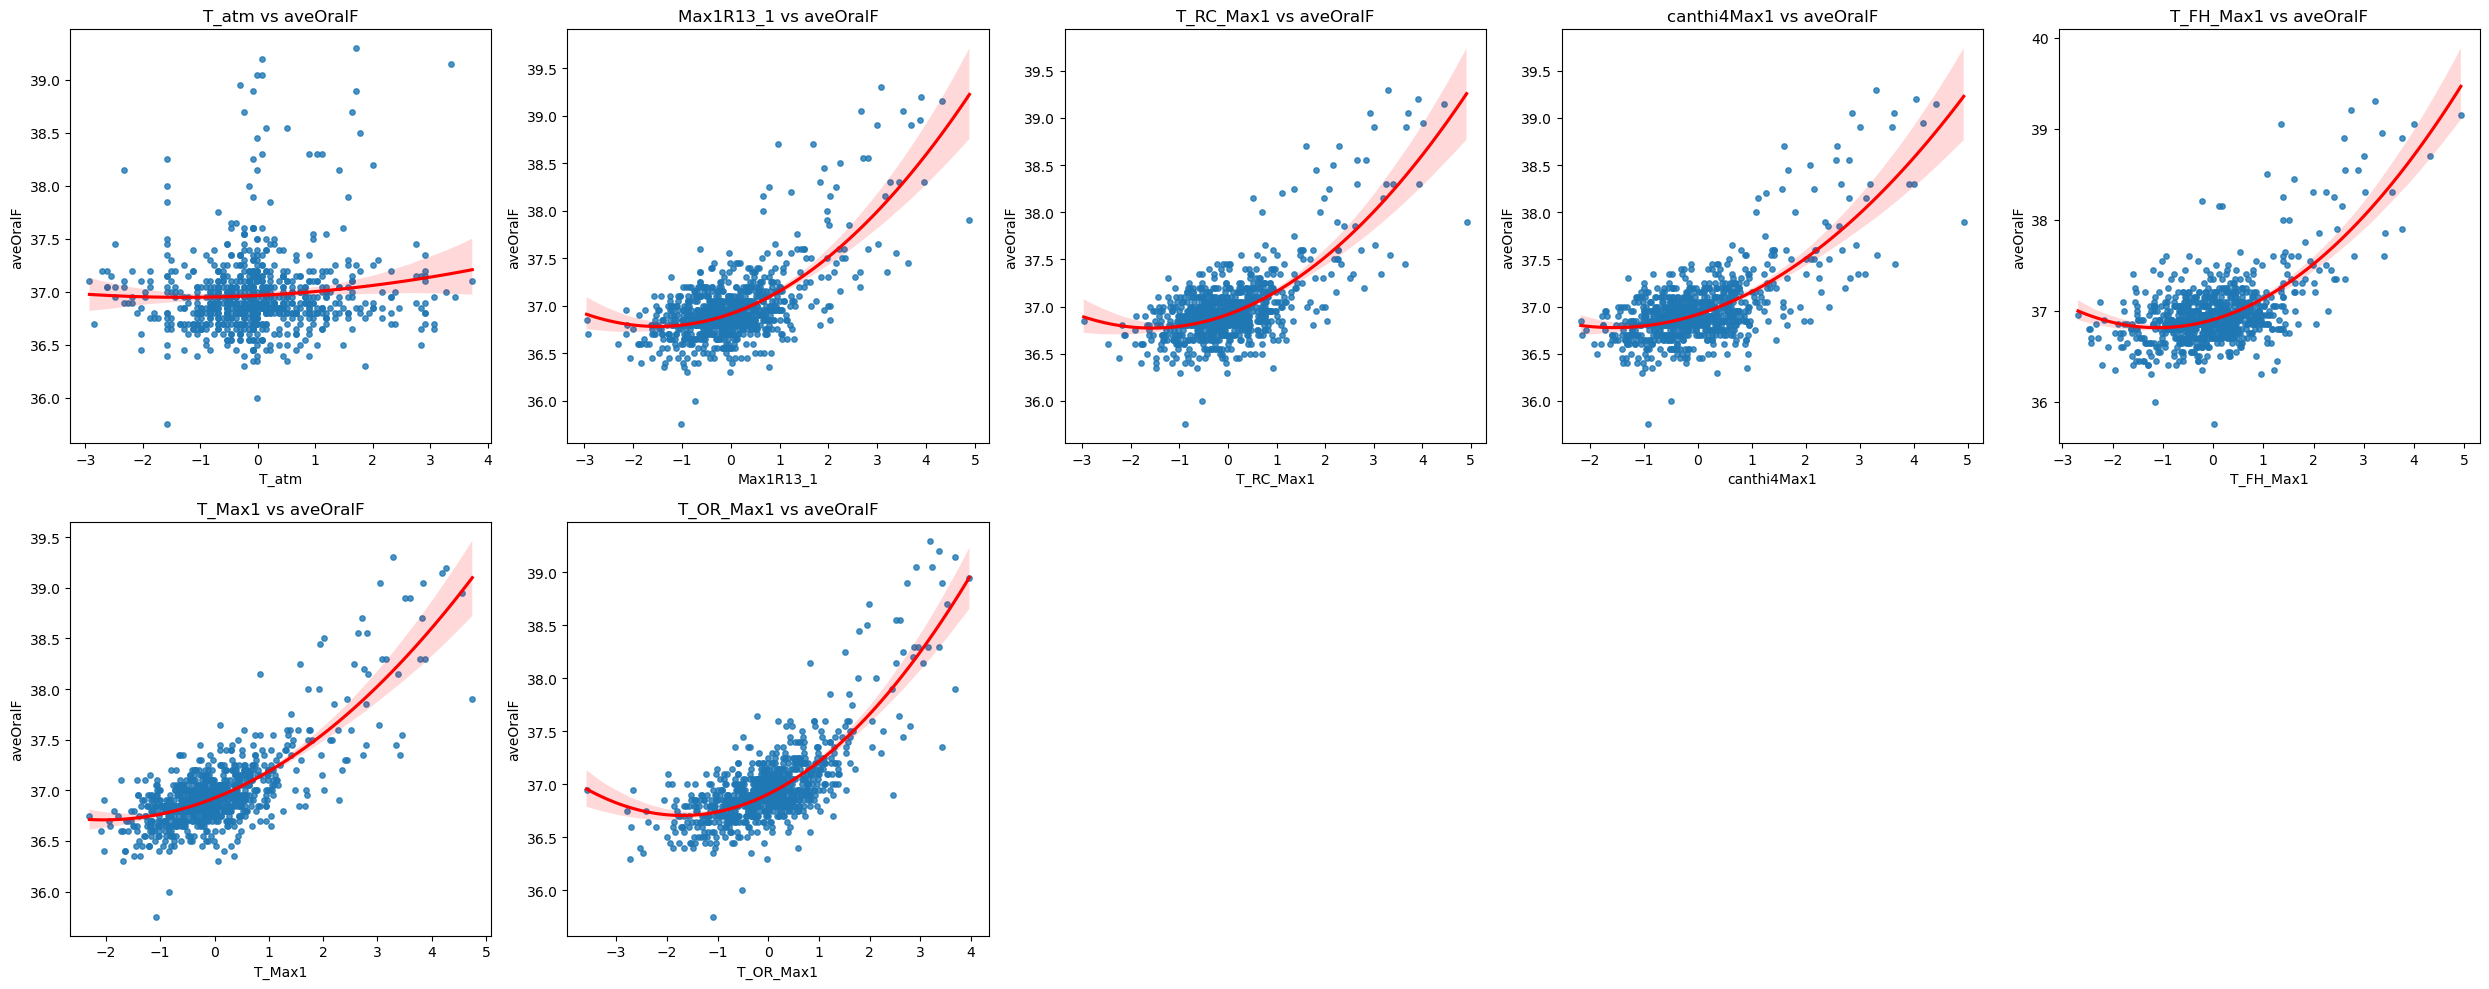

In [105]:
# To select the most appropriate features for the polynomial model, we need to see the curves into the graphs
features = ['T_atm', 'Max1R13_1', 'T_RC_Max1', 'canthi4Max1', 'T_FH_Max1', 'T_Max1', 'T_OR_Max1']

n = len(features)
cols = 5  
rows = n // cols + (n % cols > 0)  


plt.figure(figsize=(5*cols, 5*rows))


for i, feature in enumerate(features):
    plt.subplot(rows, cols, i+1)
    sns.regplot(x=back_select_f[feature], y=y_train_strat_f, order=2, line_kws={"color": "red"}, scatter_kws={"s": 15})
    plt.title(f'{feature} vs aveOralF')
    plt.xlabel(feature)
    plt.tight_layout()

plt.show()



In [106]:
# The reason why I chose the variables in backward selection is because I think it would not be a good idea to use all the variables 
# for both the strongest estimators and the polynomial regression model.

X = X_train_strat_f[['Max1R13_1', 'T_RC_Max1', 'canthi4Max1', 'T_FH_Max1', 'T_Max1', 'T_OR_Max1']]
y = y_train_strat_f


poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)


poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

#Calculating RMSE for polynomial model
y_pred = poly_reg.predict(X_poly)
poly_rmse = np.sqrt(mean_squared_error(y, y_pred))
print(round(poly_rmse, 2))


0.22


In [107]:
# Polynomial regression model with cross-validation
from sklearn.model_selection import cross_val_score

# Calculating negative MSE values with 5-fold cross-validation
poly_scores = cross_val_score(poly_reg, X_poly, y, n_jobs=-1, scoring="neg_mean_squared_error", cv=10)

poly_rmse_scores = np.sqrt(-poly_scores)


print("Scores:", np.round(poly_rmse_scores, 2))
print("Mean:", round(poly_rmse_scores.mean(), 2))
print("Standard deviation:", round(poly_rmse_scores.std(), 2))


Scores: [0.24 0.24 0.25 0.22 0.23 0.26 0.22 0.24 0.2  0.23]
Mean: 0.23
Standard deviation: 0.02


As can be seen, the CV RMSE average and the RMSE value of our model are almost the same.

### • SGD for Polynomial Regression

In [108]:
#RMSE for SGD(polynomial reg)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

pipeline = make_pipeline(StandardScaler(), 
                         SGDRegressor(max_iter=1000, tol=1e-3, penalty=None))

pipeline.fit(X_poly, y)

y_train_pred = pipeline.predict(X_poly)

rmse_train_sgd_poly = np.sqrt(mean_squared_error(y, y_train_pred))
rmse_train_sgd_poly


0.23641221094777137

### 3.1.3 KNN Model

In [109]:
neigh_reg = KNeighborsRegressor(n_neighbors=1)
neigh_reg.fit(X_train_strat_f, y_train_strat_f)

KNeighborsRegressor(n_neighbors=1)

In [110]:
#mse is 0, model overfits
fast_prediction_neigh = neigh_reg.predict(X_train_strat_f)
fast_neigh_mse = mean_squared_error(y_train_strat_f, fast_prediction_neigh)
fast_neigh_rmse = np.sqrt(fast_neigh_mse)
fast_neigh_rmse

0.0

The optimal number of neighbors is: 16


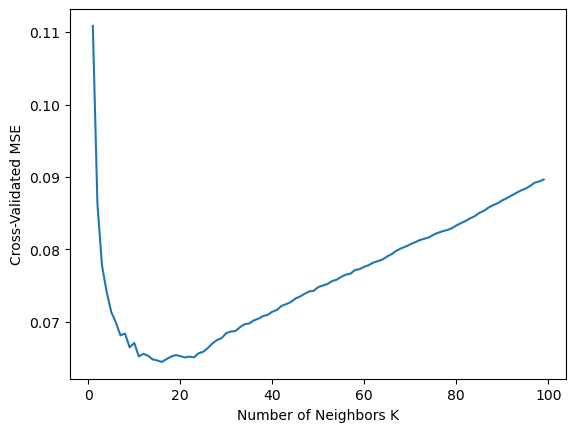

In [111]:
# Range of "k" values to try
k_values = range(1, 100)

# Storing the average cross-validated scores
avg_scores = []

# Looping over possible "k" values
for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    # Performing cross-validation and compute the average MSE
    scores = cross_val_score(model, X_train_strat_f, y_train_strat_f, 
                             n_jobs=-1, scoring='neg_mean_squared_error', cv=10)
    avg_scores.append(np.mean(scores))

# Converting MSE scores to positive, as cross_val_score returns negative values for MSE to facilitate maximization
avg_scores = np.abs(avg_scores)

# Finding the "k" value that minimizes the MSE
optimal_k = k_values[np.argmin(avg_scores)]
print(f"The optimal number of neighbors is: {optimal_k}")

plt.plot(k_values, avg_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Cross-Validated MSE')
plt.show()


In [112]:
neigh_reg_opt = KNeighborsRegressor(n_neighbors=16)
neigh_reg_opt.fit(X_train_strat_f, y_train_strat_f)
fast_prediction_neigh_opt = neigh_reg_opt.predict(X_train_strat_f)
fast_neigh_mse_opt = mean_squared_error(y_train_strat_f, fast_prediction_neigh_opt)
fast_neigh_rmse_opt = np.sqrt(fast_neigh_mse_opt)
print(round(fast_neigh_rmse_opt, 2))

0.24


When we build the model with the k value being 1, the RMSE value is seen as 0. This is also a sign of overfitting. To solve the overfitting problem, we found the optimum k value and created a new model using it to reach the optimum RMSE value.

### 3.1.4 Decision Tree Model

In [113]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_strat_f, y_train_strat_f)

DecisionTreeRegressor(random_state=42)

In [114]:
fast_prediction_tree = tree_reg.predict(X_train_strat_f)
fast_tree_mse = mean_squared_error(y_train_strat_f, fast_prediction_tree)
fast_tree_rmse = np.sqrt(fast_tree_mse)
print(round(fast_tree_rmse, 2))

0.0


Overfitting!

In [115]:
#To avoid overfitting, we built a new model with max_depth=4.

tree_reg2 = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_reg2.fit(X_train_strat_f, y_train_strat_f)
fast_prediction_tree2 = tree_reg2.predict(X_train_strat_f)
fast_tree_mse2 = mean_squared_error(y_train_strat_f, fast_prediction_tree2)
fast_tree_rmse2 = np.sqrt(fast_tree_mse2)
print(round(fast_tree_rmse2, 2))

0.2


In [117]:
# Calculating negative MSE values with 5-fold cross-validation
scores = cross_val_score(tree_reg2, X_train_strat_f, y_train_strat_f,
                         n_jobs=-1, scoring="neg_mean_squared_error", cv=10)

tree_rmse_scores = np.sqrt(-scores)

print("Scores:", np.round(tree_rmse_scores, 2))
print("Mean:", round(tree_rmse_scores.mean(), 2))
print("Standard deviation:", round(tree_rmse_scores.std(), 2))


Scores: [0.24 0.29 0.31 0.24 0.29 0.26 0.25 0.25 0.21 0.3 ]
Mean: 0.26
Standard deviation: 0.03


CV RMSE mean: 0.26, model RMSE : 0.2. There is not any problem.

### 3.1.5 Random Forest Regression Model

In [118]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train_strat_f, y_train_strat_f)

RandomForestRegressor(random_state=42)

In [119]:
forest_predictions = forest_reg.predict(X_train_strat_f)
forest_mse = mean_squared_error(y_train_strat_f, forest_predictions)
forest_rmse = np.sqrt(forest_mse)
print(round(forest_rmse, 2))

0.09


In [120]:
# Calculate negative MSE values with 5-fold cross-validation
scores = cross_val_score(forest_reg, X_train_strat_f, y_train_strat_f,
                         n_jobs=-1, scoring="neg_mean_squared_error", cv=10)

# Convert MSE values to positive and calculate RMSE
forest_rmse_scores = np.sqrt(-scores)

# Print cross-validation results
print("Scores:", np.round(forest_rmse_scores, 2))
print("Mean:", round(forest_rmse_scores.mean(), 2))
print("Standard deviation:", round(forest_rmse_scores.std(), 2))

Scores: [0.22 0.25 0.26 0.22 0.23 0.25 0.22 0.25 0.21 0.25]
Mean: 0.24
Standard deviation: 0.02


We have a bit differencies between CV rmse and model mse. But still there is not significant gap between them.

### 3.1.6 XGBoost Model

In [121]:
xgb_reg = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_reg.fit(X_train_strat_f, y_train_strat_f)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [122]:
xgb_predictions = xgb_reg.predict(X_train_strat_f)
xgb_mse = mean_squared_error(y_train_strat_f, xgb_predictions)
xgb_rmse = np.sqrt(xgb_mse)
print(round(xgb_rmse, 2))

0.0


Overfitting!

In [123]:
# With max_depth=3
xgb_reg2 = xgb.XGBRegressor(n_estimators=100, max_depth=3, random_state=42)
xgb_reg2.fit(X_train_strat_f, y_train_strat_f)
xgb_predictions2 = xgb_reg2.predict(X_train_strat_f)
xgb_mse2 = mean_squared_error(y_train_strat_f, xgb_predictions2)
xgb_rmse2 = np.sqrt(xgb_mse2)
print(round(xgb_rmse2, 2))

0.07


In [124]:

scores = cross_val_score(xgb_reg, X_train_strat_f, y_train_strat_f,
                         n_jobs=-1, scoring="neg_mean_squared_error", cv=10)

xgb_rmse_scores = np.sqrt(-scores)

print("Scores:", np.round(xgb_rmse_scores, 2))
print("Mean:", round(xgb_rmse_scores.mean(), 2))
print("Standard deviation:", round(xgb_rmse_scores.std(), 2))

Scores: [0.23 0.27 0.3  0.24 0.24 0.28 0.24 0.29 0.23 0.27]
Mean: 0.26
Standard deviation: 0.02


AS same as with random forest model. There is a gap between cv rmse mean and model rmse. But not significant.

### 3.1.7 MLP Model

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 769.6788 - val_loss: 94.2896
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - loss: 90.4485 - val_loss: 75.1855
Epoch 3/20


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - loss: 79.0546 - val_loss: 68.3222
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - loss: 58.7378 - val_loss: 51.0169
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - loss: 51.5114 - val_loss: 46.6237
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - loss: 44.5953 - val_loss: 41.1893
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - loss: 42.4175 - val_loss: 35.5772
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - loss: 34.7544 - val_loss: 28.2676
Epoch 9/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - loss: 31.3607 - val_loss: 27.6143
Epoch 10/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - loss: 28.4030 - val_loss: 27.5704
Epoch 11/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - loss: 27.0738 - val_loss: 20.9491
Epoch 12/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - loss: 21.2598 - val_loss: 18.8351
Epoch 13/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - loss: 21.4273 - val_loss: 17.9330
Epoch 14/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 

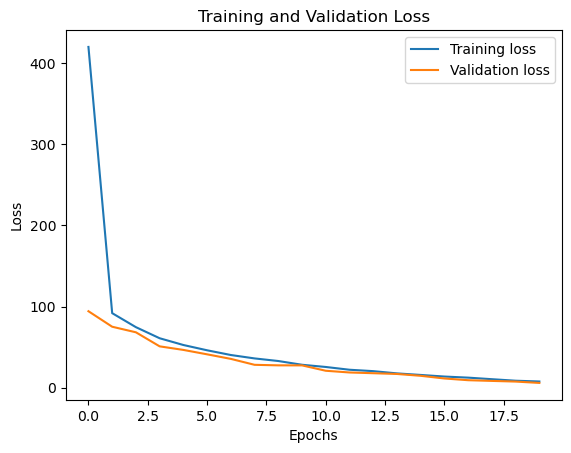

In [125]:
# Building the model
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train_strat_f.shape[1:]),
    keras.layers.Dense(1)
])

# Compiling the model
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=0.001))

# Fitting the model to the training data
history = model.fit(X_train_strat_f, y_train_strat_f, epochs=20, validation_split=0.1)

# Evaluating the model's performance on the training set
mse_train_mlp = model.evaluate(X_train_strat_f, y_train_strat_f)
rmse_train_mlp = np.sqrt(mse_train_mlp)
print(f"Train RMSE: {rmse_train_mlp:.4f}")



# Plotting the training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



### • MLP Tune1 (early stopping)

Restoring model weights from the end of the best epoch: 50.
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step - loss: 0.4539
Train RMSE: 0.6549


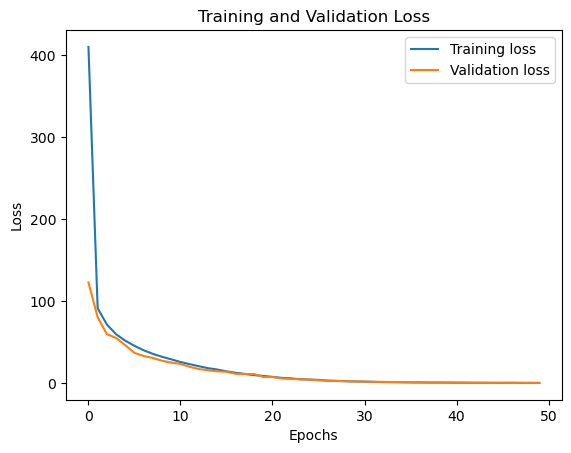

In [126]:


model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train_strat_f.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=0.001))

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True, verbose=1)

history = model.fit(X_train_strat_f, y_train_strat_f, epochs=50, validation_split=0.1, callbacks=[early_stopping_cb], verbose=0)

mse_train_mlp_tune1 = model.evaluate(X_train_strat_f, y_train_strat_f)
rmse_train_mlp_tune1 = np.sqrt(mse_train_mlp_tune1)
print(f"Train RMSE: {rmse_train_mlp_tune1:.4f}")

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### • MLP with Keras Tuner

In [127]:
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape=X_train_strat_f.shape[1:]))
    # Adjusting the number of layers and the number of neurons with Keras Tuner
    for i in range(hp.Int('num_layers', 1, 10)):
        model.add(keras.layers.Dense(units=hp.Int('units_' + str(i),
                                                  min_value=16,
                                                  max_value=512,
                                                  step=32),
                                     activation='relu'))
    # Output layer
    model.add(keras.layers.Dense(1))  # For regression problem, use 1 neuron
    
    # Choosing the optimizer and setting the learning rate
    lr = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),
                  loss='mean_squared_error',  # MSE is used for regression
                  metrics=['mean_squared_error'])
    return model

# Setting up Keras Tuner
tuner = kt.Hyperband(build_model,
                     objective='val_mean_squared_error',  # Minimize MSE on the validation set
                     max_epochs=10,
                     directory='my_dir',
                     project_name='intro_to_kt')

# EarlyStopping Callback
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Starting the hyperparameter search
tuner.search(X_train_strat_f, y_train_strat_f,
             epochs=50,
             validation_split=0.2,
             callbacks=[stop_early])

# Getting the best hyperparameters and retrain the model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train_strat_f, y_train_strat_f,
                    epochs=50,
                    validation_split=0.2)

# Getting the final MSE value
final_mse = history.history['mean_squared_error'][-1]

# Calculating the final RMSE value
final_rmse = np.sqrt(final_mse)
print(f"Final Training RMSE: {final_rmse:.4f}")

# Getting the final MSE value for the validation set
final_val_mse = history.history['val_mean_squared_error'][-1]

# Calculate the final RMSE for the validation set
rmse_training_mlp_ktuner = np.sqrt(final_val_mse)
print(f"Final Validation RMSE: {rmse_training_mlp_ktuner:.4f}")


Reloading Tuner from my_dir/intro_to_kt/tuner0.json
Epoch 1/50


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3080.1794 - mean_squared_error: 3084.2358 - val_loss: 703.8560 - val_mean_squared_error: 701.2460
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 491.1898 - mean_squared_error: 491.7518 - val_loss: 192.6650 - val_mean_squared_error: 187.8934
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 107.2699 - mean_squared_error: 107.2591 - val_loss: 57.8663 - val_mean_squared_error: 47.6628
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 47.9333 - mean_squared_error: 47.9770 - val_loss: 36.0207 - val_mean_squared_error: 30.0455
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29.7850 - mean_squared_error: 29.7786 - val_loss: 23.0126 - val_mean_squared_error: 20.1163
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 23.2653 - mean_squared_error: 23.2119 - val_loss: 28.7918 - val_mean_squared_error: 26.1475
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16.6306 - mean_squared_error: 16.6486 - v

### 3.1.8 Detecting the Best Model

In [128]:
rmse_values = {
    "Model": ["Linear Regression", "SGD Linear Regression", "Polynomial Regression", "SGD Polynomial Regression", "KNN", "Decision Tree", "Random Forest", "XGBoost", "MLP", "MLP RMSE Tune1", "MLP Ktuner"],
    "RMSE": [
        lin_rmse,  # Linear Regression RMSE
        rmse_train_sgd_lin, # SGD Linear Regression
        poly_rmse,  # Polynomial Regression RMSE
        rmse_train_sgd_poly, # SGD Polynomial Regression
        fast_neigh_rmse_opt,  # KNN RMSE
        fast_tree_rmse2,  # Decision Tree RMSE
        forest_rmse,  # Random Forest RMSE
        xgb_rmse2,  # XGBoost RMSE
        rmse_train_mlp,  # MLP RMSE 
        rmse_train_mlp_tune1, # MLP RMSE Tune1
        rmse_training_mlp_ktuner # MLP RMSE Ktuner
    ]
}

rmse_df = pd.DataFrame(rmse_values)
rmse_df

Model      RMSE
0           Linear Regression  0.238338
1       SGD Linear Regression  0.250444
2       Polynomial Regression  0.221202
3   SGD Polynomial Regression  0.236412
4                         KNN  0.238312
5               Decision Tree  0.198130
6               Random Forest  0.089872
7                     XGBoost  0.072796
8                         MLP  2.576304
9              MLP RMSE Tune1  0.654893
10                 MLP Ktuner  0.301917

According to RMSE scores, our best model appears to be XGBoost. However, this prediction may change slightly in the evaluation on the test set, so we choose the two models with the two lowest rmse scores: XGBoost and Random Forest.

### • Grid Search (XGBoost)

In [129]:
# Define the hyperparameter ranges
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1]
}

# XGBRegressor model
xgb_reg = XGBRegressor(random_state=42)

# GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Runninh the Grid Search
grid_search.fit(X_train_strat_f, y_train_strat_f)

# Finding the best parameters and score
best_params = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)

# Making predictions on the test set with the best model and calculating RMSE
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_train_strat_f)
rmse = np.sqrt(mean_squared_error(y_train_strat_f, predictions))

(best_params, best_score, rmse)


Fitting 5 folds for each of 432 candidates, totalling 2160 fits


({'colsample_bytree': 0.8,
  'learning_rate': 0.1,
  'max_depth': 3,
  'n_estimators': 100,
  'subsample': 0.8},
 0.22980134929541302,
 0.137492605948218)

In [130]:
grid_search.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

### • Randomized Search (XGBoost)

In [131]:
# Defining the hyperparameter distributions
param_distribs = {
    'max_depth': randint(low=3, high=10),
    'learning_rate': uniform(0.01, 0.2),
    'n_estimators': randint(100, 500),
    'subsample': uniform(0.8, 0.2),
    'colsample_bytree': uniform(0.7, 0.3)
}

# XGBRegressor model
xgb_reg = XGBRegressor(random_state=42)

# RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=xgb_reg, param_distributions=param_distribs,
                                   n_iter=10, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1, random_state=42)

# Running the Randomized Search
random_search.fit(X_train_strat_f, y_train_strat_f)

# Finding the best parameters and score
best_params_random = random_search.best_params_
best_score_random = np.sqrt(-random_search.best_score_)

# Making predictions on the test set with the best model and calculate RMSE
best_model_random = random_search.best_estimator_
predictions_random = best_model_random.predict(X_train_strat_f)
rmse_random = np.sqrt(mean_squared_error(y_train_strat_f, predictions_random))

(best_params_random, best_score_random, rmse_random)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


({'colsample_bytree': 0.7468055921327309,
  'learning_rate': 0.041198904067240534,
  'max_depth': 5,
  'n_estimators': 187,
  'subsample': 0.8667417222278044},
 0.23622731078518705,
 0.08546149770369621)

In [132]:
random_search.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7468055921327309, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.041198904067240534, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=187, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

### • Grid Search (Random Forest)

In [133]:


param_grid = [
   
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},

    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]


forest_reg = RandomForestRegressor(random_state=42)

grid_search_forest = GridSearchCV(forest_reg, param_grid, cv=5,
                                  scoring='neg_mean_squared_error',
                                  return_train_score=True, verbose=1)

grid_search_forest.fit(X_train_strat_f, y_train_strat_f)


best_params_forest = grid_search_forest.best_params_
best_score_forest = np.sqrt(-grid_search_forest.best_score_)

best_model_forest = grid_search_forest.best_estimator_
predictions_forest = best_model_forest.predict(X_train_strat_f)
rmse_forest = np.sqrt(mean_squared_error(y_train_strat_f, predictions_forest))

(best_params_forest, best_score_forest, rmse_forest)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


({'max_features': 8, 'n_estimators': 30},
 0.23875812747301203,
 0.09411846617631014)

In [134]:
grid_search_forest.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

### • Randomized Search (Random Forest)

In [135]:

param_distribs = {
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=8),
}

forest_reg = RandomForestRegressor(random_state=42)

rnd_search_forest = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                       n_iter=10, cv=5, scoring='neg_mean_squared_error',
                                       random_state=42, verbose=1)

rnd_search_forest.fit(X_train_strat_f, y_train_strat_f)

best_params_rnd_forest = rnd_search_forest.best_params_
best_score_rnd_forest = np.sqrt(-rnd_search_forest.best_score_)


best_model_rnd_forest = rnd_search_forest.best_estimator_
predictions_rnd_forest = best_model_rnd_forest.predict(X_train_strat_f)
rmse_rnd_forest = np.sqrt(mean_squared_error(y_train_strat_f, predictions_rnd_forest))

(best_params_rnd_forest, best_score_rnd_forest, rmse_rnd_forest)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


({'max_features': 7, 'n_estimators': 180},
 0.23592384808934336,
 0.08871661877208013)

When we look at the results of grid and randomized searches, randomforest RMSE score is often lower than XGBoost. We can choose the random forest model with randomized search as the best model.

### 3.1.9 Analyze and Evaluate the Best Model on the Test Set

In [136]:
rnd_search_forest.best_estimator_

RandomForestRegressor(max_features=7, n_estimators=180, random_state=42)

In [137]:
feature_importances = random_search.best_estimator_.feature_importances_
feature_importances

array([0.00239617, 0.00304753, 0.01050809, 0.01134866, 0.01108437,
       0.01070881, 0.00962969, 0.00853648, 0.01021087, 0.01000113,
       0.01019056, 0.01125949, 0.01083636, 0.03970414, 0.02486067,
       0.00981455, 0.01122383, 0.00966862, 0.00929728, 0.01107235,
       0.01439107, 0.02695196, 0.0134183 , 0.0119829 , 0.0120533 ,
       0.01190728, 0.01530044, 0.01073558, 0.02580406, 0.0119944 ,
       0.10674931, 0.31573465, 0.18757713], dtype=float32)

In [138]:
print(X_train_strat_f.columns)


Index(['Gender', 'Age', 'Ethnicity', 'T_atm', 'Humidity', 'Distance',
       'T_offset1', 'Max1R13_1', 'Max1L13_1', 'aveAllR13_1', 'aveAllL13_1',
       'T_RC1', 'T_RC_Dry1', 'T_RC_Wet1', 'T_RC_Max1', 'T_LC1', 'T_LC_Dry1',
       'T_LC_Wet1', 'T_LC_Max1', 'RCC1', 'LCC1', 'canthiMax1', 'canthi4Max1',
       'T_FHCC1', 'T_FHRC1', 'T_FHLC1', 'T_FHBC1', 'T_FHTC1', 'T_FH_Max1',
       'T_FHC_Max1', 'T_Max1', 'T_OR1', 'T_OR_Max1'],
      dtype='object')


In [139]:
# Getting the best estimator found by the model and matching its feature importance with column names
best_estimator = random_search.best_estimator_

# Combining feature importances with column names and sorting them
feature_importances = best_estimator.feature_importances_
features = X_train_strat_f.columns
importances = zip(features, feature_importances)
sorted_importances = sorted(importances, key=lambda x: x[1], reverse=True)

# Printing the sorted feature importances and column names
for feature, importance in sorted_importances:
    print(f"{feature}: {importance}")


T_OR1: 0.3157346546649933
T_OR_Max1: 0.18757712841033936
T_Max1: 0.10674931108951569
T_RC_Wet1: 0.03970414400100708
canthiMax1: 0.02695196494460106
T_FH_Max1: 0.025804055854678154
T_RC_Max1: 0.024860668927431107
T_FHBC1: 0.015300439670681953
LCC1: 0.014391065575182438
canthi4Max1: 0.013418304733932018
T_FHRC1: 0.012053300626575947
T_FHC_Max1: 0.011994395405054092
T_FHCC1: 0.01198289729654789
T_FHLC1: 0.011907282285392284
T_atm: 0.011348659172654152
T_RC1: 0.011259488761425018
T_LC_Dry1: 0.011223826557397842
Humidity: 0.011084365658462048
RCC1: 0.011072349734604359
T_RC_Dry1: 0.010836356319487095
T_FHTC1: 0.010735581628978252
Distance: 0.010708807967603207
Ethnicity: 0.01050808746367693
Max1L13_1: 0.010210872627794743
aveAllL13_1: 0.010190561413764954
aveAllR13_1: 0.010001132264733315
T_LC1: 0.0098145492374897
T_LC_Wet1: 0.009668616577982903
T_offset1: 0.00962968822568655
T_LC_Max1: 0.009297278709709644
Max1R13_1: 0.008536477573215961
Age: 0.003047534730285406
Gender: 0.0023961681872606

In [140]:
final_model = random_search.best_estimator_
test_predictions = final_model.predict(X_test_strat_f)

# RMSE calculation
test_mse = mean_squared_error(y_test_strat_f, test_predictions)
test_rmse = np.sqrt(test_mse)

test_rmse


0.23375884287439355

In [141]:
sample_data_final = X_test_strat_f.iloc[:20]
sample_labels_final = y_test_strat_f.iloc[:20]



predictions_sample = final_model.predict(sample_data_final)
sample_comparison_df = pd.DataFrame({"Actual": sample_labels_final, "Predicted": predictions_sample})

sample_comparison_df

Actual  Predicted
52    36.85  37.001980
253   37.00  36.901157
252   36.75  36.960251
13    36.95  36.965260
891   36.75  36.738583
35    36.95  37.025482
107   36.65  36.693142
633   37.20  37.097980
671   36.05  36.742615
328   36.80  36.976292
32    37.20  36.999157
928   36.70  36.885521
771   36.90  36.819527
864   36.95  36.980637
20    36.90  36.561817
516   36.75  36.903240
240   36.95  37.118141
520   36.80  36.948666
865   37.05  37.037678
326   36.70  36.701267

## 3.2 Regression Task-2 ('aveOralM')

### Preparation For ML Algorithms

#### • Backward Selection

In [142]:
# We will do Backward Selection for the polynomial model
X = data_M_reg.drop(['aveOralF', 'aveOralM'], axis=1)  
y = data_M_reg['aveOralM']


X = sm.add_constant(X)

modelm = sm.OLS(y, X).fit()

# Backward elimination process
p_value_threshold = 0.05
variables = X.columns.tolist()
while len(variables) > 0:
    # Fitting the model and get the p-values
    model = sm.OLS(y, X[variables]).fit()
    p_values = model.pvalues
    
    # Getting the max p-value and its corresponding variable
    max_p_value_var = p_values.idxmax()
    max_p_value = p_values.max()
    
    # Checking if the max p-value is greater than the threshold
    if max_p_value > p_value_threshold:
        # Remove the variable with the highest p-value
        variables.remove(max_p_value_var)
    else:
        
        break


final_features_m = variables
print('Selected features:', final_features_m)

Selected features: ['const', 'Gender', 'T_atm', 'T_offset1', 'Max1R13_1', 'T_RC_Max1', 'T_FHCC1', 'T_FHC_Max1', 'T_Max1', 'T_OR_Max1', 'Fever_aveOralF', 'Fever_aveOralM']


### • Standartisation

In [143]:
# List of columns to exclude from standardization
columns_to_exclude_m = ['aveOralF', 'aveOralM','Fever_aveOralM', 'Fever_aveOralF','Age', 'Gender', 'Distance', 'Ethnicity']

columns_to_scale_m = [col for col in data_M_reg.columns if col not in columns_to_exclude_m]

scaler_m = StandardScaler()

data_M_reg[columns_to_scale_m] = scaler_m.fit_transform(data_M_reg[columns_to_scale_m])

data_M_reg.head()  


Gender  Age  Ethnicity     T_atm  Humidity  Distance  T_offset1  Max1R13_1  \
0       2    5          1 -0.086392 -0.055341       0.8  -0.734385  -0.985950   
1       1    4          3 -0.086392 -0.208419       0.8  -0.520538  -1.821305   
2       1    3          1 -0.086392 -0.208419       0.8  -0.292895   0.097401   
3       1    3          3 -0.086392 -0.131880       0.8  -0.106642  -0.650938   
4       2    1          1 -0.086392 -0.131880       0.8  -0.203217  -0.089684   

   Max1L13_1  aveAllR13_1  ...   T_FHTC1  T_FH_Max1  T_FHC_Max1    T_Max1  \
0  -0.425802    -0.680080  ... -2.162224  -1.703974   -1.887314 -0.798009   
1  -1.986339    -1.334438  ... -0.789203  -1.412510   -0.754033 -1.850738   
2  -0.171020    -0.850631  ...  0.127288  -0.146314    0.222933 -0.350472   
3   0.001867    -0.700964  ...  0.467111   0.345830    0.383589 -0.742067   
4   0.097411     0.029969  ... -1.029482  -0.007750    0.483457 -0.386072   

      T_OR1  T_OR_Max1  aveOralF  aveOralM  Fever_aveOralF  Fever_aveOralM  
0 -0.305051  -0.332313     36.85     36.59               0               0  
1 -1.275562  -1.307195     37.00     37.19               0               0  
2  0.097465   0.083577     37.20     37.34               0               0  
3 -1.503654  -1.530792     36.85     37.09               0               0  
4 -0.390027  -0.394920     36.80     37.04               0               0  

[5 rows x 37 columns]

### • Splitting

In [144]:

Xm = data_M_reg.drop(['aveOralF','Fever_aveOralF', 'aveOralM'], axis=1) 
ym = data_M_reg['aveOralM']  

strat_split_m = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in strat_split.split(Xm, data_M_reg['Fever_aveOralM']):
    X_train_strat_m = Xm.loc[train_index]
    y_train_strat_m = ym[train_index]
    X_test_strat_m = Xm.loc[test_index]
    y_test_strat_m = ym[test_index]
    


In [145]:
X_train_strat_m

Gender  Age  Ethnicity     T_atm  Humidity  Distance  T_offset1  \
316       2    1          2 -1.508886 -0.552845      0.70  -0.665402   
763       1    2          2  0.662289  1.597904      0.60   0.314153   
789       1    2          4  1.560706  1.513711      0.60   2.838923   
958       2    2          1  3.357541 -0.017071      0.70   1.197133   
479       1    1          2 -0.161260 -0.147188      0.60   0.224476   
..      ...  ...        ...       ...       ...       ...        ...   
873       1    2          1 -0.086392 -0.116572      0.60   0.872914   
904       1    2          2 -0.460732 -1.157504      0.60  -0.555030   
648       1    2          1 -0.310996 -0.927887      0.60  -0.161828   
599       2    1          1 -0.460732 -0.996772      0.60  -0.037659   
630       1    2          2 -0.310996 -1.027387      0.65  -0.741283   

     Max1R13_1  Max1L13_1  aveAllR13_1  ...   T_FHRC1   T_FHLC1   T_FHBC1  \
316  -1.038160  -1.253842    -0.544335  ...  0.429272  0.316454  0.216850   
763  -0.176700  -0.157371     0.604273  ...  0.474110  0.430705  0.475186   
789   0.815285   0.570576     0.788746  ...  1.154147  1.083041  1.167823   
958   2.651325   2.390445     2.320223  ...  1.591313  1.654297  1.995245   
479  -1.890918  -1.434312    -1.329797  ... -0.529754 -0.066840 -0.385932   
..         ...        ...          ...  ...       ...       ...       ...   
873  -0.607430  -0.639636    -0.714886  ... -0.938274 -1.636871 -1.887271   
904   0.523780   1.139285     0.583389  ...  0.455428  1.108840  0.434002   
648   3.882604   4.219413     2.160114  ...  1.946277  2.044962  2.081357   
599  -0.385538  -0.898968     0.155271  ...  0.313442 -0.343254 -0.191244   
630   0.480272   0.479583     0.656482  ...  0.567522  1.193607  1.328815   

      T_FHTC1  T_FH_Max1  T_FHC_Max1    T_Max1     T_OR1  T_OR_Max1  \
316  0.185642   0.126037    0.075302  0.280148  0.656515   0.687288   
763  0.700524   0.560844    0.561614 -0.086019  0.160078   0.159600   
789  1.071240   0.579956    0.995821  0.702256  1.050086   1.058459   
958  1.788643   1.936936    1.764368  2.121151  1.774614   1.796329   
479 -0.481418  -0.327882   -0.591929 -0.843780 -0.963985  -0.950931   
..        ...        ...         ...       ...       ...        ...   
873 -0.638171  -0.738798   -1.314161 -0.655611 -0.712039  -0.734787   
904  0.566655   0.737634    0.717929  0.554772  0.777269   0.758839   
648  2.135331   3.356031    2.255022  4.552090  3.961617   3.969690   
599 -0.133586  -0.614568   -0.341537 -1.169261 -0.846211  -0.851058   
630  1.421360   1.545132    1.299766  1.398990  1.510743   1.528013   

     Fever_aveOralM  
316               0  
763               0  
789               0  
958               1  
479               0  
..              ...  
873               0  
904               0  
648               1  
599               0  
630               0  

[816 rows x 34 columns]

In [146]:
for set_ in (X_train_strat_m, X_test_strat_m):
    set_.drop("Fever_aveOralM", axis=1, inplace=True)

In [147]:
X_train_strat_m

Gender  Age  Ethnicity     T_atm  Humidity  Distance  T_offset1  \
316       2    1          2 -1.508886 -0.552845      0.70  -0.665402   
763       1    2          2  0.662289  1.597904      0.60   0.314153   
789       1    2          4  1.560706  1.513711      0.60   2.838923   
958       2    2          1  3.357541 -0.017071      0.70   1.197133   
479       1    1          2 -0.161260 -0.147188      0.60   0.224476   
..      ...  ...        ...       ...       ...       ...        ...   
873       1    2          1 -0.086392 -0.116572      0.60   0.872914   
904       1    2          2 -0.460732 -1.157504      0.60  -0.555030   
648       1    2          1 -0.310996 -0.927887      0.60  -0.161828   
599       2    1          1 -0.460732 -0.996772      0.60  -0.037659   
630       1    2          2 -0.310996 -1.027387      0.65  -0.741283   

     Max1R13_1  Max1L13_1  aveAllR13_1  ...   T_FHCC1   T_FHRC1   T_FHLC1  \
316  -1.038160  -1.253842    -0.544335  ...  0.128152  0.429272  0.316454   
763  -0.176700  -0.157371     0.604273  ...  0.336444  0.474110  0.430705   
789   0.815285   0.570576     0.788746  ...  1.102664  1.154147  1.083041   
958   2.651325   2.390445     2.320223  ...  1.753578  1.591313  1.654297   
479  -1.890918  -1.434312    -1.329797  ... -0.709978 -0.529754 -0.066840   
..         ...        ...          ...  ...       ...       ...       ...   
873  -0.607430  -0.639636    -0.714886  ... -1.426604 -0.938274 -1.636871   
904   0.523780   1.139285     0.583389  ...  0.410835  0.455428  1.108840   
648   3.882604   4.219413     2.160114  ...  2.159005  1.946277  2.044962   
599  -0.385538  -0.898968     0.155271  ... -0.035507  0.313442 -0.343254   
630   0.480272   0.479583     0.656482  ...  1.087786  0.567522  1.193607   

      T_FHBC1   T_FHTC1  T_FH_Max1  T_FHC_Max1    T_Max1     T_OR1  T_OR_Max1  
316  0.216850  0.185642   0.126037    0.075302  0.280148  0.656515   0.687288  
763  0.475186  0.700524   0.560844    0.561614 -0.086019  0.160078   0.159600  
789  1.167823  1.071240   0.579956    0.995821  0.702256  1.050086   1.058459  
958  1.995245  1.788643   1.936936    1.764368  2.121151  1.774614   1.796329  
479 -0.385932 -0.481418  -0.327882   -0.591929 -0.843780 -0.963985  -0.950931  
..        ...       ...        ...         ...       ...       ...        ...  
873 -1.887271 -0.638171  -0.738798   -1.314161 -0.655611 -0.712039  -0.734787  
904  0.434002  0.566655   0.737634    0.717929  0.554772  0.777269   0.758839  
648  2.081357  2.135331   3.356031    2.255022  4.552090  3.961617   3.969690  
599 -0.191244 -0.133586  -0.614568   -0.341537 -1.169261 -0.846211  -0.851058  
630  1.328815  1.421360   1.545132    1.299766  1.398990  1.510743   1.528013  

[816 rows x 33 columns]

In [148]:
X_test_strat_m

Gender  Age  Ethnicity     T_atm  Humidity  Distance  T_offset1  \
780       2    1          1  0.437685  1.261132      0.60  -2.617615   
556       1    5          3  0.886893 -0.177803      0.60  -2.024363   
625       1    1          1 -1.583754  0.097737      0.60  -0.210116   
920       2    2          5 -0.535601 -1.302928      0.60  -0.844757   
535       2    2          3 -0.385864 -0.973810      0.60  -0.341183   
..      ...  ...        ...       ...       ...       ...        ...   
549       2    1          3 -0.685337 -0.881963      0.60  -0.610216   
542       1    1          1 -0.086392 -0.660000      0.60  -0.603318   
86        2    2          1  0.362817  0.618203      0.73   0.479712   
743       1    1          1 -0.236128 -0.330882      0.65   0.831524   
517       1    1          1  0.437685  1.544326      0.60   0.390035   

     Max1R13_1  Max1L13_1  aveAllR13_1  ...   T_FHCC1   T_FHRC1   T_FHLC1  \
780  -0.529115  -0.621438    -0.001357  ... -0.738494 -0.497371 -0.737605   
556  -1.229595  -0.753378    -0.847150  ... -0.563677 -0.856072 -0.619668   
625  -1.020756  -0.730630    -2.145425  ...  0.369920  0.085517  0.895080   
920  -0.811918  -1.008160    -0.718367  ... -0.351665 -0.564628  0.320139   
535  -0.898934  -0.389404    -0.558258  ... -0.913311 -0.422642 -0.442763   
..         ...        ...          ...  ...       ...       ...       ...   
549  -0.624833  -0.653285    -1.947029  ... -0.072702  0.145301 -0.133180   
542  -1.233946   0.015516    -2.952931  ... -0.671543 -0.863545 -0.951365   
86   -0.080982  -0.116424     0.148310  ...  0.671200  0.324651  0.062153   
743   0.255481   0.203569     0.299137  ...  0.921647  0.845265  1.245204   
517   0.497676   0.274848     0.520737  ...  1.307237  0.933695  1.333657   

      T_FHBC1   T_FHTC1  T_FH_Max1  T_FHC_Max1    T_Max1     T_OR1  T_OR_Max1  
780 -0.816490 -0.442515  -0.786579   -0.801796 -0.945493 -0.421334  -0.394920  
556 -0.494507 -0.596980  -0.036418   -1.175214 -0.813266 -0.305051  -0.341257  
625 -0.097645  0.449948   0.020919    0.587667 -1.072634 -1.078776  -1.088070  
920 -0.224940 -0.274320  -0.136758   -0.324168 -0.991264 -1.633354  -1.593399  
535 -0.827722 -0.500869  -0.041196   -0.801796  0.376775  0.795159   0.772255  
..        ...       ...        ...         ...       ...       ...        ...  
549  0.044627 -0.391027  -0.476003   -0.480483 -0.874294 -0.770181  -0.739259  
542 -0.576875 -0.267455  -0.848695   -1.044952 -0.564070 -1.436568  -1.441353  
86   0.864560  0.480841  -0.007750    0.409642 -0.742067 -0.537616  -0.555910  
743  0.916976  0.992291   0.761524    1.075426 -0.009734 -0.325922  -0.301010  
517  1.493550  0.841259   0.804527    1.195557  1.109108  1.363153   1.367023  

[204 rows x 33 columns]

In [149]:
y_test_strat_m

780    36.69
556    36.99
625    36.19
920    36.59
535    37.09
       ...  
549    36.84
542    37.04
86     36.94
743    36.94
517    37.29
Name: aveOralM, Length: 204, dtype: float64

In [150]:
y_train_strat_m

316    37.19
763    37.14
789    37.19
958    37.94
479    36.54
       ...  
873    36.79
904    36.99
648    39.59
599    36.59
630    37.34
Name: aveOralM, Length: 816, dtype: float64

I did the standardization and splitting again because we used the other copy dataset for this task.

### 3.2.1 Linear Regression Model

In [151]:
lin_reg_m = LinearRegression()
lin_reg_m.fit(X_train_strat_m, y_train_strat_m)

LinearRegression()

In [152]:
monitor_prediction = lin_reg_m.predict(X_train_strat_m)
lin_mse_m = mean_squared_error(y_train_strat_m, monitor_prediction)
lin_rmse_m = np.sqrt(lin_mse_m)
print(round(lin_rmse_m,4))

0.2492


In [154]:
# Calculate negative MSE values with 10-fold cross-validation
scores_m = cross_val_score(lin_reg_m, X_train_strat_m, y_train_strat_m,
                         n_jobs=-1, scoring="neg_mean_squared_error", cv=10)

# Converting MSE values to positive and calculate RMSE
lin_rmse_scores_m = np.sqrt(-scores_m)


print("Scores:", np.round(lin_rmse_scores_m, 2))
print("Mean:", round(lin_rmse_scores_m.mean(), 2))
print("Standard deviation:", round(lin_rmse_scores_m.std(), 2))


Scores: [0.23 0.25 0.29 0.28 0.27 0.32 0.24 0.24 0.27 0.24]
Mean: 0.26
Standard deviation: 0.03


### • SGD for Linear Regression

In [155]:

pipeline_m = make_pipeline(StandardScaler(), 
                         SGDRegressor(max_iter=1000, tol=1e-3))


pipeline_m.fit(X_train_strat_m, y_train_strat_m)

coefm = pipeline_m.named_steps['sgdregressor'].coef_
interceptm = pipeline_m.named_steps['sgdregressor'].intercept_

print("Katsayılar:", coefm)
print("Kesme terimi:", interceptm)

y_train_pred_m = pipeline_m.predict(X_train_strat_m)
mse_train_sgd_lin_m = mean_squared_error(y_train_strat_m, y_train_pred_m)
rmse_train_sgd_lin_m = np.sqrt(mse_train_sgd_lin_m)

rmse_train_sgd_lin_m


Katsayılar: [-0.00050882 -0.00224598  0.01004021 -0.07973207  0.00989357 -0.00914925
  0.02325807 -0.0785866   0.0246115  -0.06129873  0.04665922  0.15877288
 -0.06337682  0.01088722  0.15465506  0.0057137  -0.00167034 -0.13481646
 -0.02015406 -0.03332352  0.11425872 -0.0291916  -0.02975674 -0.20784446
  0.00089224  0.05093689  0.05654764  0.05553139  0.05404629  0.02567094
  0.35137838  0.02013171 -0.01068329]
Kesme terimi: [37.02363314]


0.25984824566073755

### 3.2.2 Polynomial Regression Model

In [156]:
back_select_m = X_train_strat_m[['T_atm', 'T_offset1', 'Max1R13_1', 'T_RC_Max1', 'T_FHCC1', 'T_FHC_Max1', 'T_Max1', 'T_OR_Max1']]

In [157]:
back_select_m

T_atm  T_offset1  Max1R13_1  T_RC_Max1   T_FHCC1  T_FHC_Max1  \
316 -1.508886  -0.665402  -1.038160  -1.061337  0.128152    0.075302   
763  0.662289   0.314153  -0.176700  -0.171260  0.336444    0.561614   
789  1.560706   2.838923   0.815285   0.863398  1.102664    0.995821   
958  3.357541   1.197133   2.651325   2.598370  1.753578    1.764368   
479 -0.161260   0.224476  -1.890918  -0.909226 -0.709978   -0.591929   
..        ...        ...        ...        ...       ...         ...   
873 -0.086392   0.872914  -0.607430  -0.351987 -1.426604   -1.314161   
904 -0.460732  -0.555030   0.523780   0.402546  0.410835    0.717929   
648 -0.310996  -0.161828   3.882604   4.021590  2.159005    2.255022   
599 -0.460732  -0.037659  -0.385538  -0.541749 -0.035507   -0.341537   
630 -0.310996  -0.741283   0.480272   0.456764  1.087786    1.299766   

       T_Max1  T_OR_Max1  
316  0.280148   0.687288  
763 -0.086019   0.159600  
789  0.702256   1.058459  
958  2.121151   1.796329  
479 -0.843780  -0.950931  
..        ...        ...  
873 -0.655611  -0.734787  
904  0.554772   0.758839  
648  4.552090   3.969690  
599 -1.169261  -0.851058  
630  1.398990   1.528013  

[816 rows x 8 columns]

/var/folders/wl/n7pq_5rj1bz43l8jft3ps3q40000gp/T/ipykernel_1140/1407445359.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


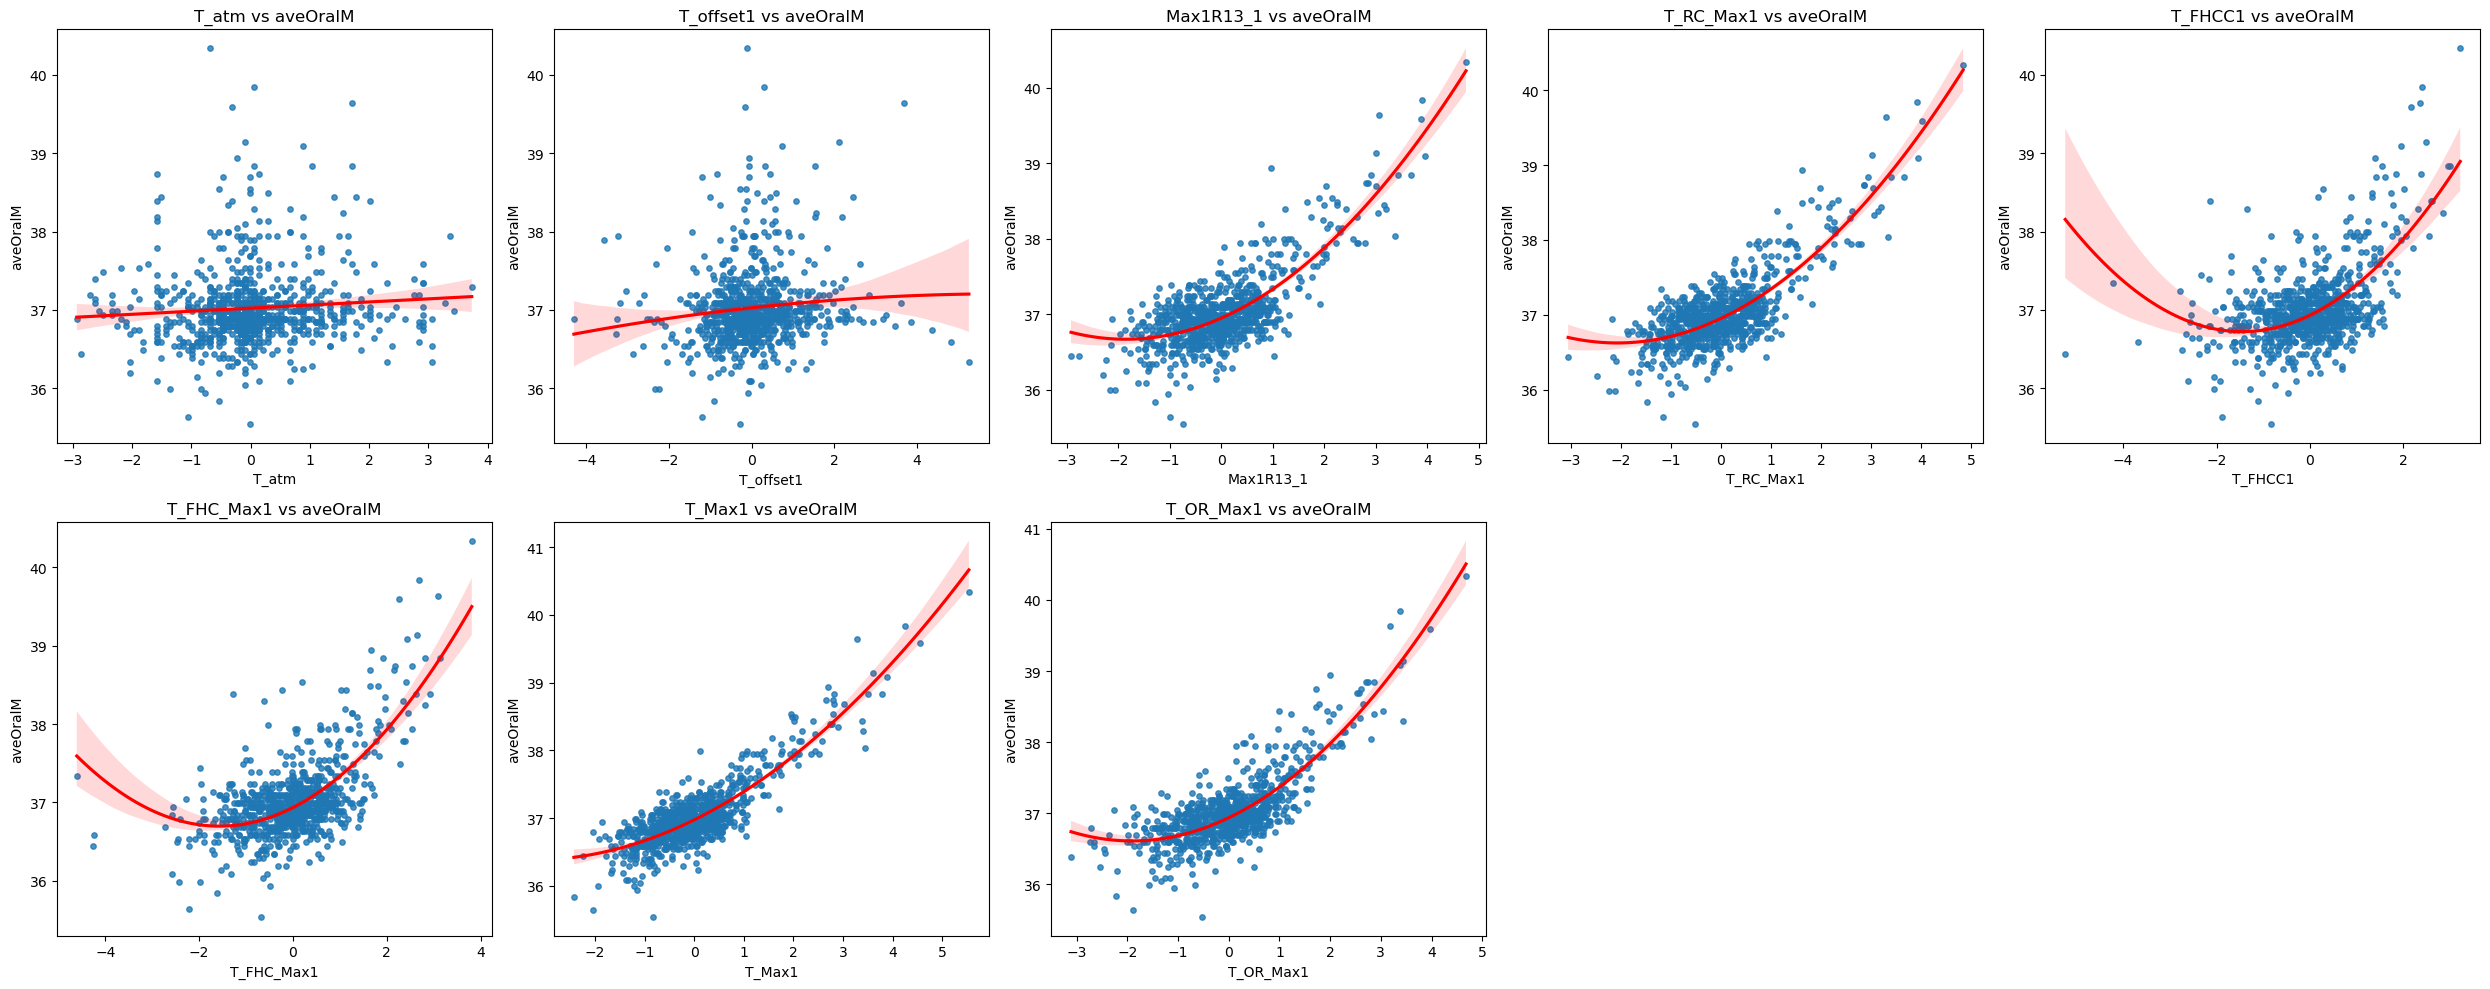

In [159]:

features = ['T_atm', 'T_offset1', 'Max1R13_1', 'T_RC_Max1', 'T_FHCC1', 'T_FHC_Max1', 'T_Max1', 'T_OR_Max1']

# Calculate the number of rows/columns for the subplot grid
n = len(features)
cols = 5  
rows = n // cols + (n % cols > 0)  


plt.figure(figsize=(5*cols, 5*rows))

# Plot the scatter plot for each feature
for i, feature in enumerate(features):
    plt.subplot(rows, cols, i+1)
    sns.regplot(x=back_select_m[feature], y=y_train_strat_m, order=2, line_kws={"color": "red"}, scatter_kws={"s": 15})
    plt.title(f'{feature} vs aveOralM')
    plt.xlabel(feature)
    plt.tight_layout()

plt.show()



In [160]:
# We choose our features for the same reason as first task.
Xm = X_train_strat_m[['Max1R13_1', 'T_RC_Max1', 'T_FHCC1', 'T_FHC_Max1', 'T_Max1', 'T_OR_Max1']]
ym = y_train_strat_m


poly_features_m = PolynomialFeatures(degree=2, include_bias=False)
X_poly_m = poly_features_m.fit_transform(Xm)


poly_reg_m = LinearRegression()
poly_reg_m.fit(X_poly_m, ym)


y_pred_m = poly_reg_m.predict(X_poly_m)
poly_rmse_m = np.sqrt(mean_squared_error(ym, y_pred_m))
print(round(poly_rmse_m, 2))

0.24


In [161]:
# Calculate negative MSE values with 5-fold cross-validation
poly_scores_m = cross_val_score(poly_reg_m, X_poly_m, ym, n_jobs=-1, scoring="neg_mean_squared_error", cv=10)

# Convert MSE values to positive and calculate RMSE
poly_rmse_scores_m = np.sqrt(-poly_scores_m)

# Print cross-validation results for the polynomial regression model
print("Scores:", np.round(poly_rmse_scores_m, 2))
print("Mean:", round(poly_rmse_scores_m.mean(), 2))
print("Standard deviation:", round(poly_rmse_scores_m.std(), 2))


Scores: [0.26 0.24 0.3  0.26 0.24 0.29 0.22 0.22 0.24 0.19]
Mean: 0.25
Standard deviation: 0.03


### • SGD for Polynomial Regression

In [162]:

poly_features_m = PolynomialFeatures(degree=2, include_bias=False)
X_poly_m = poly_features_m.fit_transform(Xm)


pipeline_m = make_pipeline(StandardScaler(), 
                         SGDRegressor(max_iter=1000, tol=1e-3, penalty=None))

pipeline_m.fit(X_poly_m, ym)

y_train_pred_m = pipeline_m.predict(X_poly_m)


rmse_train_sgd_poly_m = np.sqrt(mean_squared_error(ym, y_train_pred_m))

rmse_train_sgd_poly_m


0.24843226919217157

### 3.1.3 KNN Model

In [163]:
neigh_reg_m = KNeighborsRegressor(n_neighbors=1)
neigh_reg_m.fit(X_train_strat_m, y_train_strat_m)

KNeighborsRegressor(n_neighbors=1)

In [164]:
#mse is 0, model overfits
monitor_prediction_neigh = neigh_reg_m.predict(X_train_strat_m)
monitor_neigh_mse = mean_squared_error(y_train_strat_m, monitor_prediction_neigh)
monitor_neigh_rmse = np.sqrt(monitor_neigh_mse)
monitor_neigh_rmse

0.0

The optimal number of neighbors is: 14


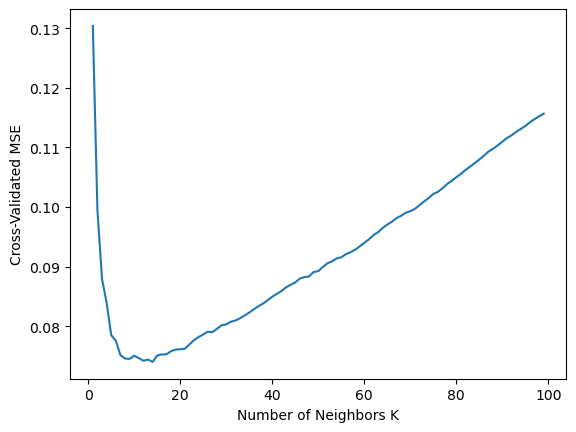

In [165]:
# Range of "k" values to try
k_valuesm = range(1, 100)

# Store the average cross-validated scores
avg_scoresm = []

# Loop over possible "k" values
for k in k_valuesm:
    modelm = KNeighborsRegressor(n_neighbors=k)
    # Perform cross-validation and compute the average MSE
    scoresm = cross_val_score(modelm, X_train_strat_m, y_train_strat_m, 
                             n_jobs=-1, scoring='neg_mean_squared_error', cv=10)
    avg_scoresm.append(np.mean(scoresm))

# Convert MSE scores to positive, as cross_val_score returns negative values for MSE to facilitate maximization
avg_scoresm = np.abs(avg_scoresm)

# Find the "k" value that minimizes the MSE
optimal_km = k_valuesm[np.argmin(avg_scoresm)]
print(f"The optimal number of neighbors is: {optimal_km}")



plt.plot(k_valuesm, avg_scoresm)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Cross-Validated MSE')
plt.show()

In [166]:

neigh_reg_opt_m = KNeighborsRegressor(n_neighbors=14)
neigh_reg_opt_m.fit(X_train_strat_m, y_train_strat_m)
monitor_prediction_neigh_opt = neigh_reg_opt_m.predict(X_train_strat_m)
monitor_neigh_mse_opt = mean_squared_error(y_train_strat_m, monitor_prediction_neigh_opt)
monitor_neigh_rmse_opt = np.sqrt(monitor_neigh_mse_opt)
print(round(monitor_neigh_rmse_opt, 2))

0.25


### 3.1.4 Decision Tree Model

In [167]:
tree_regm = DecisionTreeRegressor(random_state=42)
tree_regm.fit(X_train_strat_m, y_train_strat_m)

DecisionTreeRegressor(random_state=42)

In [168]:
monitor_prediction_tree = tree_regm.predict(X_train_strat_m)
monitor_tree_mse = mean_squared_error(y_train_strat_m, monitor_prediction_tree)
monitor_tree_rmse = np.sqrt(monitor_tree_mse)
print(round(monitor_tree_rmse, 2))

0.0


In [169]:
tree_reg2m = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_reg2m.fit(X_train_strat_m, y_train_strat_m)
monitor_prediction_tree2 = tree_reg2m.predict(X_train_strat_m)
monitor_tree_mse2 = mean_squared_error(y_train_strat_m, monitor_prediction_tree2)
monitor_tree_rmse2 = np.sqrt(monitor_tree_mse2)
print(round(monitor_tree_rmse2, 2))

0.22


In [170]:
# Calculating negative MSE values with 5-fold cross-validation
scores = cross_val_score(tree_reg2m, X_train_strat_m, y_train_strat_m,
                         n_jobs=-1, scoring="neg_mean_squared_error", cv=10)

# Converting MSE values to positive and calculate RMSE
tree_rmse_scores_m = np.sqrt(-scores)


print("Scores:", np.round(tree_rmse_scores_m, 2))
print("Mean:", round(tree_rmse_scores_m.mean(), 2))
print("Standard deviation:", round(tree_rmse_scores_m.std(), 2))


Scores: [0.26 0.26 0.29 0.25 0.28 0.33 0.25 0.25 0.23 0.24]
Mean: 0.27
Standard deviation: 0.03


### 3.1.5 Random Forest Regression Model

In [171]:
forest_regm = RandomForestRegressor(n_estimators=100, random_state=42)
forest_regm.fit(X_train_strat_m, y_train_strat_m)

RandomForestRegressor(random_state=42)

In [172]:
forest_predictionsm = forest_regm.predict(X_train_strat_m)
forest_mse_m = mean_squared_error(y_train_strat_m, forest_predictionsm)
forest_rmse_m = np.sqrt(forest_mse_m)
print(round(forest_rmse_m, 2))

0.09


In [174]:
# Calculating negative MSE values with 5-fold cross-validation
scores = cross_val_score(forest_regm, X_train_strat_m, y_train_strat_m,
                         n_jobs=-1, scoring="neg_mean_squared_error", cv=10)

# Converting MSE values to positive and calculate RMSE
forest_rmse_scoresm = np.sqrt(-scores)


print("Scores:", np.round(forest_rmse_scoresm, 2))
print("Mean:", round(forest_rmse_scoresm.mean(), 2))
print("Standard deviation:", round(forest_rmse_scoresm.std(), 2))


Scores: [0.24 0.25 0.29 0.24 0.26 0.3  0.22 0.24 0.23 0.21]
Mean: 0.25
Standard deviation: 0.03


### 3.1.6 XGBoost Model

In [175]:
xgb_regm = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_regm.fit(X_train_strat_m, y_train_strat_m)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [176]:
xgb_predictionsm = xgb_regm.predict(X_train_strat_m)
xgb_mse_m = mean_squared_error(y_train_strat_m, xgb_predictionsm)
xgb_rmse_m = np.sqrt(xgb_mse_m)
print(round(xgb_rmse_m, 2))

0.0


Overfitting!

In [177]:
xgb_reg2m = xgb.XGBRegressor(n_estimators=100, max_depth=3, random_state=42)
xgb_reg2m.fit(X_train_strat_m, y_train_strat_m)
xgb_predictions2m = xgb_reg2m.predict(X_train_strat_m)
xgb_mse2m = mean_squared_error(y_train_strat_m, xgb_predictions2m)
xgb_rmse2m = np.sqrt(xgb_mse2m)
print(round(xgb_rmse2m, 2))

0.09


In [178]:

scores = cross_val_score(xgb_reg2m, X_train_strat_m, y_train_strat_m,
                         n_jobs=-1, scoring="neg_mean_squared_error", cv=10)

xgb_rmse_scores_m = np.sqrt(-scores)


print("Scores:", np.round(xgb_rmse_scores_m, 2))
print("Mean:", round(xgb_rmse_scores_m.mean(), 2))
print("Standard deviation:", round(xgb_rmse_scores_m.std(), 2))

Scores: [0.25 0.25 0.3  0.24 0.25 0.29 0.25 0.25 0.3  0.22]
Mean: 0.26
Standard deviation: 0.03


### 3.1.7 MLP Model

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 884.3853 - val_loss: 85.7465
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - loss: 81.1570 - val_loss: 69.9703
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - loss: 61.0857 - val_loss: 55.3694
Epoch 4/20
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 54.3307

/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - loss: 54.7029 - val_loss: 46.6093
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - loss: 44.2425 - val_loss: 39.5730
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - loss: 38.5699 - val_loss: 33.8829
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - loss: 32.4466 - val_loss: 30.8375
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - loss: 30.1519 - val_loss: 26.5577
Epoch 9/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - loss: 25.7753 - val_loss: 23.7082
Epoch 10/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - loss: 21.8153 - val_loss: 20.7709
Epoch 11/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - loss: 19.6093 - val_loss: 18.2781
Epoch 12/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - loss: 16.7669 - val_loss: 15.8721
Epoch 13/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - loss: 15.8585 - val_loss: 14.0184
Epoch 14/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - loss: 12.6406 - val_loss: 13.1804
Epoch 15/20
23/23 ━━━━━━━━━━━━━━━━━━━━

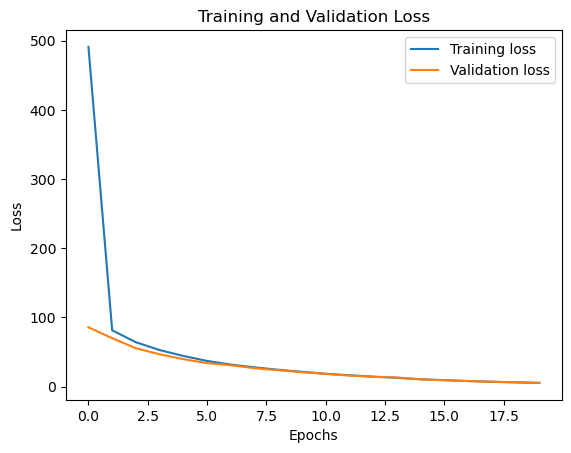

In [179]:
# Building the model
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train_strat_m.shape[1:]),
    keras.layers.Dense(1)
])

# Compiling the model
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=0.001))

# Fitting the model to the training data
history = model.fit(X_train_strat_m, y_train_strat_m, epochs=20, validation_split=0.1)

# Evaluating the model's performance on the training set
mse_train_mlp_m = model.evaluate(X_train_strat_m, y_train_strat_m)
rmse_train_mlp_m = np.sqrt(mse_train_mlp_m)
print(f"Train RMSE: {rmse_train_mlp_m:.4f}")



# Plotting the training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### • MLP Tune-1 (Early Stopping)

Restoring model weights from the end of the best epoch: 49.
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 194us/step - loss: 1.0700
Train RMSE: 0.9912


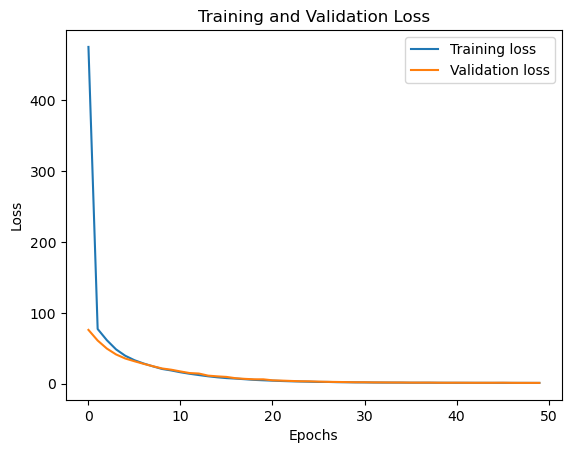

In [186]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train_strat_f.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=0.001))

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True, verbose=1)

history = model.fit(X_train_strat_m, y_train_strat_m, epochs=50, validation_split=0.1, callbacks=[early_stopping_cb], verbose=0)

mse_train_mlp_tune1_m = model.evaluate(X_train_strat_m, y_train_strat_m)
rmse_train_mlp_tune1_m = np.sqrt(mse_train_mlp_tune1_m)
print(f"Train RMSE: {rmse_train_mlp_tune1_m:.4f}")

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### • MLP Ktuner

In [189]:
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape=X_train_strat_m.shape[1:]))
   
    for i in range(hp.Int('num_layers', 1, 10)):
        model.add(keras.layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=16,
                                            max_value=512,
                                            step=32),
                                     activation='relu'))
   
    model.add(keras.layers.Dense(1))  
    
    lr = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),
                  loss='mean_squared_error',  
                  metrics=['mean_squared_error'])
    return model


tuner = kt.Hyperband(build_model,
                     objective='val_mean_squared_error', 
                     max_epochs=10,
                     directory='my_dir',
                     project_name='intro_to_kt')

# EarlyStopping Callback
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)


tuner.search(X_train_strat_m, y_train_strat_m,
             epochs=50,
             validation_split=0.2,
             callbacks=[stop_early])


best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train_strat_m, y_train_strat_m,
                    epochs=50,
                    validation_split=0.2)


final_mse_m = history.history['mean_squared_error'][-1]


final_rmse_m = np.sqrt(final_mse_m)
print(f"Final Training RMSE: {final_rmse_m:.4f}")


final_val_mse_m = history.history['val_mean_squared_error'][-1]


rmse_training_mlp_ktuner_m = np.sqrt(final_val_mse_m)
print(f"Final Validation RMSE: {rmse_training_mlp_ktuner_m:.4f}")


Reloading Tuner from my_dir/intro_to_kt/tuner0.json
Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3291.9221 - mean_squared_error: 3295.3635 - val_loss: 396.1228 - val_mean_squared_error: 321.8624
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 243.3462 - mean_squared_error: 243.6803 - val_loss: 80.8760 - val_mean_squared_error: 72.2437
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 47.2121 - mean_squared_error: 47.2533 - val_loss: 27.4637 - val_mean_squared_error: 31.3165
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 23.9227 - mean_squared_error: 23.8990 - val_loss: 17.1448 - val_mean_squared_error: 18.6585
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.2046 - mean_squared_error: 15.2153 - val_loss: 14.1165 - val_mean_squared_error: 14.8969
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.2917 - mean_squared_error: 10.2905 - val_loss: 7.4465 - val_mean_squared_error: 7.8485
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4

### 3.1.8 Detection the Best Model

In [190]:
rmse_values_monitor_mode = {
    "Model for Monitor Mode": ["Linear Regression", "SGD Linear Regression", "Polynomial Regression", "SGD Polynomial Regression", "KNN", "Decision Tree", "Random Forest", "XGBoost", "MLP", "MLP RMSE Tune1", "MLP Ktuner"],
    "RMSE for Monitor Mode": [
        lin_rmse_m,  # Linear Regression RMSE
        rmse_train_sgd_lin_m, # SGD Linear Regression
        poly_rmse_m,  # Polynomial Regression RMSE
        rmse_train_sgd_poly_m, # SGD Polynomial Regression
        monitor_neigh_rmse_opt,  # KNN RMSE
        monitor_tree_rmse2,  # Decision Tree RMSE
        forest_rmse_m,  # Random Forest RMSE
        xgb_rmse2m,  # XGBoost RMSE
        rmse_train_mlp_m,  # MLP RMSE 
        rmse_train_mlp_tune1_m, # MLP RMSE Tune1
        rmse_training_mlp_ktuner_m # MLP RMSE Ktuner
    ]
}

rmse_df_m = pd.DataFrame(rmse_values_monitor_mode)
rmse_df_m


Model for Monitor Mode  RMSE for Monitor Mode
0           Linear Regression               0.249192
1       SGD Linear Regression               0.259848
2       Polynomial Regression               0.236767
3   SGD Polynomial Regression               0.248432
4                         KNN               0.251602
5               Decision Tree               0.222726
6               Random Forest               0.092524
7                     XGBoost               0.089089
8                         MLP               2.204804
9              MLP RMSE Tune1               0.991185
10                 MLP Ktuner               1.670050

Based on the RMSE scores, XGBoost is our best model

### • Grid Search (XGBoost)

In [191]:

param_gridm = {
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1]
}


xgb_regm = XGBRegressor(random_state=42)


grid_searchm = GridSearchCV(estimator=xgb_regm, param_grid=param_gridm, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)


grid_searchm.fit(X_train_strat_m, y_train_strat_m)


best_params_m = grid_searchm.best_params_
best_score_m = np.sqrt(-grid_searchm.best_score_)


best_modelm = grid_searchm.best_estimator_
predictionsm = best_modelm.predict(X_train_strat_m)
rmse_m = np.sqrt(mean_squared_error(y_train_strat_m, predictionsm))

(best_params_m, best_score_m, rmse_m)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


({'colsample_bytree': 1,
  'learning_rate': 0.1,
  'max_depth': 3,
  'n_estimators': 100,
  'subsample': 0.8},
 0.250245376918549,
 0.15824564971879648)

### • Randomized Search (XGBoost)

In [192]:

param_distribsm = {
    'max_depth': randint(low=3, high=10),
    'learning_rate': uniform(0.01, 0.2),
    'n_estimators': randint(100, 500),
    'subsample': uniform(0.8, 0.2),
    'colsample_bytree': uniform(0.7, 0.3)
}


xgb_regm = XGBRegressor(random_state=42)


random_searchm = RandomizedSearchCV(estimator=xgb_reg, param_distributions=param_distribsm,
                                   n_iter=10, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1, random_state=42)


random_searchm.fit(X_train_strat_m, y_train_strat_m)


best_params_random_m = random_searchm.best_params_
best_score_random_m = np.sqrt(-random_searchm.best_score_)


best_model_random_m = random_searchm.best_estimator_
predictions_random_m = best_model_random_m.predict(X_train_strat_m)
rmse_random_m = np.sqrt(mean_squared_error(y_train_strat_m, predictions_random_m))

(best_params_random_m, best_score_random_m, rmse_random_m)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


({'colsample_bytree': 0.8199582915145766,
  'learning_rate': 0.019333132642723086,
  'max_depth': 6,
  'n_estimators': 370,
  'subsample': 0.8912139968434072},
 0.2550080027834751,
 0.07700352439087614)

Since our randomized search rmse score is the lowest score, we will build our final model with this result.

### 3.1.9 Feautre Importances and Evaluation the Best Model

In [193]:
feature_importances_m = random_searchm.best_estimator_.feature_importances_
feature_importances_m



array([0.00606639, 0.00275305, 0.00588094, 0.00707824, 0.0080252 ,
       0.00590338, 0.00803761, 0.00842199, 0.01139873, 0.00752473,
       0.00918089, 0.01139175, 0.00955596, 0.0871766 , 0.02223235,
       0.01089795, 0.00893348, 0.00896045, 0.01163195, 0.00881123,
       0.0108473 , 0.13459536, 0.0742287 , 0.00746298, 0.0079839 ,
       0.00697654, 0.00890651, 0.00939939, 0.01937118, 0.00950322,
       0.3640671 , 0.03584825, 0.05094671], dtype=float32)

In [194]:
print(X_train_strat_m.columns)

Index(['Gender', 'Age', 'Ethnicity', 'T_atm', 'Humidity', 'Distance',
       'T_offset1', 'Max1R13_1', 'Max1L13_1', 'aveAllR13_1', 'aveAllL13_1',
       'T_RC1', 'T_RC_Dry1', 'T_RC_Wet1', 'T_RC_Max1', 'T_LC1', 'T_LC_Dry1',
       'T_LC_Wet1', 'T_LC_Max1', 'RCC1', 'LCC1', 'canthiMax1', 'canthi4Max1',
       'T_FHCC1', 'T_FHRC1', 'T_FHLC1', 'T_FHBC1', 'T_FHTC1', 'T_FH_Max1',
       'T_FHC_Max1', 'T_Max1', 'T_OR1', 'T_OR_Max1'],
      dtype='object')


In [195]:

best_estimator_m = random_searchm.best_estimator_

feature_importances_m = best_estimator_m.feature_importances_
featuresm = X_train_strat_m.columns
importancesm = zip(featuresm, feature_importances_m)
sorted_importancesm = sorted(importancesm, key=lambda x: x[1], reverse=True)

for feature, importancem in sorted_importancesm:
    print(f"{feature}: {importancem}")

T_Max1: 0.36406710743904114
canthiMax1: 0.1345953643321991
T_RC_Wet1: 0.0871765986084938
canthi4Max1: 0.07422870397567749
T_OR_Max1: 0.05094670504331589
T_OR1: 0.03584824502468109
T_RC_Max1: 0.02223234623670578
T_FH_Max1: 0.01937117800116539
T_LC_Max1: 0.011631947942078114
Max1L13_1: 0.011398731730878353
T_RC1: 0.011391745880246162
T_LC1: 0.01089794747531414
LCC1: 0.0108473040163517
T_RC_Dry1: 0.009555964730679989
T_FHC_Max1: 0.00950322113931179
T_FHTC1: 0.00939938984811306
aveAllL13_1: 0.0091808857396245
T_LC_Wet1: 0.008960448205471039
T_LC_Dry1: 0.008933480829000473
T_FHBC1: 0.008906514383852482
RCC1: 0.008811233565211296
Max1R13_1: 0.008421985432505608
T_offset1: 0.00803761463612318
Humidity: 0.008025196380913258
T_FHRC1: 0.007983897812664509
aveAllR13_1: 0.007524730172008276
T_FHCC1: 0.0074629755690693855
T_atm: 0.0070782434195280075
T_FHLC1: 0.0069765448570251465
Gender: 0.006066393572837114
Distance: 0.005903380922973156
Ethnicity: 0.005880936048924923
Age: 0.0027530465740710497


### • Evaluate the Best Model on the Test Set

In [196]:
final_model_m = random_searchm.best_estimator_
test_predictions_m = final_model_m.predict(X_test_strat_m)

test_mse_m = mean_squared_error(y_test_strat_m, test_predictions_m)
test_rmse_m = np.sqrt(test_mse_m)

test_rmse_m 

0.2505383248514387

In [197]:
sample_data_final_m = X_test_strat_m.iloc[:20]
sample_labels_final_m = y_test_strat_m.iloc[:20]



predictions_sample_m = final_model_m.predict(sample_data_final_m)
sample_comparison_df_m = pd.DataFrame({"Actual": sample_labels_final_m, "Predicted": predictions_sample_m})

sample_comparison_df_m

Actual  Predicted
780   36.69  36.754677
556   36.99  36.812763
625   36.19  36.635460
920   36.59  36.729046
535   37.09  36.988167
177   36.24  36.229069
314   37.74  37.987789
593   36.79  36.963428
762   36.49  36.753952
526   36.79  36.952606
28    37.14  37.023026
515   36.79  36.919239
962   36.39  36.889660
947   36.59  36.849934
747   37.74  37.747120
706   37.14  37.021168
313   36.99  36.946854
219   37.09  36.851933
781   36.74  36.827522
868   36.49  36.884857

## 3.3 Classification Task ('Fever_aveOralF')

## Preparation for ML Algorithms

In [198]:
data_F_clf

Gender  Age  Ethnicity  T_atm  Humidity  Distance  T_offset1  Max1R13_1  \
0          2    5          1   24.0      28.0       0.8     0.7025    35.0300   
1          1    4          3   24.0      26.0       0.8     0.7800    34.5500   
2          1    3          1   24.0      26.0       0.8     0.8625    35.6525   
3          1    3          3   24.0      27.0       0.8     0.9300    35.2225   
4          2    1          1   24.0      27.0       0.8     0.8950    35.5450   
...      ...  ...        ...    ...       ...       ...        ...        ...   
1015       1    2          2   25.7      50.8       0.6     1.2225    35.6425   
1016       1    2          1   25.7      50.8       0.6     1.4675    35.9825   
1017       1    1          3   28.0      24.3       0.6     0.1300    36.4075   
1018       2    3          4   25.0      39.8       0.6     1.2450    35.8150   
1019       1    1          1   23.8      45.6       0.6     0.8675    35.7075   

      Max1L13_1  aveAllR13_1  ...  T_FHTC1  T_FH_Max1  T_FHC_Max1   T_Max1  \
0       35.3775      34.4000  ...  33.0025    34.5300     34.0075  35.6925   
1       34.5200      33.9300  ...  34.0025    34.6825     34.6600  35.1750   
2       35.5175      34.2775  ...  34.6700    35.3450     35.2225  35.9125   
3       35.6125      34.3850  ...  34.9175    35.6025     35.3150  35.7200   
4       35.6650      34.9100  ...  33.8275    35.4175     35.3725  35.8950   
...         ...          ...  ...      ...        ...         ...      ...   
1015    35.6525      34.8575  ...  35.2750    35.8525     35.7475  36.0675   
1016    35.7575      35.4275  ...  35.0700    35.7650     35.5525  36.5000   
1017    36.3400      35.8700  ...  35.3425    36.3750     35.7100  36.5350   
1018    35.5250      34.2950  ...  34.5950    35.4150     35.3100  35.8600   
1019    35.5825      34.8875  ...  34.7100    35.1525     35.1175  35.9725   

        T_OR1  T_OR_Max1  aveOralF  aveOralM  Fever_aveOralF  Fever_aveOralM  
0     35.6350    35.6525     36.85     36.59               0               0  
1     35.0925    35.1075     37.00     37.19               0               0  
2     35.8600    35.8850     37.20     37.34               0               0  
3     34.9650    34.9825     36.85     37.09               0               0  
4     35.5875    35.6175     36.80     37.04               0               0  
...       ...        ...       ...       ...             ...             ...  
1015  35.6775    35.7100     36.95     36.99               0               0  
1016  36.4525    36.4900     37.25     37.19               0               0  
1017  35.9650    35.9975     37.35     37.59               0               1  
1018  35.4150    35.4350     37.15     37.29               0               0  
1019  35.8900    35.9175     37.05     37.19               0               0  

[1020 rows x 37 columns]

### • Standartisation

In [199]:
# List of columns to exclude from standardization
columns_to_exclude = ['aveOralF', 'aveOralM','Fever_aveOralM', 'Fever_aveOralF','Age', 'Gender', 'Ethnicity']

# Selecting the columns that need to be standardized
columns_to_scale = [col for col in data_F_clf.columns if col not in columns_to_exclude]

# Instantiating the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
data_F_clf[columns_to_scale] = scaler.fit_transform(data_F_clf[columns_to_scale])

data_F_clf.head()  


Gender  Age  Ethnicity     T_atm  Humidity  Distance  T_offset1  Max1R13_1  \
0       2    5          1 -0.086392 -0.055341  2.178928  -0.734385  -0.985950   
1       1    4          3 -0.086392 -0.208419  2.178928  -0.520538  -1.821305   
2       1    3          1 -0.086392 -0.208419  2.178928  -0.292895   0.097401   
3       1    3          3 -0.086392 -0.131880  2.178928  -0.106642  -0.650938   
4       2    1          1 -0.086392 -0.131880  2.178928  -0.203217  -0.089684   

   Max1L13_1  aveAllR13_1  ...   T_FHTC1  T_FH_Max1  T_FHC_Max1    T_Max1  \
0  -0.425802    -0.680080  ... -2.162224  -1.703974   -1.887314 -0.798009   
1  -1.986339    -1.334438  ... -0.789203  -1.412510   -0.754033 -1.850738   
2  -0.171020    -0.850631  ...  0.127288  -0.146314    0.222933 -0.350472   
3   0.001867    -0.700964  ...  0.467111   0.345830    0.383589 -0.742067   
4   0.097411     0.029969  ... -1.029482  -0.007750    0.483457 -0.386072   

      T_OR1  T_OR_Max1  aveOralF  aveOralM  Fever_aveOralF  Fever_aveOralM  
0 -0.305051  -0.332313     36.85     36.59               0               0  
1 -1.275562  -1.307195     37.00     37.19               0               0  
2  0.097465   0.083577     37.20     37.34               0               0  
3 -1.503654  -1.530792     36.85     37.09               0               0  
4 -0.390027  -0.394920     36.80     37.04               0               0  

[5 rows x 37 columns]

### • Splitting

In [200]:

X = data_F_clf.drop(['aveOralF','Fever_aveOralM', 'Fever_aveOralF', 'aveOralM'], axis=1) 
y = data_F_clf['Fever_aveOralF']  

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in strat_split.split(X, data_F_clf['Fever_aveOralF']):
    X_train_clf_f = X.loc[train_index]
    y_train_clf_f = y[train_index]
    X_test_clf_f = X.loc[test_index]
    y_test_clf_f = y[test_index]
    

In [201]:
X_train_clf_f

Gender  Age  Ethnicity     T_atm  Humidity  Distance  T_offset1  \
287       2    1          3  0.362817  0.480433  1.587128  -0.382573   
889       1    1          3 -0.086392 -0.836040 -0.780074  -0.327386   
354       1    2          1 -2.182699  1.169285 -0.188274  -4.300795   
541       2    2          2 -0.385864 -0.660000 -0.780074   0.107205   
390       1    2          1 -2.631907  2.179601  0.107626  -0.479149   
..      ...  ...        ...       ...       ...       ...        ...   
244       2    3          1  0.437685  2.233178  1.143277   0.252069   
164       1    1          1 -0.760205 -0.828386  0.699427   0.355543   
286       1    1          1  0.138212  0.518702  0.551477  -0.348081   
696       1    6          3 -0.086392 -0.660000 -0.780074   0.107205   
163       2    1          1 -0.760205 -0.851347  1.291228   0.045121   

     Max1R13_1  Max1L13_1  aveAllR13_1  ...   T_FHCC1   T_FHRC1   T_FHLC1  \
287   0.406309   0.679769     0.579908  ... -0.039226  0.339597  0.696062   
889   0.049542   0.616073     0.291016  ...  0.012847  0.104200  0.478616   
354  -1.534152  -1.285690    -0.951569  ... -1.567945 -1.737878 -1.489450   
541  -0.650938  -0.434901    -0.046605  ...  0.488944  0.724453  0.404906   
390   0.606446   0.324894     1.001064  ... -0.247519 -0.090096  0.032669   
..         ...        ...          ...  ...       ...       ...       ...   
244   0.201821   0.502331     0.778304  ...  0.607969  0.283550 -0.048413   
164   0.367151  -0.089126     0.726095  ... -0.106177 -0.291866 -0.173720   
286  -0.433397  -0.489497    -0.258924  ... -1.571665 -1.831289 -1.371514   
696  -0.968547  -0.867120    -1.414493  ... -2.200262 -2.178781 -1.622129   
163  -0.037474   0.142907     0.169194  ... -0.258677 -1.308184  0.040040   

      T_FHBC1   T_FHTC1  T_FH_Max1  T_FHC_Max1    T_Max1     T_OR1  T_OR_Max1  
287 -0.247404  0.175344  -0.074643    0.257669  0.239462 -0.206658  -0.202627  
889 -0.153805 -0.006581   0.852308    0.136091 -0.030077  0.249526   0.280342  
354 -1.550312 -1.434523  -2.177006   -1.561659 -1.332002 -1.020635  -1.025463  
541  0.302962  0.703957   0.212043    0.674508 -0.950579 -1.342648  -1.347443  
390 -0.101389 -0.281185  -0.270545   -0.028907  0.671742  1.027724   1.031628  
..        ...       ...        ...         ...       ...       ...        ...  
244  0.456466  0.676496  -0.227542    0.279380  0.076722  0.303195   0.302702  
164  0.014675  0.055205   0.379276   -0.376273  0.086893  0.343447   0.329534  
286 -1.007434 -1.764048  -1.106712   -0.758375  1.058251  1.372098   1.371495  
696 -2.377734 -2.196549  -1.942879   -2.473494 -1.372687 -2.424968  -2.460955  
163 -0.385932  0.147884  -0.533340   -0.146143 -0.238588  0.209275   0.199847  

[816 rows x 33 columns]

In [202]:
X_test_clf_f

Gender  Age  Ethnicity     T_atm  Humidity  Distance  T_offset1  \
52        1    1          1 -0.310996  0.380932 -0.780074  -1.527687   
253       1    2          1 -0.385864  0.143661  1.439178  -0.444657   
252       1    2          4 -0.310996  0.197238  1.439178  -0.115839   
13        1    1          1 -0.835073 -1.126888  2.178928  -1.479399   
891       1    1          4  0.063344 -0.851347 -0.780074   0.148595   
..      ...  ...        ...       ...       ...       ...        ...   
872       1    1          1 -0.086392 -0.116572 -0.780074  -0.141133   
817       2    3          1  0.287949 -0.307920  0.699427   0.396933   
915       1    1          1 -0.086392 -1.088619 -0.780074  -0.527437   
776       1    1          1 -0.086392 -0.070649  0.699427   0.514204   
493       1    1          1  0.961761  0.579934 -0.780074   0.900507   

     Max1R13_1  Max1L13_1  aveAllR13_1  ...   T_FHCC1   T_FHRC1   T_FHLC1  \
52    0.075647   0.329444     0.374551  ...  0.046323  0.089254  0.235372   
253   0.245329   0.097411     0.520737  ...  0.076079  0.616096  0.183775   
252  -0.620482  -0.645702    -0.164947  ...  0.088477 -0.843617 -0.435392   
13   -0.381188   0.129258    -0.502568  ... -0.355385 -0.019104 -0.048413   
891  -1.394926  -0.757928    -2.183712  ... -0.463251 -0.699140 -0.571756   
..         ...        ...          ...  ...       ...       ...       ...   
872  -0.281119   0.529629    -0.516490  ... -0.121056  0.694561 -0.173720   
817  -0.846724  -0.234715    -1.640734  ...  0.012847  0.010788  0.172718   
915   0.684760   0.001867     0.865320  ...  0.276932  0.249922  0.298026   
776  -0.903285  -1.212895    -0.676599  ... -0.299592 -0.658039 -0.792887   
493  -0.607430  -0.748828    -0.077931  ... -1.865506 -2.111524 -1.537362   

      T_FHBC1   T_FHTC1  T_FH_Max1  T_FHC_Max1    T_Max1     T_OR1  T_OR_Max1  
52   0.156947  0.491139  -0.456891   -0.046276  0.275062  0.665459   0.638097  
253  0.722289  0.487706   0.216821    0.305432 -0.152132  0.262943   0.240095  
252 -0.106381  0.072367  -0.805692   -0.400878 -0.586107 -0.069505  -0.074431  
13  -0.326028 -0.312078   0.226377    0.079644  0.153006  0.388171   0.387669  
891 -0.794027  0.110125   0.063922   -0.528246 -0.681039 -1.150335  -1.146206  
..        ...       ...        ...         ...       ...       ...        ...  
872  0.044627 -0.085530   0.909645    0.170828  0.214034  0.016961   0.025442  
817 -0.206220  0.165046   0.016141   -0.111407 -1.026863 -0.747819  -0.761619  
915  0.336658  0.336674  -0.050752    0.340169  0.366604  0.737018   0.718592  
776 -0.022765  0.134153  -0.380441   -0.419694 -0.030077  0.406060   0.414500  
493 -1.647656 -1.437955  -2.855496   -2.286784 -0.558984 -0.009873  -0.050581  

[204 rows x 33 columns]

In [203]:
y_test_clf_f.value_counts()

Fever_aveOralF
0    192
1     12
Name: count, dtype: int64

In [204]:
y_train_clf_f.value_counts()

Fever_aveOralF
0    770
1     46
Name: count, dtype: int64

We applied both standardization and stratify splitting using our 'data_F_clf' dataset that we copied for the classification task.

### 3.3.1 Logistic Regression

In [205]:
logistic_reg_model = LogisticRegression()
logistic_reg_model.fit(X_train_clf_f, y_train_clf_f)

LogisticRegression()

In [206]:


predictions=logistic_reg_model.predict(X_train_clf_f)

accuracy = accuracy_score(y_train_clf_f, predictions)
f1 = f1_score(y_train_clf_f, predictions)
recall = recall_score(y_train_clf_f, predictions)
precision = precision_score(y_train_clf_f, predictions)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

Accuracy: 0.9754901960784313
F1 Score: 0.761904761904762
Recall: 0.6956521739130435
Precision: 0.8421052631578947


In [208]:


scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score)
}


cv_results = cross_validate(logistic_reg_model, X_train_clf_f, y_train_clf_f, cv=3, n_jobs=-1, scoring=scoring)

for score in scoring:
    print(f"{score} mean: {cv_results['test_' + score].mean()}, std: {cv_results['test_' + score].std()}")


accuracy mean: 0.9730392156862745, std: 0.011364728548401608
f1 mean: 0.7328042328042329, std: 0.11079572270567159
recall mean: 0.6541666666666667, std: 0.10424996669330673
precision mean: 0.8368298368298368, std: 0.1263050553300146


CV results above they are similar to our model's result

In [209]:

y_train_pred = cross_val_predict(logistic_reg_model, X_train_clf_f, y_train_clf_f, cv=4, n_jobs=-1)

In [210]:

confusion_matrix(y_train_clf_f, y_train_pred)

array([[760,  10],
       [ 16,  30]])

In [211]:
accuracy=accuracy_score(y_train_clf_f, y_train_pred)
recall= recall_score(y_train_clf_f, y_train_pred)
precision= precision_score(y_train_clf_f, y_train_pred)
f1= f1_score(y_train_clf_f, y_train_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

Accuracy: 0.9681372549019608
F1 Score: 0.6976744186046512
Recall: 0.6521739130434783
Precision: 0.75


In [212]:
y_score_log = cross_val_predict(logistic_reg_model, X_train_clf_f, y_train_clf_f, method="decision_function", cv=3, n_jobs=-1)

In [213]:

precisions_log, recalls_log, thresholds_log = precision_recall_curve(y_train_clf_f, y_score_log)

In [214]:
eps= 0.00001
f1_log=2/(1/(precisions_log+eps)+1/(recalls_log+eps))


In [215]:
ind_log= np.argmax(f1_log)
ind_log

780

In [216]:
f1_log= f1_log[ind_log]
recall_log=recalls_log[ind_log]
precision_log= precisions_log[ind_log]
threshold_log=thresholds_log[ind_log]

print("Threshold_log:", threshold_log)
print("F1 Score_log:", f1_log)
print("Recall_log:", recall_log)
print("Precision_log:", precision_log)

Threshold_log: 0.0690696767409893
F1 Score_log: 0.7317174657921678
Recall_log: 0.6521739130434783
Precision_log: 0.8333333333333334


In [217]:

fpr_log, tpr_log, thresholds_log = roc_curve(y_train_clf_f, y_score_log)

In [218]:

roc_auc_score(y_train_clf_f, y_score_log)

0.9606719367588933

In [219]:
dist_log2 = np.sqrt((0-fpr_log)**2 + (1-tpr_log)**2)
dist_log2

array([1.        , 0.97826087, 0.73913043, 0.73913158, 0.65217521,
       0.65217909, 0.63044013, 0.63044682, 0.58696945, 0.58697951,
       0.50002699, 0.50004216, 0.45656792, 0.45658824, 0.34791336,
       0.34802242, 0.32629637, 0.32634547, 0.30462479, 0.30474657,
       0.28303807, 0.28319296, 0.26150241, 0.26229131, 0.24068063,
       0.24083125, 0.21926082, 0.21980246, 0.19832779, 0.1997514 ,
       0.15740949, 0.16596328, 0.14628788, 0.14688045, 0.12796632,
       0.13078227, 0.1133609 , 0.16282615, 0.15232934, 0.24019229,
       0.235222  , 0.30184901, 0.29949133, 0.61986184, 0.61948052,
       1.        ])

In [220]:
ind_log2 = np.argmin(dist_log2)
ind_log2

36

In [222]:
dist_log2[ind_log2], fpr_log[ind_log2], tpr_log[ind_log2], thresholds_log[ind_log2]

(0.11336089657070898,
 0.07272727272727272,
 0.9130434782608695,
 -2.9132740620021966)

We calculated our best indices with the Euclidean formula and achieved the best possible recall and precision scores.

## 3.3.2 SVM (Support Vector Machine)

In [223]:
svm_clf = SVC(probability=True)
svm_clf.fit(X_train_clf_f, y_train_clf_f)


SVC(probability=True)

In [224]:
predictions_svm=svm_clf.predict(X_train_clf_f)

accuracy = accuracy_score(y_train_clf_f, predictions_svm)
f1 = f1_score(y_train_clf_f, predictions_svm)
recall = recall_score(y_train_clf_f, predictions_svm)
precision = precision_score(y_train_clf_f, predictions_svm)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

Accuracy: 0.9730392156862745
F1 Score: 0.7317073170731708
Recall: 0.6521739130434783
Precision: 0.8333333333333334


In [225]:

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score)
}


cv_results = cross_validate(svm_clf, X_train_clf_f, y_train_clf_f, cv=4, n_jobs=-1, scoring=scoring)

for score in scoring:
    print(f"{score} mean: {cv_results['test_' + score].mean()}, std: {cv_results['test_' + score].std()}")

accuracy mean: 0.9656862745098039, std: 0.006003651330350905
f1 mean: 0.6392105263157896, std: 0.0961455930828453
recall mean: 0.5662878787878788, std: 0.1652292526245429
precision mean: 0.7982142857142858, std: 0.1295966072559189


In [226]:
y_train_pred_svm = cross_val_predict(svm_clf, X_train_clf_f, y_train_clf_f, cv=4, n_jobs=-1)

In [227]:
confusion_matrix(y_train_clf_f, y_train_pred_svm)

array([[762,   8],
       [ 20,  26]])

In [228]:
accuracy=accuracy_score(y_train_clf_f, y_train_pred_svm)
recall= recall_score(y_train_clf_f, y_train_pred_svm)
precision= precision_score(y_train_clf_f, y_train_pred_svm)
f1= f1_score(y_train_clf_f, y_train_pred_svm)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

Accuracy: 0.9656862745098039
F1 Score: 0.65
Recall: 0.5652173913043478
Precision: 0.7647058823529411


In [229]:
y_score_svm= cross_val_predict(svm_clf, X_train_clf_f, y_train_clf_f, method="predict_proba", cv=3, n_jobs=-1)
y_scores_pos_svm_class = y_score_svm[:, 1]

In [230]:
precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train_clf_f, y_scores_pos_svm_class)

In [231]:
eps= 0.00001
f1_svm=2/(1/(precisions_svm+eps)+1/(recalls_svm+eps))
ind_svm= np.argmax(f1_svm)
ind_svm

767

In [232]:
f1_svm= f1_svm[ind_svm]
recall_svm=recalls_svm[ind_svm]
precision_svm= precisions_svm[ind_svm]
threshold_svm=thresholds_svm[ind_svm]

print("Threshold_svm:", threshold_svm)
print("F1 Score_svm:", f1_svm)
print("Recall_svm:", recall_svm)
print("Precision_svm:", precision_svm)

Threshold_svm: 0.17323483529203756
F1 Score_svm: 0.6947468520774188
Recall_svm: 0.717391304347826
Precision_svm: 0.673469387755102


In [233]:
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_train_clf_f, y_scores_pos_svm_class)

In [234]:
roc_auc_score(y_train_clf_f, y_scores_pos_svm_class)


0.9295031055900621

In [235]:
dist_svm2 = np.sqrt((0-fpr_svm)**2 + (1-tpr_svm)**2)
dist_svm2


array([1.        , 0.97826087, 0.95652174, 0.95652262, 0.93478351,
       0.93479073, 0.89131286, 0.89131949, 0.8043646 , 0.80437404,
       0.52177954, 0.52179732, 0.45658824, 0.45661225, 0.43487764,
       0.43497653, 0.3915198 , 0.39161456, 0.36989367, 0.37007829,
       0.34837118, 0.34844621, 0.28337158, 0.2839216 , 0.26229131,
       0.26321565, 0.24168764, 0.2424958 , 0.17851217, 0.19745686,
       0.17860673, 0.21968302, 0.20522417, 0.23986329, 0.22877044,
       0.29600409, 0.28873017, 0.35875005, 0.3541094 , 0.40656359,
       0.40364713, 0.60545922, 0.60428726, 0.70812598, 0.70779221,
       1.        ])

In [236]:
ind_svm2 = np.argmin(dist_svm2)
ind_svm2

28

In [237]:
dist_svm2[ind_svm2], fpr_svm[ind_svm2], tpr_svm[ind_svm2], thresholds_svm[ind_svm2]

(0.17851216590936655,
 0.04025974025974026,
 0.8260869565217391,
 0.0651624638395778)

### 3.3.3 Decision Tree

In [238]:
decision_tree_clf = DecisionTreeClassifier(max_depth=3)
decision_tree_clf.fit(X_train_clf_f, y_train_clf_f)

DecisionTreeClassifier(max_depth=3)

In [239]:
predictions_dt=decision_tree_clf.predict(X_train_clf_f)

accuracy = accuracy_score(y_train_clf_f, predictions_dt)
f1 = f1_score(y_train_clf_f, predictions_dt)
recall = recall_score(y_train_clf_f, predictions_dt)
precision = precision_score(y_train_clf_f, predictions_dt)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

Accuracy: 0.9791666666666666
F1 Score: 0.8131868131868132
Recall: 0.8043478260869565
Precision: 0.8222222222222222


In [241]:
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score)
}

cv_results = cross_validate(decision_tree_clf, X_train_clf_f, y_train_clf_f, cv=4, n_jobs=-1, scoring=scoring)


for score in scoring:
    print(f"{score} mean: {cv_results['test_' + score].mean()}, std: {cv_results['test_' + score].std()}")

accuracy mean: 0.9607843137254902, std: 0.007750680539628388
f1 mean: 0.6101470588235295, std: 0.09415117611511849
recall mean: 0.571969696969697, std: 0.17811087796225378
precision mean: 0.7453296703296703, std: 0.17402648119602057


In [242]:
y_train_pred_dt = cross_val_predict(decision_tree_clf, X_train_clf_f, y_train_clf_f, cv=4, n_jobs=-1)

In [243]:
confusion_matrix(y_train_clf_f, y_train_pred_dt)

array([[758,  12],
       [ 20,  26]])

In [244]:
accuracy=accuracy_score(y_train_clf_f, y_train_pred_dt)
recall= recall_score(y_train_clf_f, y_train_pred_dt)
precision= precision_score(y_train_clf_f, y_train_pred_dt)
f1= f1_score(y_train_clf_f, y_train_pred_dt)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)


Accuracy: 0.9607843137254902
F1 Score: 0.6190476190476191
Recall: 0.5652173913043478
Precision: 0.6842105263157895


In [245]:
y_score_dt = cross_val_predict(decision_tree_clf, X_train_clf_f, y_train_clf_f, method="predict_proba", cv=3, n_jobs=-1)
y_score_pos_dt_class = y_score_dt[:, 1]

In [246]:
precisions_dt, recalls_dt, thresholds_dt = precision_recall_curve(y_train_clf_f, y_score_pos_dt_class)


In [247]:
eps= 0.00001
f1_dt=2/(1/(precisions_dt+eps)+1/(recalls_dt+eps))
ind_dt= np.argmax(f1_dt)
ind_dt

4

In [248]:
f1_dt= f1_dt[ind_dt]
recall_dt=recalls_dt[ind_dt]
precision_dt= precisions_dt[ind_dt]
threshold_dt=thresholds_dt[ind_dt]

print("Threshold_dt:", threshold_dt)
print("F1 Score_dt:", f1_dt)
print("Recall_dt:", recall_dt)
print("Precision_dt:", precision_dt)

Threshold_dt: 0.5
F1 Score_dt: 0.6363736570244694
Recall_dt: 0.6086956521739131
Precision_dt: 0.6666666666666666


In [249]:
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_train_clf_f, y_score_pos_dt_class)


In [250]:
roc_auc_score(y_train_clf_f, y_score_pos_dt_class)


0.812224731789949

In [251]:
dist_dt = np.sqrt((0-fpr_dt)**2 + (1-tpr_dt)**2)
dist_dt

array([1.        , 0.67397436, 0.54363341, 0.41344346, 0.39172653,
       0.37219375, 0.42210805, 0.70694235, 1.        ])

In [252]:
ind_dt2 = np.argmin(dist_dt)
ind_dt2


5

In [253]:
dist_dt[ind_dt2], fpr_dt[ind_dt2], tpr_dt[ind_dt2], thresholds_dt[ind_dt2]

(0.3721937512621581,
 0.04415584415584416,
 0.6304347826086957,
 0.03225806451612903)

### 3.3.4 Random Forest

In [254]:
random_forest_clf = RandomForestClassifier(max_depth=3)
random_forest_clf.fit(X_train_clf_f, y_train_clf_f)

RandomForestClassifier(max_depth=3)

In [255]:
predictions_rf=random_forest_clf.predict(X_train_clf_f)

accuracy= accuracy_score(y_train_clf_f, predictions_rf)
f1 = f1_score(y_train_clf_f, predictions_rf)
recall = recall_score(y_train_clf_f, predictions_rf)
precision = precision_score(y_train_clf_f, predictions_rf)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

Accuracy: 0.9828431372549019
F1 Score: 0.8333333333333333
Recall: 0.7608695652173914
Precision: 0.9210526315789473


In [257]:
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score)
}


cv_results = cross_validate(random_forest_clf, X_train_clf_f, y_train_clf_f, cv=4, n_jobs=-1, scoring=scoring)


for score in scoring:
    print(f"{score} mean: {cv_results['test_' + score].mean()}, std: {cv_results['test_' + score].std()}")

accuracy mean: 0.9644607843137255, std: 0.010031069573373066
f1 mean: 0.6431578947368422, std: 0.12021679401118164
recall mean: 0.5890151515151515, std: 0.16304387335095397
precision mean: 0.7455357142857143, std: 0.1506655092025554


In [258]:
y_train_pred_rf = cross_val_predict(random_forest_clf, X_train_clf_f, y_train_clf_f, cv=3, n_jobs=-1)

In [259]:
confusion_matrix(y_train_clf_f, y_train_pred_rf)

array([[758,  12],
       [ 19,  27]])

In [260]:
accuracy=accuracy_score(y_train_clf_f, y_train_pred_rf)
recall= recall_score(y_train_clf_f, y_train_pred_rf)
precision= precision_score(y_train_clf_f, y_train_pred_rf)
f1= f1_score(y_train_clf_f, y_train_pred_rf)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)


Accuracy: 0.9620098039215687
F1 Score: 0.6352941176470588
Recall: 0.5869565217391305
Precision: 0.6923076923076923


In [261]:
y_score_rf = cross_val_predict(random_forest_clf, X_train_clf_f, y_train_clf_f, method="predict_proba", cv=3, n_jobs=-1)
y_scores_rf_pos_class = y_score_rf[:, 1]

In [262]:

precisions_rf, recalls_rf, thresholds_rf = precision_recall_curve(y_train_clf_f, y_scores_rf_pos_class)

In [263]:
eps= 0.00001
f1_rf=2/(1/(precisions_rf+eps)+1/(recalls_rf+eps))
ind_rf= np.argmax(f1_rf)
ind_rf

219

In [264]:
f1_rf= f1_rf[ind_rf]
recall_rf=recalls_rf[ind_rf]
precision_rf= precisions_rf[ind_rf]
threshold_rf=thresholds_rf[ind_rf]

print("Threshold_rf:", threshold_rf)
print("F1 Score_rf:", f1_rf)
print("Recall_rf:", recall_rf)
print("Precision_rf:", precision_rf)

Threshold_rf: 0.32285932189965955
F1 Score_rf: 0.7128813665315878
Recall_rf: 0.782608695652174
Precision_rf: 0.6545454545454545


In [265]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_train_clf_f, y_scores_rf_pos_class)

In [266]:
roc_auc_score(y_train_clf_f, y_scores_rf_pos_class)

0.9698475437605873

In [267]:
dist_rf = np.sqrt((0-fpr_rf)**2 + (1-tpr_rf)**2)
dist_rf

array([1.        , 0.97826087, 0.91304348, 0.9130444 , 0.84782708,
       0.84783007, 0.78261301, 0.78261839, 0.60870812, 0.60874553,
       0.5652711 , 0.56531287, 0.50010793, 0.50016863, 0.45670643,
       0.4567452 , 0.43501724, 0.43506182, 0.36989367, 0.36995066,
       0.34823559, 0.34844621, 0.32674834, 0.3269238 , 0.24027033,
       0.24040016, 0.21878723, 0.22062962, 0.19924413, 0.20029106,
       0.17911583, 0.18008779, 0.15919411, 0.16254909, 0.12280086,
       0.12728573, 0.1093085 , 0.12864471, 0.11507099, 0.16774268,
       0.16054487, 0.16304673, 0.16680499, 0.16931396, 0.18568156,
       0.18820774, 0.21229216, 0.20892628, 0.21409357, 0.21926216,
       0.22184692, 0.22572459, 0.22831006, 0.23348178, 0.23606803,
       0.23736124, 0.23994784, 0.24253468, 0.24512174, 0.25288418,
       0.25547207, 0.25806015, 0.26064841, 0.26323685, 0.278771  ,
       0.28136057, 0.28654012, 0.2878351 , 0.29042515, 0.28961039,
       0.29220779, 0.2961039 , 0.3012987 , 0.3038961 , 0.30519

In [268]:
ind_rf2 = np.argmin(dist_rf)
ind_rf2

36

In [269]:
dist_rf[ind_rf2], fpr_rf[ind_rf2], tpr_rf[ind_rf2], thresholds_rf[ind_rf2]

(0.10930850132755944,
 0.06623376623376623,
 0.9130434782608695,
 0.0639996891961277)

### 3.3.5 XGBoost

In [270]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train_clf_f, y_train_clf_f)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [271]:
predictions_xgb=xgb_clf.predict(X_train_clf_f)

accuracy= accuracy_score(y_train_clf_f, predictions_xgb)
f1 = f1_score(y_train_clf_f, predictions_xgb)
recall = recall_score(y_train_clf_f, predictions_xgb)
precision = precision_score(y_train_clf_f, predictions_xgb)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

Accuracy: 1.0
F1 Score: 1.0
Recall: 1.0
Precision: 1.0


Overfitting!

In [272]:
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score)
}


cv_results = cross_validate(xgb_clf, X_train_clf_f, y_train_clf_f, cv=4, n_jobs=-1, scoring=scoring)


for score in scoring:
    print(f"{score} mean: {cv_results['test_' + score].mean()}, std: {cv_results['test_' + score].std()}")

accuracy mean: 0.9595588235294117, std: 0.01485827898649772
f1 mean: 0.6047474747474747, std: 0.15784834619950439
recall mean: 0.5662878787878788, std: 0.18505445243849028
precision mean: 0.6785714285714286, std: 0.192327314540518


In [273]:
y_train_pred_xgb = cross_val_predict(xgb_clf, X_train_clf_f, y_train_clf_f, cv=4, n_jobs=-1)

In [274]:
confusion_matrix(y_train_clf_f, y_train_pred_xgb)

array([[757,  13],
       [ 20,  26]])

In [275]:
accuracy=accuracy_score(y_train_clf_f, y_train_pred_xgb)
recall= recall_score(y_train_clf_f, y_train_pred_xgb)
precision= precision_score(y_train_clf_f, y_train_pred_xgb)
f1= f1_score(y_train_clf_f, y_train_pred_xgb)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)


Accuracy: 0.9595588235294118
F1 Score: 0.6117647058823529
Recall: 0.5652173913043478
Precision: 0.6666666666666666


In [276]:
y_score_xgb = cross_val_predict(xgb_clf, X_train_clf_f, y_train_clf_f, method="predict_proba", cv=3, n_jobs=-1)
y_scores_xbg_pos_class = y_score_xgb[:, 1]

In [277]:
precisions_xgb, recalls_xgb, thresholds_xgb = precision_recall_curve(y_train_clf_f, y_scores_xbg_pos_class)

In [278]:
eps= 0.00001
f1_xgb=2/(1/(precisions_xgb+eps)+1/(recalls_xgb+eps))
ind_xgb= np.argmax(f1_xgb)
ind_xgb

624

In [279]:
f1_xgb= f1_xgb[ind_xgb]
recall_xgb= recalls_xgb[ind_xgb]
precision_xgb= precisions_xgb[ind_xgb]
threshold_xgb= thresholds_xgb[ind_xgb]

print("Threshold_xgb:", threshold_xgb)
print("F1 Score_xgb:", f1_xgb)
print("Recall_xgb:", recall_xgb)
print("Precision_xgb:", precision_xgb)

Threshold_xgb: 0.101579174
F1 Score_xgb: 0.6930793863335365
Recall_xgb: 0.7608695652173914
Precision_xgb: 0.6363636363636364


In [280]:
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_train_clf_f, y_scores_xbg_pos_class)

In [281]:
roc_auc_score(y_train_clf_f, y_scores_xbg_pos_class)

0.951270468661773

In [282]:
dist_xgb = np.sqrt((0-fpr_xgb)**2 + (1-tpr_xgb)**2)
dist_xgb

array([1.        , 0.97826087, 0.97826173, 0.78260977, 0.78261301,
       0.739135  , 0.7391407 , 0.69566308, 0.69568248, 0.67394433,
       0.67395809, 0.60874553, 0.60878431, 0.58704847, 0.58707289,
       0.56533823, 0.56536657, 0.54363341, 0.54366598, 0.47847418,
       0.47851472, 0.43506182, 0.43511028, 0.41338838, 0.41350261,
       0.39178895, 0.39185567, 0.34844621, 0.34861075, 0.3269238 ,
       0.32701923, 0.28368388, 0.2837998 , 0.24053693, 0.24271479,
       0.20001719, 0.2049525 , 0.1843136 , 0.18952455, 0.16979607,
       0.17659819, 0.15825061, 0.1635701 , 0.11830154, 0.13840638,
       0.14185473, 0.15468065, 0.15703971, 0.16893996, 0.1725406 ,
       0.17977885, 0.18584496, 0.19683268, 0.19928522, 0.20543216,
       0.20789683, 0.22399035, 0.22772047, 0.23021028, 0.23394937,
       0.23519687, 0.23769351, 0.24269314, 0.2477008 , 0.24895391,
       0.25271602, 0.25773834, 0.26025205, 0.26528429, 0.26079265,
       0.2787365 , 0.28386887, 0.28900348, 0.29285583, 0.30956

In [283]:
ind_xgb2 = np.argmin(dist_xgb)
ind_xgb2

43

In [284]:
dist_xgb[ind_xgb2], fpr_xgb[ind_xgb2], tpr_xgb[ind_xgb2], thresholds_xgb[ind_xgb2]

(0.11830154053885945, 0.0987012987012987, 0.9347826086956522, 0.0038915072)

### 3.3.6 SGD

In [285]:

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_clf_f, y_train_clf_f)

SGDClassifier(random_state=42)

In [286]:
predictions = sgd_clf.predict(X_train_clf_f)

accuracy = accuracy_score(y_train_clf_f, predictions)
f1 = f1_score(y_train_clf_f, predictions)
recall = recall_score(y_train_clf_f, predictions)
precision = precision_score(y_train_clf_f, predictions)


print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

Accuracy: 0.9656862745098039
F1 Score: 0.5625
Recall: 0.391304347826087
Precision: 1.0


In [287]:
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score)
}


cv_results = cross_validate(sgd_clf, X_train_clf_f, y_train_clf_f, cv=4, n_jobs=-1, scoring=scoring)


for score in scoring:
    print(f"{score} mean: {cv_results['test_' + score].mean()}, std: {cv_results['test_' + score].std()}")

accuracy mean: 0.9620098039215685, std: 0.018463871535930574
f1 mean: 0.5602532679738562, std: 0.26150962494192775
recall mean: 0.48863636363636365, std: 0.2738036419469879
precision mean: 0.7355769230769231, std: 0.30720363839607595


In [288]:
y_train_pred_sgd = cross_val_predict(sgd_clf, X_train_clf_f, y_train_clf_f, cv=4, n_jobs=-1)

In [289]:
confusion_matrix(y_train_clf_f, y_train_pred_sgd)

array([[763,   7],
       [ 24,  22]])

In [290]:
accuracy=accuracy_score(y_train_clf_f, y_train_pred_sgd)
recall= recall_score(y_train_clf_f, y_train_pred_sgd)
precision= precision_score(y_train_clf_f, y_train_pred_sgd)
f1= f1_score(y_train_clf_f, y_train_pred_sgd)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)


Accuracy: 0.9620098039215687
F1 Score: 0.5866666666666667
Recall: 0.4782608695652174
Precision: 0.7586206896551724


In [291]:
y_score_sgd = cross_val_predict(sgd_clf, X_train_clf_f, y_train_clf_f, method="decision_function", cv=3, n_jobs=-1)

In [292]:
precisions_sgd, recalls_sgd, thresholds_sgd = precision_recall_curve(y_train_clf_f, y_score_sgd)

In [293]:
eps= 0.00001
f1_sgd=2/(1/(precisions_sgd+eps)+1/(recalls_sgd+eps))
ind_sgd= np.argmax(f1_sgd)
ind_sgd

767

In [294]:
f1_sgd= f1_sgd[ind_sgd]
recall_sgd= recalls_sgd[ind_sgd]
precision_sgd= precisions_sgd[ind_sgd]
threshold_sgd= thresholds_sgd[ind_sgd]

print("Threshold_sgd:", threshold_sgd)
print("F1 Score_sgd:", f1_sgd)
print("Recall_sgd:", recall_sgd)
print("Precision_sgd:", precision_sgd)

Threshold_sgd: 8.820483537491327
F1 Score_sgd: 0.7157994836563705
Recall_sgd: 0.7391304347826086
Precision_sgd: 0.6938775510204082


In [295]:
fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(y_train_clf_f, y_score_sgd)

In [296]:
roc_auc_score(y_train_clf_f, y_score_sgd)

0.9487012987012987

In [297]:
dist_sgd = np.sqrt((0-fpr_sgd)**2 + (1-tpr_sgd)**2)
dist_sgd

array([1.        , 0.97826087, 0.80434783, 0.80434887, 0.73913158,
       0.739135  , 0.71739601, 0.71740188, 0.54349223, 0.54350309,
       0.50002699, 0.50004216, 0.47830495, 0.47832434, 0.41311697,
       0.41317413, 0.36971123, 0.36984122, 0.34811933, 0.34817504,
       0.32645915, 0.32652372, 0.30481575, 0.30497064, 0.26159591,
       0.26574101, 0.24443552, 0.2449869 , 0.22381733, 0.22802787,
       0.20740661, 0.21798104, 0.19870004, 0.20739289, 0.18953355,
       0.19267548, 0.17601186, 0.18224044, 0.16737112, 0.20849703,
       0.1980346 , 0.25795548, 0.25146153, 0.25271602, 0.24799685,
       0.29927893, 0.29690084, 0.58741539, 0.58701299, 1.        ])

In [298]:
ind_sgd2 = np.argmin(dist_sgd)
ind_sgd2

38

In [299]:
dist_sgd[ind_sgd2], fpr_sgd[ind_sgd2], tpr_sgd[ind_sgd2], thresholds_sgd[ind_sgd2]

(0.167371120295439,
 0.12727272727272726,
 0.8913043478260869,
 -47.44947382756136)

### 3.3.7 Detecting the Best Model

In [300]:
values = {
    'Model': ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'XGBoost', 'SGD'],
    'TPR': [tpr_log[ind_log2], tpr_svm[ind_svm2], tpr_dt[ind_dt2], tpr_rf[ind_rf2], tpr_xgb[ind_xgb2], tpr_sgd[ind_sgd2]],
    'F1 Score': [f1_log, f1_svm, f1_dt, f1_rf, f1_xgb, f1_sgd],
    'Recall': [recall_log, recall_svm, recall_dt, recall_rf, recall_xgb, recall_sgd],
    'Precision': [precision_log, precision_svm, precision_dt, precision_rf, precision_xgb, precision_sgd],
    'ROC AUC Score': [roc_auc_score(y_train_clf_f, y_score_log),
                      roc_auc_score(y_train_clf_f, y_scores_pos_svm_class),
                      roc_auc_score(y_train_clf_f, y_score_pos_dt_class),
                      roc_auc_score(y_train_clf_f, y_scores_rf_pos_class),
                      roc_auc_score(y_train_clf_f, y_scores_xbg_pos_class),
                      roc_auc_score(y_train_clf_f, y_score_sgd)]
}


df = pd.DataFrame(values)
df


Model       TPR  F1 Score    Recall  Precision  ROC AUC Score
0  Logistic Regression  0.913043  0.731717  0.652174   0.833333       0.960672
1                  SVM  0.826087  0.694747  0.717391   0.673469       0.929503
2        Decision Tree  0.630435  0.636374  0.608696   0.666667       0.812225
3        Random Forest  0.913043  0.712881  0.782609   0.654545       0.969848
4              XGBoost  0.934783  0.693079  0.760870   0.636364       0.951270
5                  SGD  0.891304  0.715799  0.739130   0.693878       0.948701

### 3.3.7 Evaluation the Best Models on the Test Set (Random Forest)

In [301]:

y_probas_test_rf = random_forest_clf.predict_proba(X_test_clf_f)[:, 1]


y_pred_test_rf = (y_probas_test_rf >= threshold_rf).astype(int)

accuracy_test_rf = accuracy_score(y_test_clf_f, y_pred_test_rf)
recall_test_rf = recall_score(y_test_clf_f, y_pred_test_rf)
precision_test_rf = precision_score(y_test_clf_f, y_pred_test_rf)
f1_test_rf = f1_score(y_test_clf_f, y_pred_test_rf)

print(f"Threshold: {threshold_rf}")
print(f"Accuracy: {accuracy_test_rf}")
print(f"Recall: {recall_test_rf}")
print(f"Precision: {precision_test_rf}")
print(f"F1 Score: {f1_test_rf}")


Threshold: 0.32285932189965955
Accuracy: 0.9705882352941176
Recall: 0.8333333333333334
Precision: 0.7142857142857143
F1 Score: 0.7692307692307692


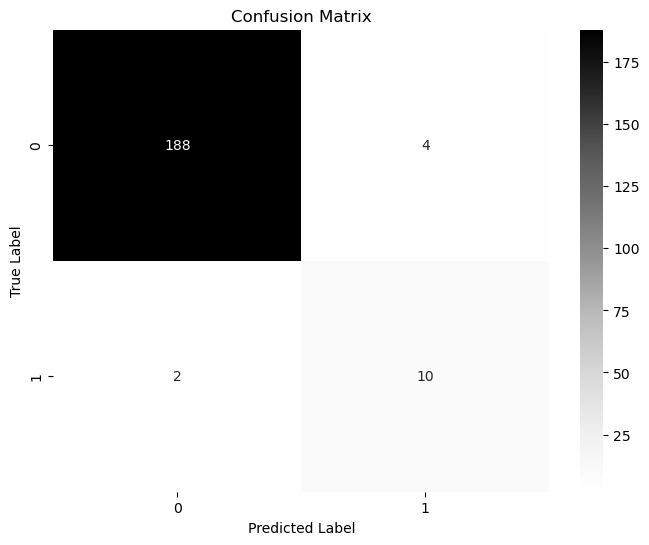

In [302]:

cm = confusion_matrix(y_test_clf_f, y_pred_test_rf)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greys")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [303]:
true_values_first_50 = y_test_clf_f[:50]
predicted_values_first_50 = y_pred_test_rf[:50]

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'True Values': true_values_first_50,
    'Predicted Values': predicted_values_first_50
})

comparison_df


True Values  Predicted Values
52             0                 0
253            0                 0
252            0                 0
13             0                 0
891            0                 0
35             0                 0
107            0                 0
633            0                 0
671            0                 0
328            0                 0
32             0                 0
928            0                 0
771            0                 0
864            0                 0
20             0                 0
516            0                 0
240            0                 0
520            0                 0
865            0                 0
326            0                 0
764            0                 0
180            0                 0
494            0                 0
110            0                 0
166            0                 0
492            0                 0
838            0                 0
780            0                 0
583            0                 0
62             0                 0
731            1                 1
585            0                 0
216            0                 0
913            0                 0
842            0                 0
510            0                 0
103            0                 0
134            0                 0
584            0                 0
474            0                 0
917            0                 0
469            0                 0
58             0                 0
264            0                 0
667            0                 0
476            0                 0
400            0                 0
224            0                 0
4              0                 0
64             0                 0

According to our project, the most important score is the recall score. Because taking someone with a high fever into an environment with healthy people is very dangerous for Covid. This shows that our aim is to capture the True Positives the most. In this context, we selected the model with the best recall score as the best model and evaluated it on our test set.

## 3.4 Classification Task-1 ('Fever_aveOralM')

### Preparation for ML Algorithms

### • Standartisation

In [304]:
# List of columns to exclude from standardization
columns_to_exclude = ['aveOralF', 'aveOralM','Fever_aveOralM', 'Fever_aveOralF','Age', 'Gender', 'Ethnicity']

# Selecting the columns that need to be standardized
columns_to_scale = [col for col in data_M_clf.columns if col not in columns_to_exclude]

# Instantiating the StandardScaler
scaler = StandardScaler()

# Fitting the scaler to the data and transform the data
data_M_clf[columns_to_scale] = scaler.fit_transform(data_M_clf[columns_to_scale])


data_M_clf.head()  # Display the first few rows to verify

Gender  Age  Ethnicity     T_atm  Humidity  Distance  T_offset1  Max1R13_1  \
0       2    5          1 -0.086392 -0.055341  2.178928  -0.734385  -0.985950   
1       1    4          3 -0.086392 -0.208419  2.178928  -0.520538  -1.821305   
2       1    3          1 -0.086392 -0.208419  2.178928  -0.292895   0.097401   
3       1    3          3 -0.086392 -0.131880  2.178928  -0.106642  -0.650938   
4       2    1          1 -0.086392 -0.131880  2.178928  -0.203217  -0.089684   

   Max1L13_1  aveAllR13_1  ...   T_FHTC1  T_FH_Max1  T_FHC_Max1    T_Max1  \
0  -0.425802    -0.680080  ... -2.162224  -1.703974   -1.887314 -0.798009   
1  -1.986339    -1.334438  ... -0.789203  -1.412510   -0.754033 -1.850738   
2  -0.171020    -0.850631  ...  0.127288  -0.146314    0.222933 -0.350472   
3   0.001867    -0.700964  ...  0.467111   0.345830    0.383589 -0.742067   
4   0.097411     0.029969  ... -1.029482  -0.007750    0.483457 -0.386072   

      T_OR1  T_OR_Max1  aveOralF  aveOralM  Fever_aveOralF  Fever_aveOralM  
0 -0.305051  -0.332313     36.85     36.59               0               0  
1 -1.275562  -1.307195     37.00     37.19               0               0  
2  0.097465   0.083577     37.20     37.34               0               0  
3 -1.503654  -1.530792     36.85     37.09               0               0  
4 -0.390027  -0.394920     36.80     37.04               0               0  

[5 rows x 37 columns]

### • Splitting

In [305]:

X = data_M_clf.drop(['aveOralF','Fever_aveOralM', 'Fever_aveOralF', 'aveOralM'], axis=1) 
y = data_F_clf['Fever_aveOralM']  # Hedef sütun


strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)


for train_index, test_index in strat_split.split(X, data_F_clf['Fever_aveOralM']):
    X_train_clf_m = X.loc[train_index]
    y_train_clf_m = y[train_index]
    X_test_clf_m = X.loc[test_index]
    y_test_clf_m = y[test_index]
    



In [306]:
X_train_clf_m

Gender  Age  Ethnicity     T_atm  Humidity  Distance  T_offset1  \
316       2    1          2 -1.508886 -0.552845  0.699427  -0.665402   
763       1    2          2  0.662289  1.597904 -0.780074   0.314153   
789       1    2          4  1.560706  1.513711 -0.780074   2.838923   
958       2    2          1  3.357541 -0.017071  0.699427   1.197133   
479       1    1          2 -0.161260 -0.147188 -0.780074   0.224476   
..      ...  ...        ...       ...       ...       ...        ...   
873       1    2          1 -0.086392 -0.116572 -0.780074   0.872914   
904       1    2          2 -0.460732 -1.157504 -0.780074  -0.555030   
648       1    2          1 -0.310996 -0.927887 -0.780074  -0.161828   
599       2    1          1 -0.460732 -0.996772 -0.780074  -0.037659   
630       1    2          2 -0.310996 -1.027387 -0.040324  -0.741283   

     Max1R13_1  Max1L13_1  aveAllR13_1  ...   T_FHCC1   T_FHRC1   T_FHLC1  \
316  -1.038160  -1.253842    -0.544335  ...  0.128152  0.429272  0.316454   
763  -0.176700  -0.157371     0.604273  ...  0.336444  0.474110  0.430705   
789   0.815285   0.570576     0.788746  ...  1.102664  1.154147  1.083041   
958   2.651325   2.390445     2.320223  ...  1.753578  1.591313  1.654297   
479  -1.890918  -1.434312    -1.329797  ... -0.709978 -0.529754 -0.066840   
..         ...        ...          ...  ...       ...       ...       ...   
873  -0.607430  -0.639636    -0.714886  ... -1.426604 -0.938274 -1.636871   
904   0.523780   1.139285     0.583389  ...  0.410835  0.455428  1.108840   
648   3.882604   4.219413     2.160114  ...  2.159005  1.946277  2.044962   
599  -0.385538  -0.898968     0.155271  ... -0.035507  0.313442 -0.343254   
630   0.480272   0.479583     0.656482  ...  1.087786  0.567522  1.193607   

      T_FHBC1   T_FHTC1  T_FH_Max1  T_FHC_Max1    T_Max1     T_OR1  T_OR_Max1  
316  0.216850  0.185642   0.126037    0.075302  0.280148  0.656515   0.687288  
763  0.475186  0.700524   0.560844    0.561614 -0.086019  0.160078   0.159600  
789  1.167823  1.071240   0.579956    0.995821  0.702256  1.050086   1.058459  
958  1.995245  1.788643   1.936936    1.764368  2.121151  1.774614   1.796329  
479 -0.385932 -0.481418  -0.327882   -0.591929 -0.843780 -0.963985  -0.950931  
..        ...       ...        ...         ...       ...       ...        ...  
873 -1.887271 -0.638171  -0.738798   -1.314161 -0.655611 -0.712039  -0.734787  
904  0.434002  0.566655   0.737634    0.717929  0.554772  0.777269   0.758839  
648  2.081357  2.135331   3.356031    2.255022  4.552090  3.961617   3.969690  
599 -0.191244 -0.133586  -0.614568   -0.341537 -1.169261 -0.846211  -0.851058  
630  1.328815  1.421360   1.545132    1.299766  1.398990  1.510743   1.528013  

[816 rows x 33 columns]

In [307]:
X_test_clf_m

Gender  Age  Ethnicity     T_atm  Humidity  Distance  T_offset1  \
780       2    1          1  0.437685  1.261132 -0.780074  -2.617615   
556       1    5          3  0.886893 -0.177803 -0.780074  -2.024363   
625       1    1          1 -1.583754  0.097737 -0.780074  -0.210116   
920       2    2          5 -0.535601 -1.302928 -0.780074  -0.844757   
535       2    2          3 -0.385864 -0.973810 -0.780074  -0.341183   
..      ...  ...        ...       ...       ...       ...        ...   
549       2    1          3 -0.685337 -0.881963 -0.780074  -0.610216   
542       1    1          1 -0.086392 -0.660000 -0.780074  -0.603318   
86        2    2          1  0.362817  0.618203  1.143277   0.479712   
743       1    1          1 -0.236128 -0.330882 -0.040324   0.831524   
517       1    1          1  0.437685  1.544326 -0.780074   0.390035   

     Max1R13_1  Max1L13_1  aveAllR13_1  ...   T_FHCC1   T_FHRC1   T_FHLC1  \
780  -0.529115  -0.621438    -0.001357  ... -0.738494 -0.497371 -0.737605   
556  -1.229595  -0.753378    -0.847150  ... -0.563677 -0.856072 -0.619668   
625  -1.020756  -0.730630    -2.145425  ...  0.369920  0.085517  0.895080   
920  -0.811918  -1.008160    -0.718367  ... -0.351665 -0.564628  0.320139   
535  -0.898934  -0.389404    -0.558258  ... -0.913311 -0.422642 -0.442763   
..         ...        ...          ...  ...       ...       ...       ...   
549  -0.624833  -0.653285    -1.947029  ... -0.072702  0.145301 -0.133180   
542  -1.233946   0.015516    -2.952931  ... -0.671543 -0.863545 -0.951365   
86   -0.080982  -0.116424     0.148310  ...  0.671200  0.324651  0.062153   
743   0.255481   0.203569     0.299137  ...  0.921647  0.845265  1.245204   
517   0.497676   0.274848     0.520737  ...  1.307237  0.933695  1.333657   

      T_FHBC1   T_FHTC1  T_FH_Max1  T_FHC_Max1    T_Max1     T_OR1  T_OR_Max1  
780 -0.816490 -0.442515  -0.786579   -0.801796 -0.945493 -0.421334  -0.394920  
556 -0.494507 -0.596980  -0.036418   -1.175214 -0.813266 -0.305051  -0.341257  
625 -0.097645  0.449948   0.020919    0.587667 -1.072634 -1.078776  -1.088070  
920 -0.224940 -0.274320  -0.136758   -0.324168 -0.991264 -1.633354  -1.593399  
535 -0.827722 -0.500869  -0.041196   -0.801796  0.376775  0.795159   0.772255  
..        ...       ...        ...         ...       ...       ...        ...  
549  0.044627 -0.391027  -0.476003   -0.480483 -0.874294 -0.770181  -0.739259  
542 -0.576875 -0.267455  -0.848695   -1.044952 -0.564070 -1.436568  -1.441353  
86   0.864560  0.480841  -0.007750    0.409642 -0.742067 -0.537616  -0.555910  
743  0.916976  0.992291   0.761524    1.075426 -0.009734 -0.325922  -0.301010  
517  1.493550  0.841259   0.804527    1.195557  1.109108  1.363153   1.367023  

[204 rows x 33 columns]

In [308]:
y_test_clf_m.value_counts()

Fever_aveOralM
0    182
1     22
Name: count, dtype: int64

In [309]:
y_train_clf_m.value_counts()

Fever_aveOralM
0    727
1     89
Name: count, dtype: int64

Since the dataset used for this task was separate, we applied splitting and standardization again.

### 3.4.1 Logistic Regression

In [310]:
logistic_reg_modelm = LogisticRegression()
logistic_reg_modelm.fit(X_train_clf_m, y_train_clf_m)


LogisticRegression()

In [311]:
predictions=logistic_reg_modelm.predict(X_train_clf_m)

accuracy = accuracy_score(y_train_clf_m, predictions)
f1 = f1_score(y_train_clf_m, predictions)
recall = recall_score(y_train_clf_m, predictions)
precision = precision_score(y_train_clf_m, predictions)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

Accuracy: 0.9693627450980392
F1 Score: 0.8484848484848485
Recall: 0.7865168539325843
Precision: 0.9210526315789473


In [312]:

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score)
}

cv_results_m = cross_validate(logistic_reg_modelm, X_train_clf_m, y_train_clf_m, cv=3, n_jobs=-1, scoring=scoring)

for score in scoring:
    print(f"{score} mean: {cv_results_m['test_' + score].mean()}, std: {cv_results_m['test_' + score].std()}")

accuracy mean: 0.9595588235294118, std: 0.005199314567548178
f1 mean: 0.8003729887479127, std: 0.034678260046308765
recall mean: 0.7521072796934867, std: 0.08111573510402778
precision mean: 0.8667929292929294, std: 0.062630590026444


In [313]:
y_train_pred_m = cross_val_predict(logistic_reg_modelm, X_train_clf_m, y_train_clf_m, cv=3, n_jobs=-1)

In [314]:
confusion_matrix(y_train_clf_m, y_train_pred_m)

array([[716,  11],
       [ 22,  67]])

In [315]:
accuracy=accuracy_score(y_train_clf_m, y_train_pred_m)
recall= recall_score(y_train_clf_m, y_train_pred_m)
precision= precision_score(y_train_clf_m, y_train_pred_m)
f1= f1_score(y_train_clf_m, y_train_pred_m)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

Accuracy: 0.9595588235294118
F1 Score: 0.8023952095808383
Recall: 0.7528089887640449
Precision: 0.8589743589743589


In [316]:
y_score_log_m = cross_val_predict(logistic_reg_modelm, X_train_clf_m, y_train_clf_m, method="decision_function", cv=3, n_jobs=-1)

In [317]:

precisions_log_m, recalls_log_m, thresholds_log_m = precision_recall_curve(y_train_clf_m, y_score_log_m)

In [318]:
eps= 0.00001
f1_log_m=2/(1/(precisions_log_m+eps)+1/(recalls_log_m+eps))


In [319]:
ind_log_m= np.argmax(f1_log_m)
ind_log_m

738

In [320]:
f1_log_m= f1_log_m[ind_log_m]
recall_log_m=recalls_log_m[ind_log_m]
precision_log_m= precisions_log_m[ind_log_m]
threshold_log_m=thresholds_log_m[ind_log_m]

print("Threshold_log:", threshold_log_m)
print("F1 Score_log:", f1_log_m)
print("Recall_log:", recall_log_m)
print("Precision_log:", precision_log_m)


Threshold_log: 0.035718995333328785
F1 Score_log: 0.8024052529665812
Recall_log: 0.7528089887640449
Precision_log: 0.8589743589743589


In [321]:
fpr_logm, tpr_logm, thresholds_logm = roc_curve(y_train_clf_m, y_score_log_m)

In [322]:
roc_auc_score(y_train_clf_m, y_score_log_m)

0.972783333075746

In [323]:
dist_log2m = np.sqrt((0-fpr_logm)**2 + (1-tpr_logm)**2)
dist_log2m

array([1.        , 0.98876404, 0.61797753, 0.61797906, 0.41573261,
       0.41573944, 0.40450374, 0.40451543, 0.39328008, 0.39331856,
       0.33714881, 0.33717967, 0.30348303, 0.30362327, 0.29239702,
       0.29245848, 0.27001351, 0.27008708, 0.24765366, 0.24842789,
       0.23725052, 0.23739801, 0.21507692, 0.21542851, 0.20429958,
       0.2044986 , 0.19339349, 0.19541784, 0.18445051, 0.18476311,
       0.16298038, 0.16450564, 0.15379676, 0.15560684, 0.14511141,
       0.14562552, 0.12510771, 0.13173753, 0.1222951 , 0.12629099,
       0.11748711, 0.12296375, 0.11500601, 0.12220842, 0.11529827,
       0.13258646, 0.12724173, 0.1613998 , 0.15784067, 0.24622732,
       0.2444262 , 0.26078461, 0.25957153, 0.33774978, 0.33718863,
       0.36193511, 0.36176066, 1.        ])

In [324]:
ind_log2m = np.argmin(dist_log2m)
ind_log2m

42

In [325]:
dist_log2m[ind_log2m], fpr_logm[ind_log2m], tpr_logm[ind_log2m], thresholds_logm[ind_log2m]

(0.11500601058771105,
 0.08390646492434663,
 0.9213483146067416,
 -2.3619845696849686)

### 3.4.2 SVM (Support Vector Machine)

In [326]:
svm_clfm = SVC(probability=True)
svm_clfm.fit(X_train_clf_m, y_train_clf_m)

SVC(probability=True)

In [327]:
predictions_svm_m=svm_clfm.predict(X_train_clf_m)

accuracy = accuracy_score(y_train_clf_m, predictions_svm_m)
f1 = f1_score(y_train_clf_m, predictions_svm_m)
recall = recall_score(y_train_clf_m, predictions_svm_m)
precision = precision_score(y_train_clf_m, predictions_svm_m)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

Accuracy: 0.9718137254901961
F1 Score: 0.8535031847133758
Recall: 0.7528089887640449
Precision: 0.9852941176470589


In [329]:

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score)
}


cv_results = cross_validate(svm_clfm, X_train_clf_m, y_train_clf_m, cv=3, n_jobs=-1, scoring=scoring)


for score in scoring:
    print(f"{score} mean: {cv_results['test_' + score].mean()}, std: {cv_results['test_' + score].std()}")

accuracy mean: 0.9571078431372549, std: 0.006248798423520599
f1 mean: 0.7852474323062558, std: 0.02916806541859782
recall mean: 0.7191570881226054, std: 0.040976469646896975
precision mean: 0.8715913715913716, std: 0.07187389805213902


In [330]:
y_train_pred_svm_m = cross_val_predict(svm_clfm, X_train_clf_m, y_train_clf_m, cv=3, n_jobs=-1)

In [331]:
confusion_matrix(y_train_clf_m, y_train_pred_svm_m)

array([[717,  10],
       [ 25,  64]])

In [332]:
accuracy=accuracy_score(y_train_clf_m, y_train_pred_svm_m)
recall= recall_score(y_train_clf_m, y_train_pred_svm_m)
precision= precision_score(y_train_clf_m, y_train_pred_svm_m)
f1= f1_score(y_train_clf_m, y_train_pred_svm_m)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

Accuracy: 0.9571078431372549
F1 Score: 0.7852760736196319
Recall: 0.7191011235955056
Precision: 0.8648648648648649


In [333]:
y_score_svm_m= cross_val_predict(svm_clfm, X_train_clf_m, y_train_clf_m, method="predict_proba", cv=3, n_jobs=-1)
y_scores_pos_svm_m_class = y_score_svm_m[:, 1]

In [334]:
precisions_svm_m, recalls_svm_m, thresholds_svm_m = precision_recall_curve(y_train_clf_m, y_scores_pos_svm_m_class)

In [335]:
eps= 0.00001
f1_svm_m=2/(1/(precisions_svm_m+eps)+1/(recalls_svm_m+eps))
ind_svm_m= np.argmax(f1_svm_m)
ind_svm_m


740

In [336]:
f1_svm_m= f1_svm_m[ind_svm_m]
recall_svm_m=recalls_svm_m[ind_svm_m]
precision_svm_m= precisions_svm_m[ind_svm_m]
threshold_svm_m=thresholds_svm_m[ind_svm_m]

print("Threshold_svm:", threshold_svm_m)
print("F1 Score_svm:", f1_svm_m)
print("Recall_svm:", recall_svm_m)
print("Precision_svm:", precision_svm_m)

Threshold_svm: 0.43192804979335453
F1 Score_svm: 0.8000100620745272
Recall_svm: 0.7415730337078652
Precision_svm: 0.868421052631579


In [337]:
fpr_svm_m, tpr_svm_m, thresholds_svm_m = roc_curve(y_train_clf_m, y_scores_pos_svm_m_class)

In [338]:
roc_auc_score(y_train_clf_m, y_scores_pos_svm_m_class)

0.9529079022611008

In [339]:
dist_svm2_m = np.sqrt((0-fpr_svm_m)**2 + (1-tpr_svm_m)**2)
dist_svm2


array([1.        , 0.97826087, 0.95652174, 0.95652262, 0.93478351,
       0.93479073, 0.89131286, 0.89131949, 0.8043646 , 0.80437404,
       0.52177954, 0.52179732, 0.45658824, 0.45661225, 0.43487764,
       0.43497653, 0.3915198 , 0.39161456, 0.36989367, 0.37007829,
       0.34837118, 0.34844621, 0.28337158, 0.2839216 , 0.26229131,
       0.26321565, 0.24168764, 0.2424958 , 0.17851217, 0.19745686,
       0.17860673, 0.21968302, 0.20522417, 0.23986329, 0.22877044,
       0.29600409, 0.28873017, 0.35875005, 0.3541094 , 0.40656359,
       0.40364713, 0.60545922, 0.60428726, 0.70812598, 0.70779221,
       1.        ])

In [340]:
ind_svm2_m = np.argmin(dist_svm2_m)
ind_svm2_m

38

In [341]:
dist_svm2_m[ind_svm2_m], fpr_svm_m[ind_svm2_m], tpr_svm_m[ind_svm2_m], thresholds_svm_m[ind_svm2_m]

(0.0975892044222024,
 0.0577716643741403,
 0.9213483146067416,
 0.07242506224711018)

### 3.4.3 Desicion Tree

In [342]:
decision_tree_clfm = DecisionTreeClassifier(max_depth=3)
decision_tree_clfm.fit(X_train_clf_m, y_train_clf_m)

DecisionTreeClassifier(max_depth=3)

In [343]:
predictions_dt_m=decision_tree_clfm.predict(X_train_clf_m)

accuracy = accuracy_score(y_train_clf_m, predictions_dt_m)
f1 = f1_score(y_train_clf_m, predictions_dt_m)
recall = recall_score(y_train_clf_m, predictions_dt_m)
precision = precision_score(y_train_clf_m, predictions_dt_m)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)


Accuracy: 0.9754901960784313
F1 Score: 0.8780487804878049
Recall: 0.8089887640449438
Precision: 0.96


In [345]:
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score)
}


cv_results = cross_validate(decision_tree_clfm, X_train_clf_m, y_train_clf_m, cv=4, n_jobs=-1, scoring=scoring)

for score in scoring:
    print(f"{score} mean: {cv_results['test_' + score].mean()}, std: {cv_results['test_' + score].std()}")

accuracy mean: 0.9571078431372549, std: 0.016395941372867207
f1 mean: 0.792111917774696, std: 0.06441192945451074
recall mean: 0.7307312252964427, std: 0.02746875617375027
precision mean: 0.8741830065359477, std: 0.1260925596125521


In [346]:
y_train_pred_dt_m = cross_val_predict(decision_tree_clfm, X_train_clf_m, y_train_clf_m, cv=4, n_jobs=-1)

In [347]:
confusion_matrix(y_train_clf_m, y_train_pred_dt_m)

array([[716,  11],
       [ 22,  67]])

In [348]:
accuracy=accuracy_score(y_train_clf_m, y_train_pred_dt_m)
recall= recall_score(y_train_clf_m, y_train_pred_dt_m)
precision= precision_score(y_train_clf_m, y_train_pred_dt_m)
f1= f1_score(y_train_clf_m, y_train_pred_dt_m)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

Accuracy: 0.9595588235294118
F1 Score: 0.8023952095808383
Recall: 0.7528089887640449
Precision: 0.8589743589743589


In [349]:
y_score_dt_m = cross_val_predict(decision_tree_clfm, X_train_clf_m, y_train_clf_m, method="predict_proba", cv=3, n_jobs=-1)
y_score_pos_dt_m_class = y_score_dt_m[:, 1]

In [350]:
precisions_dt_m, recalls_dt_m, thresholds_dt_m = precision_recall_curve(y_train_clf_m, y_score_pos_dt_m_class)

In [351]:
eps= 0.00001
f1_dt_m=2/(1/(precisions_dt_m+eps)+1/(recalls_dt_m+eps))
ind_dt_m= np.argmax(f1_dt_m)
ind_dt_m

5

In [352]:
f1_dt_m= f1_dt_m[ind_dt_m]
recall_dt_m=recalls_dt_m[ind_dt_m]
precision_dt_m= precisions_dt_m[ind_dt_m]
threshold_dt_m=thresholds_dt_m[ind_dt_m]

print("Threshold_dt:", threshold_dt_m)
print("F1 Score_dt:", f1_dt_m)
print("Recall_dt:", recall_dt_m)
print("Precision_dt:", precision_dt_m)

Threshold_dt: 0.25
F1 Score_dt: 0.77084338650105
Recall_dt: 0.8314606741573034
Precision_dt: 0.7184466019417476


In [353]:
fpr_dt_m, tpr_dt_m, thresholds_dt_m = roc_curve(y_train_clf_m, y_score_pos_dt_m_class)

In [354]:
roc_auc_score(y_train_clf_m, y_score_pos_dt_m_class)

0.9379781462992443

In [355]:
dist_dt_m = np.sqrt((0-fpr_dt_m)**2 + (1-tpr_dt_m)**2)
dist_dt_m

array([1.        , 0.42723431, 0.35986879, 0.33748255, 0.29369799,
       0.19513201, 0.17319559, 0.16410836, 0.17886852, 0.46202904,
       0.77579092, 1.        ])

In [356]:
ind_dt2_m = np.argmin(dist_dt_m)
ind_dt2_m

7

In [357]:
dist_dt_m[ind_dt2_m], fpr_dt_m[ind_dt2_m], tpr_dt_m[ind_dt2_m], thresholds_dt_m[ind_dt2_m]

(0.16410835766398624,
 0.04676753782668501,
 0.8426966292134831,
 0.1111111111111111)

### 3.4.4 Random Forest

In [358]:
random_forest_clfm = RandomForestClassifier(max_depth=3)
random_forest_clfm.fit(X_train_clf_m, y_train_clf_m)

RandomForestClassifier(max_depth=3)

In [359]:
predictions_rf_m=random_forest_clfm.predict(X_train_clf_m)

accuracy= accuracy_score(y_train_clf_m, predictions_rf_m)
f1 = f1_score(y_train_clf_m, predictions_rf_m)
recall = recall_score(y_train_clf_m, predictions_rf_m)
precision = precision_score(y_train_clf_m, predictions_rf_m)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

Accuracy: 0.9718137254901961
F1 Score: 0.8571428571428572
Recall: 0.7752808988764045
Precision: 0.9583333333333334


In [361]:
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score)
}

cv_results = cross_validate(random_forest_clfm, X_train_clf_m, y_train_clf_m, cv=4, n_jobs=-1, scoring=scoring)

for score in scoring:
    print(f"{score} mean: {cv_results['test_' + score].mean()}, std: {cv_results['test_' + score].std()}")

accuracy mean: 0.9558823529411765, std: 0.00600365133035095
f1 mean: 0.7787770348745959, std: 0.01999022714399161
recall mean: 0.7080039525691699, std: 0.019879841441433538
precision mean: 0.8722222222222222, std: 0.08221471437193743


In [362]:
y_train_pred_rf_m = cross_val_predict(random_forest_clfm, X_train_clf_m, y_train_clf_m, cv=4, n_jobs=-1)

In [363]:
confusion_matrix(y_train_clf_m, y_train_pred_rf_m)

array([[717,  10],
       [ 24,  65]])

In [364]:
accuracy=accuracy_score(y_train_clf_m, y_train_pred_rf_m)
recall= recall_score(y_train_clf_m, y_train_pred_rf_m)
precision= precision_score(y_train_clf_m, y_train_pred_rf_m)
f1= f1_score(y_train_clf_m, y_train_pred_rf_m)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

Accuracy: 0.9583333333333334
F1 Score: 0.7926829268292682
Recall: 0.7303370786516854
Precision: 0.8666666666666667


In [365]:
y_score_rf_m = cross_val_predict(random_forest_clfm, X_train_clf_m, y_train_clf_m, method="predict_proba", cv=4, n_jobs=-1)
y_scores_rf_pos_m_class = y_score_rf_m[:, 1]

In [366]:
precisions_rf_m, recalls_rf_m, thresholds_rf_m = precision_recall_curve(y_train_clf_m, y_scores_rf_pos_m_class)

In [367]:
eps= 0.00001
f1_rf_m=2/(1/(precisions_rf_m+eps)+1/(recalls_rf_m+eps))
ind_rf_m= np.argmax(f1_rf_m)
ind_rf_m

351

In [368]:
f1_rf_m= f1_rf_m[ind_rf_m]
recall_rf_m=recalls_rf_m[ind_rf_m]
precision_rf_m= precisions_rf_m[ind_rf_m]
threshold_rf_m=thresholds_rf_m[ind_rf_m]

print("Threshold_rf:", threshold_rf_m)
print("F1 Score_rf:", f1_rf_m)
print("Recall_rf:", recall_rf_m)
print("Precision_rf:", precision_rf_m)

Threshold_rf: 0.35663344734045765
F1 Score_rf: 0.8022698873248387
Recall_rf: 0.797752808988764
Precision_rf: 0.8068181818181818


In [369]:
fpr_rf_m, tpr_rf_m, thresholds_rf_m = roc_curve(y_train_clf_m, y_scores_rf_pos_m_class)

In [370]:
roc_auc_score(y_train_clf_m, y_scores_rf_pos_m_class)

0.9630619909432329

In [371]:
dist_rf_m = np.sqrt((0-fpr_rf_m)**2 + (1-tpr_rf_m)**2)
dist_rf_m

array([1.        , 0.98876404, 0.97752809, 0.92134831, 0.8988764 ,
       0.85393258, 0.79775281, 0.65168539, 0.65168684, 0.57303536,
       0.57304031, 0.41573944, 0.41575082, 0.37080948, 0.37082734,
       0.34835806, 0.34853453, 0.26994693, 0.27001351, 0.25879278,
       0.25904488, 0.23663166, 0.23685544, 0.22566432, 0.22579424,
       0.21461458, 0.21475999, 0.20359452, 0.20492375, 0.17174202,
       0.17351756, 0.15178448, 0.15513801, 0.14460855, 0.14511141,
       0.13473547, 0.13585424, 0.12571871, 0.13319443, 0.1238631 ,
       0.12547183, 0.11660612, 0.11748711, 0.10913075, 0.11008877,
       0.10236371, 0.10444959, 0.09757562, 0.12355261, 0.11886558,
       0.21654482, 0.21449459, 0.27170015, 0.2757953 , 0.27716055,
       0.27601945, 0.31167774, 0.31442168, 0.32539861, 0.32814313,
       0.34186729, 0.35010296, 0.35284836, 0.35559385, 0.36657664,
       0.36932254, 0.37618761, 0.38030687, 0.38579945, 0.38854585,
       0.39815873, 0.40090541, 0.40502553, 0.40777235, 0.40914

In [372]:
ind_rf2_m = np.argmin(dist_rf_m)
ind_rf2_m

47

In [373]:
dist_rf_m[ind_rf2_m], fpr_rf_m[ind_rf2_m], tpr_rf_m[ind_rf2_m], thresholds_rf_m[ind_rf2_m]

(0.0975756239128445,
 0.07977991746905089,
 0.9438202247191011,
 0.09209560422299697)

### 3.4.5 XGBoost

In [374]:
xgb_clfm = XGBClassifier()
xgb_clfm.fit(X_train_clf_m, y_train_clf_m)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [375]:
predictions_xgb_m=xgb_clfm.predict(X_train_clf_m)

accuracy= accuracy_score(y_train_clf_m, predictions_xgb_m)
f1 = f1_score(y_train_clf_m, predictions_xgb_m)
recall = recall_score(y_train_clf_m, predictions_xgb_m)
precision = precision_score(y_train_clf_m, predictions_xgb_m)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

Accuracy: 1.0
F1 Score: 1.0
Recall: 1.0
Precision: 1.0


In [376]:
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score)
}


cv_results = cross_validate(xgb_clfm, X_train_clf_m, y_train_clf_m, cv=4, n_jobs=-1, scoring=scoring)

for score in scoring:
    print(f"{score} mean: {cv_results['test_' + score].mean()}, std: {cv_results['test_' + score].std()}")


accuracy mean: 0.954656862745098, std: 0.009413168808662524
f1 mean: 0.7873805037227686, std: 0.038808664556543346
recall mean: 0.7638339920948616, std: 0.021490675070090455
precision mean: 0.8154212936821632, std: 0.07485058219693792


In [377]:
y_train_pred_xgb_m = cross_val_predict(xgb_clfm, X_train_clf_m, y_train_clf_m, cv=4, n_jobs=-1)

In [378]:
confusion_matrix(y_train_clf_m, y_train_pred_xgb_m)

array([[711,  16],
       [ 21,  68]])

In [379]:
accuracy=accuracy_score(y_train_clf_m, y_train_pred_xgb_m)
recall= recall_score(y_train_clf_m, y_train_pred_xgb_m)
precision= precision_score(y_train_clf_m, y_train_pred_xgb_m)
f1= f1_score(y_train_clf_m, y_train_pred_xgb_m)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

Accuracy: 0.9546568627450981
F1 Score: 0.7861271676300579
Recall: 0.7640449438202247
Precision: 0.8095238095238095


In [380]:
y_score_xgb_m = cross_val_predict(xgb_clfm, X_train_clf_m, y_train_clf_m, method="predict_proba", cv=4, n_jobs=-1)
y_scores_xbg_pos_m_class = y_score_xgb_m[:, 1]

In [381]:
precisions_xgb_m, recalls_xgb_m, thresholds_xgb_m = precision_recall_curve(y_train_clf_m, y_scores_xbg_pos_m_class)

In [382]:
eps= 0.00001
f1_xgb_m=2/(1/(precisions_xgb_m+eps)+1/(recalls_xgb_m+eps))
ind_xgb_m= np.argmax(f1_xgb_m)
ind_xgb_m

695

In [383]:
f1_xgb_m= f1_xgb_m[ind_xgb_m]
recall_xgb_m= recalls_xgb_m[ind_xgb_m]
precision_xgb_m= precisions_xgb_m[ind_xgb_m]
threshold_xgb_m= thresholds_xgb_m[ind_xgb_m]

print("Threshold_xgb:", threshold_xgb_m)
print("F1 Score_xgb:", f1_xgb_m)
print("Recall_xgb:", recall_xgb_m)
print("Precision_xgb:", precision_xgb_m)

Threshold_xgb: 0.48988628
F1 Score_xgb: 0.7931134535605094
Recall_xgb: 0.7752808988764045
Precision_xgb: 0.8117647058823529


In [384]:
fpr_xgb_m, tpr_xgb_m, thresholds_xgb_m = roc_curve(y_train_clf_m, y_scores_xbg_pos_m_class)

In [385]:
roc_auc_score(y_train_clf_m, y_scores_xbg_pos_m_class)

0.9534024697463795

In [386]:
dist_xgb_m = np.sqrt((0-fpr_xgb_m)**2 + (1-tpr_xgb_m)**2)
dist_xgb_m

array([1.        , 0.98876404, 0.80898876, 0.80898993, 0.61797906,
       0.61798365, 0.57304031, 0.57304857, 0.47192815, 0.47196023,
       0.42702168, 0.42704605, 0.40457857, 0.40460897, 0.39337628,
       0.39341236, 0.38218093, 0.382223  , 0.35976362, 0.35981358,
       0.3261329 , 0.32619381, 0.28130609, 0.28146747, 0.25904488,
       0.25924931, 0.23685544, 0.23697922, 0.22579424, 0.22639676,
       0.21524839, 0.21581461, 0.19361349, 0.193843  , 0.1827812 ,
       0.18329804, 0.16131761, 0.16262592, 0.15178448, 0.15295792,
       0.13166733, 0.13643099, 0.12634173, 0.13701065, 0.11927715,
       0.1442286 , 0.13750705, 0.15725778, 0.15195   , 0.26590931,
       0.26857136, 0.26990306, 0.26731806, 0.2726997 , 0.2706084 ,
       0.38229344, 0.38639167, 0.39732317, 0.39620951, 0.40854562,
       0.41128734, 0.46614469, 0.46888856, 0.47026053, 0.47300452,
       0.48260914, 0.48535349, 0.49633164, 0.49907635, 0.52927254,
       0.53201802, 0.5677141 , 0.5704603 , 0.57457969, 0.57595

In [387]:
ind_xgb2_m = np.argmin(dist_xgb_m)
ind_xgb2_m

44

In [388]:
dist_xgb_m[ind_xgb2_m], fpr_xgb_m[ind_xgb2_m], tpr_xgb_m[ind_xgb2_m], thresholds_xgb_m[ind_xgb2_m]

(0.11927714828817407, 0.07840440165061899, 0.9101123595505618, 0.011897917)

### 3.4.6 SGD

In [389]:
sgd_clfm = SGDClassifier(random_state=42)
sgd_clfm.fit(X_train_clf_m, y_train_clf_m)

SGDClassifier(random_state=42)

In [390]:
predictions_sgd_m = sgd_clfm.predict(X_train_clf_m)

accuracy = accuracy_score(y_train_clf_m, predictions_sgd_m)
f1 = f1_score(y_train_clf_m, predictions_sgd_m)
recall = recall_score(y_train_clf_m, predictions_sgd_m)
precision = precision_score(y_train_clf_m, predictions_sgd_m)


print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

Accuracy: 0.9681372549019608
F1 Score: 0.8571428571428572
Recall: 0.8764044943820225
Precision: 0.8387096774193549


In [392]:
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score)
}


cv_results = cross_validate(sgd_clfm, X_train_clf_m, y_train_clf_m, cv=6, n_jobs=-1, scoring=scoring)

for score in scoring:
    print(f"{score} mean: {cv_results['test_' + score].mean()}, std: {cv_results['test_' + score].std()}")

accuracy mean: 0.9534313725490197, std: 0.020652327875432284
f1 mean: 0.8015805182471848, std: 0.06847315632666795
recall mean: 0.830952380952381, std: 0.08499477552749354
precision mean: 0.7965811965811965, std: 0.13967823035694954


In [393]:
y_train_pred_sgd_m = cross_val_predict(sgd_clfm, X_train_clf_m, y_train_clf_m, cv=6, n_jobs=-1)

In [394]:
confusion_matrix(y_train_clf_m, y_train_pred_sgd_m)

array([[704,  23],
       [ 15,  74]])

In [395]:
accuracy=accuracy_score(y_train_clf_m, y_train_pred_sgd_m)
recall= recall_score(y_train_clf_m, y_train_pred_sgd_m)
precision= precision_score(y_train_clf_m, y_train_pred_sgd_m)
f1= f1_score(y_train_clf_m, y_train_pred_sgd_m)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

Accuracy: 0.9534313725490197
F1 Score: 0.7956989247311828
Recall: 0.8314606741573034
Precision: 0.7628865979381443


In [396]:
y_score_sgd_m = cross_val_predict(sgd_clfm, X_train_clf_m, y_train_clf_m, method="decision_function", cv=6, n_jobs=-1)

In [397]:
precisions_sgd_m, recalls_sgd_m, thresholds_sgd_m = precision_recall_curve(y_train_clf_m, y_score_sgd_m)

In [398]:
eps= 0.00001
f1_sgd_m=2/(1/(precisions_sgd_m+eps)+1/(recalls_sgd_m+eps))
ind_sgd_m= np.argmax(f1_sgd_m)
ind_sgd_m

725

In [399]:
f1_sgd_m= f1_sgd_m[ind_sgd_m]
recall_sgd_m= recalls_sgd_m[ind_sgd_m]
precision_sgd_m= precisions_sgd_m[ind_sgd_m]
threshold_sgd_m= thresholds_sgd_m[ind_sgd_m]

print("Threshold_sgd:", threshold_sgd_m)
print("F1 Score_sgd:", f1_sgd_m)
print("Recall_sgd:", recall_sgd_m)
print("Precision_sgd:", precision_sgd_m)

Threshold_sgd: 3.4999006234112002
F1 Score_sgd: 0.8222322234567749
Recall_sgd: 0.8314606741573034
Precision_sgd: 0.8131868131868132


In [400]:
fpr_sgd_m, tpr_sgd_m, thresholds_sgd_m = roc_curve(y_train_clf_m, y_score_sgd_m)

In [401]:
roc_auc_score(y_train_clf_m, y_score_sgd_m)

0.9686413303865354

In [402]:
dist_sgd_m = np.sqrt((0-fpr_sgd_m)**2 + (1-tpr_sgd_m)**2)
dist_sgd_m

array([1.        , 0.98876404, 0.68539326, 0.68539464, 0.52809168,
       0.52809705, 0.34832547, 0.34833905, 0.33710391, 0.33712355,
       0.32588915, 0.32591527, 0.30344874, 0.30352355, 0.26983477,
       0.26994693, 0.25872331, 0.25879278, 0.24757342, 0.24783695,
       0.23663166, 0.23673958, 0.22554271, 0.22566432, 0.19212236,
       0.19243724, 0.17015377, 0.17229198, 0.16131761, 0.16410836,
       0.15337175, 0.15423287, 0.14363708, 0.15460581, 0.14491129,
       0.14938589, 0.14023182, 0.14359162, 0.13498099, 0.13681873,
       0.12873683, 0.14639006, 0.13977249, 0.1680919 , 0.163137  ,
       0.1885315 , 0.18481183, 0.2231438 , 0.22058317, 0.25434623,
       0.252603  , 0.30585214, 0.30481846, 0.40914579, 0.40868268,
       0.41143268, 0.41127923, 1.        ])

In [403]:
ind_sgd2_m = np.argmin(dist_sgd_m)
ind_sgd2_m

40

In [404]:
dist_sgd_m[ind_sgd2_m], fpr_sgd_m[ind_sgd2_m], tpr_sgd_m[ind_sgd2_m], thresholds_sgd_m[ind_sgd2_m]

(0.1287368337910212,
 0.0921595598349381,
 0.9101123595505618,
 -17.51015746711507)

### 3.4.7 Detecting the Best Model

In [406]:
values = {
    'Model': ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'XGBoost', 'SGD'],
    'TPR': [tpr_logm[ind_log2m], tpr_svm_m[ind_svm2_m], tpr_dt_m[ind_dt2_m], tpr_rf_m[ind_rf2_m], tpr_xgb_m[ind_xgb2_m], tpr_sgd_m[ind_sgd2_m]],
    'F1 Score': [f1_log_m, f1_svm_m, f1_dt_m, f1_rf_m, f1_xgb_m, f1_sgd_m],
    'Recall': [recall_log_m, recall_svm_m, recall_dt_m, recall_rf_m, recall_xgb_m, recall_sgd_m],
    'Precision': [precision_log_m, precision_svm_m, precision_dt_m, precision_rf_m, precision_xgb_m, precision_sgd_m],
    'ROC AUC Score': [roc_auc_score(y_train_clf_m, y_score_log_m),
                      roc_auc_score(y_train_clf_m, y_scores_pos_svm_m_class),
                      roc_auc_score(y_train_clf_m, y_score_pos_dt_m_class),
                      roc_auc_score(y_train_clf_m, y_scores_rf_pos_m_class),
                      roc_auc_score(y_train_clf_m, y_scores_xbg_pos_m_class),
                      roc_auc_score(y_train_clf_m, y_score_sgd_m)]
}


df = pd.DataFrame(values)

df

Model       TPR  F1 Score    Recall  Precision  ROC AUC Score
0  Logistic Regression  0.921348  0.802405  0.752809   0.858974       0.972783
1                  SVM  0.921348  0.800010  0.741573   0.868421       0.952908
2        Decision Tree  0.842697  0.770843  0.831461   0.718447       0.937978
3        Random Forest  0.943820  0.802270  0.797753   0.806818       0.963062
4              XGBoost  0.910112  0.793113  0.775281   0.811765       0.953402
5                  SGD  0.910112  0.822232  0.831461   0.813187       0.968641

Based on Recall score and F1 score, the best model is SGD.

### 3.4.8 Evaluation the Best Model on The Test Set (SGD)

In [407]:

y_scores_test_sgd_m = sgd_clfm.decision_function(X_test_clf_m)


y_pred_test_sgd_m = (y_scores_test_sgd_m >= threshold_sgd_m).astype(int)


accuracy_test_sgd_m = accuracy_score(y_test_clf_m, y_pred_test_sgd_m)
recall_test_sgd_m = recall_score(y_test_clf_m, y_pred_test_sgd_m)
precision_test_sgd_m = precision_score(y_test_clf_m, y_pred_test_sgd_m)
f1_test_sgd_m = f1_score(y_test_clf_m, y_pred_test_sgd_m)

print(f"Threshold: {threshold_sgd_m}")
print(f"Accuracy: {accuracy_test_sgd_m}")
print(f"Recall: {recall_test_sgd_m}")
print(f"Precision: {precision_test_sgd_m}")
print(f"F1 Score: {f1_test_sgd_m}")


Threshold: 3.4999006234112002
Accuracy: 0.9607843137254902
Recall: 0.8636363636363636
Precision: 0.7916666666666666
F1 Score: 0.8260869565217391


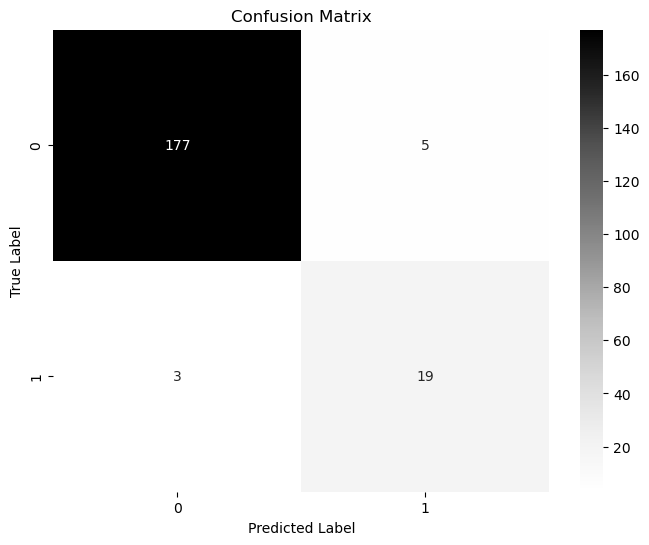

In [408]:

cm = confusion_matrix(y_test_clf_m, y_pred_test_sgd_m)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greys")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [410]:

true_values_first_50 = y_test_clf_m[:50]
predicted_values_first_50 = y_pred_test_sgd_m[:50]

# Creating a DataFrame for comparison
comparison_df = pd.DataFrame({
    'True Values': true_values_first_50,
    'Predicted Values': predicted_values_first_50
})

comparison_df

True Values  Predicted Values
780            0                 0
556            0                 0
625            0                 0
920            0                 0
535            0                 0
177            0                 0
314            1                 1
593            0                 0
762            0                 0
526            0                 0
28             0                 0
515            0                 0
962            0                 0
947            0                 0
747            1                 1
706            0                 0
313            0                 0
219            0                 0
781            0                 0
868            0                 0
179            0                 0
36             0                 0
608            0                 0
35             0                 0
235            0                 0
209            0                 0
321            0                 0
259            0                 0
607            0                 0
993            0                 0
262            1                 1
184            0                 0
895            0                 0
712            1                 1
425            0                 0
53             0                 0
779            0                 0
15             0                 0
103            0                 0
335            0                 0
236            0                 0
343            0                 0
299            0                 0
534            0                 0
664            0                 1
767            0                 0
979            0                 0
81             1                 1
700            0                 0
412            0                 0

## 4.Conclusion

Our aim in this project is based on the need to detect people with high fever and keep these people away from crowded environments to prevent the spread of COVID-19. In the first part of the project, we aimed to estimate fever degrees as accurately as possible, and in the second part, we focused on detecting people with high fever. In this context, the recall score is of vital importance, especially for the second part. Although the results look good, they could be better.

If more regularization processes are applied to the models, we can definitely achieve better prediction scores. Additionally, if hyperparameter tuning is performed separately for each model and more in-depth analyses are conducted over a longer period, the predictions can be further improved.

## 5. References

Infrared Thermography for Measuring Elevated Body Temperature: Clinical Accuracy, Calibration, and Evaluation.  Quanzeng Wang, Yangling Zhou, Pejman Ghassemi, David McBride, J. Casamento, T. Pfefer. Sensors, 2022. https://doi.org/10.3390/s22010215 

UCI Machine Learning Repository:  https://archive.ics.uci.edu/dataset/925/infrared+thermography+temperature+dataset
